In [1]:
import warnings;
warnings.filterwarnings('ignore')

In [38]:
from collections import namedtuple

In [2]:
%pylab inline
import seaborn as sns
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
sns.set_context('poster',font_scale=1.4)
import pandas as pd
import pyccl as ccl
from pprint import pprint
import sys
from copy import deepcopy


Populating the interactive namespace from numpy and matplotlib


In [3]:
%reload_ext autoreload
%autoreload 2
from fisher import Fisher, FullPlot

# Creating Photo-z Distributions

## Source galaxy distribution

### Creating 5 bins with equal number of source galaxies

source sample: 5 redshift bins defined with equal numbers of source galaxies per bins

In [ ]:
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu')

In [99]:
biases = [[round(-i*0.01, 2)]*5 for i in range(-10, 10)]

In [64]:
variances = [[round(i*0.333, 2)]*5 for i in range(1, 7)]

In [65]:
variances

[[0.33, 0.33, 0.33, 0.33, 0.33],
 [0.67, 0.67, 0.67, 0.67, 0.67],
 [1.0, 1.0, 1.0, 1.0, 1.0],
 [1.33, 1.33, 1.33, 1.33, 1.33],
 [1.67, 1.67, 1.67, 1.67, 1.67],
 [2.0, 2.0, 2.0, 2.0, 2.0]]

In [70]:
FisherObj = namedtuple('Fisher', 'Class Biases Variances')
fishers = []

In [ ]:
for zbias in biases:
    obj = Fisher(cosmo, zbias=zbias)
    obj.process()
    fishers.append([FisherObj(obj, obj.zbias, obj.zvariance)])
    

Making Source Photo-z
Getting Ells
making C_ells
Getting covariance matrix
Getting derivatives
sigma_8
omega_b
h
n_s
omega_m
w_0
w_a
zbias1
zbias2
zbias3
zbias4
zbias5
zvariance1
zvariance2
zvariance3
zvariance4
zvariance5
Building fisher matrix
Done
Making Source Photo-z
Getting Ells
making C_ells
Getting covariance matrix
Getting derivatives
sigma_8
omega_b
h
n_s
omega_m
w_0
w_a
zbias1
zbias2
zbias3
zbias4
zbias5
zvariance1
zvariance2
zvariance3
zvariance4
zvariance5
Building fisher matrix
Done
Making Source Photo-z
Getting Ells
making C_ells
Getting covariance matrix
Getting derivatives
sigma_8
omega_b
h
n_s
omega_m
w_0
w_a
zbias1
zbias2
zbias3
zbias4
zbias5
zvariance1
zvariance2
zvariance3
zvariance4
zvariance5
Building fisher matrix
Done
Making Source Photo-z
Getting Ells
making C_ells
Getting covariance matrix
Getting derivatives
sigma_8
omega_b
h
n_s
omega_m
w_0
w_a
zbias1
zbias2
zbias3
zbias4
zbias5
zvariance1
zvariance2
zvariance3
zvariance4
zvariance5
Building fisher matrix
D

In [33]:
unbiased = Fisher(cosmo)
unbiased.process(True)

Making Source Photo-z
Getting Ells
making C_ells
Getting covariance matrix
Getting derivatives
sigma_8
omega_b
h
n_s
omega_m
w_0
w_a
Building fisher matrix
Done


In [21]:
biased = Fisher(cosmo, zbias=biases)
biased.process()

Making Source Photo-z
Getting Ells
making C_ells
Getting covariance matrix
Getting derivatives
Building fisher matrix
Done


In [95]:
del fishers[0:2]

In [88]:
fishers[0][0].Class

Run status: True                 with Photo-z error model:                  - bias:  [0, 0, 0, 0, 0]                 - variance [0.05, 0.05, 0.05, 0.05, 0.05]                 - outliers: not implemented

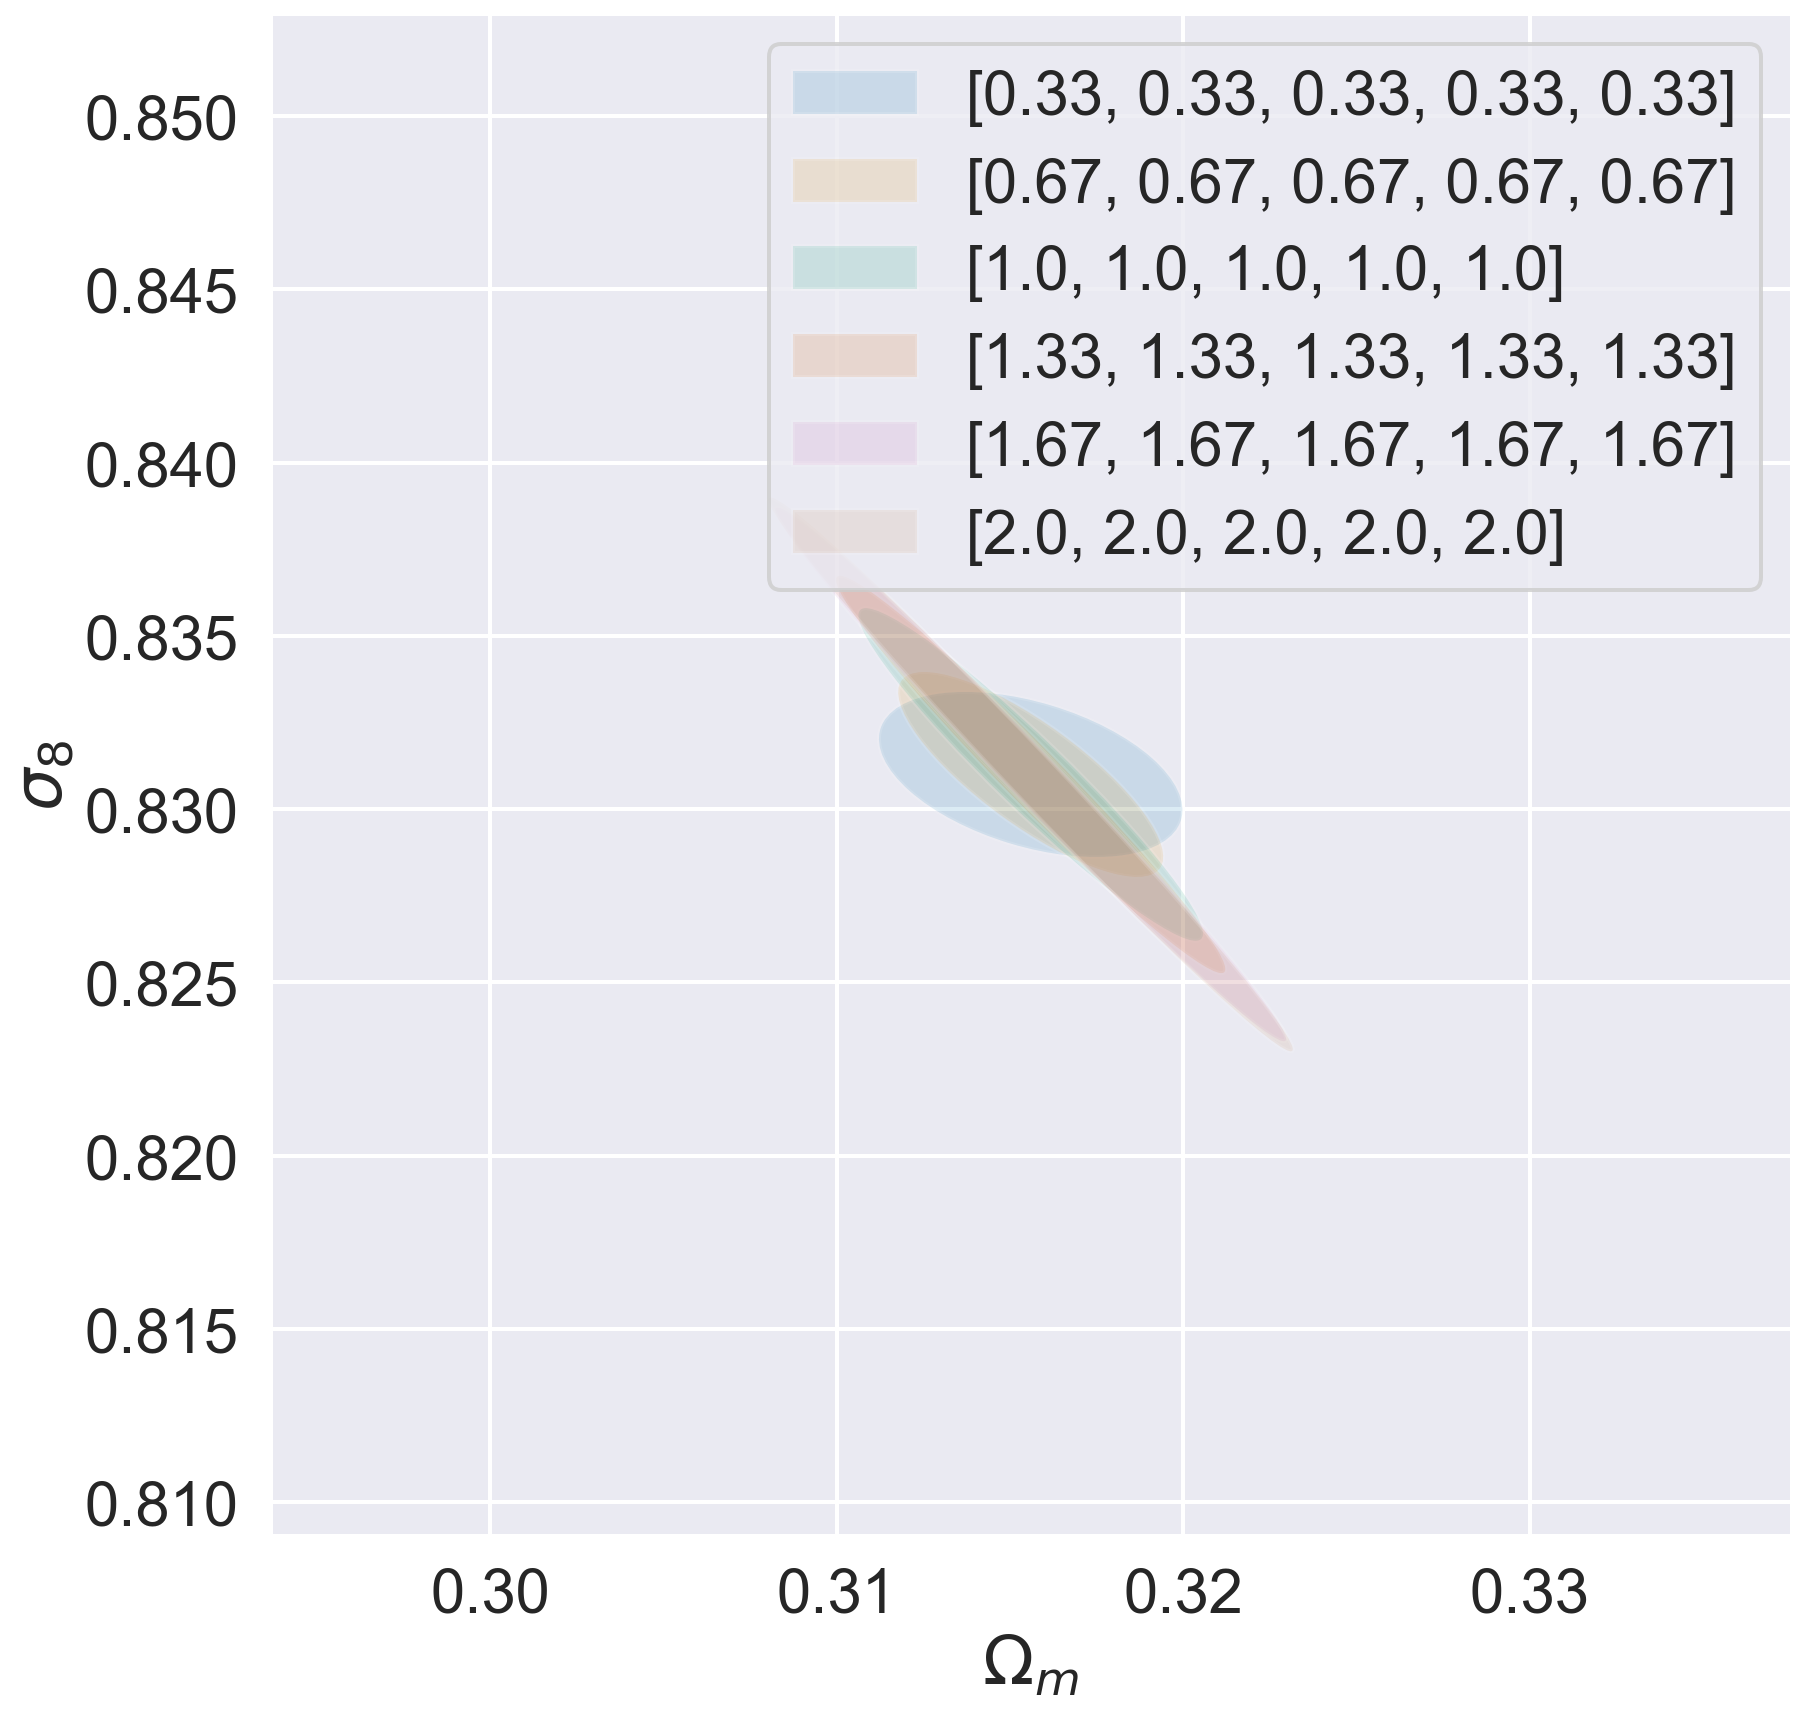

<Figure size 1368x1008 with 0 Axes>

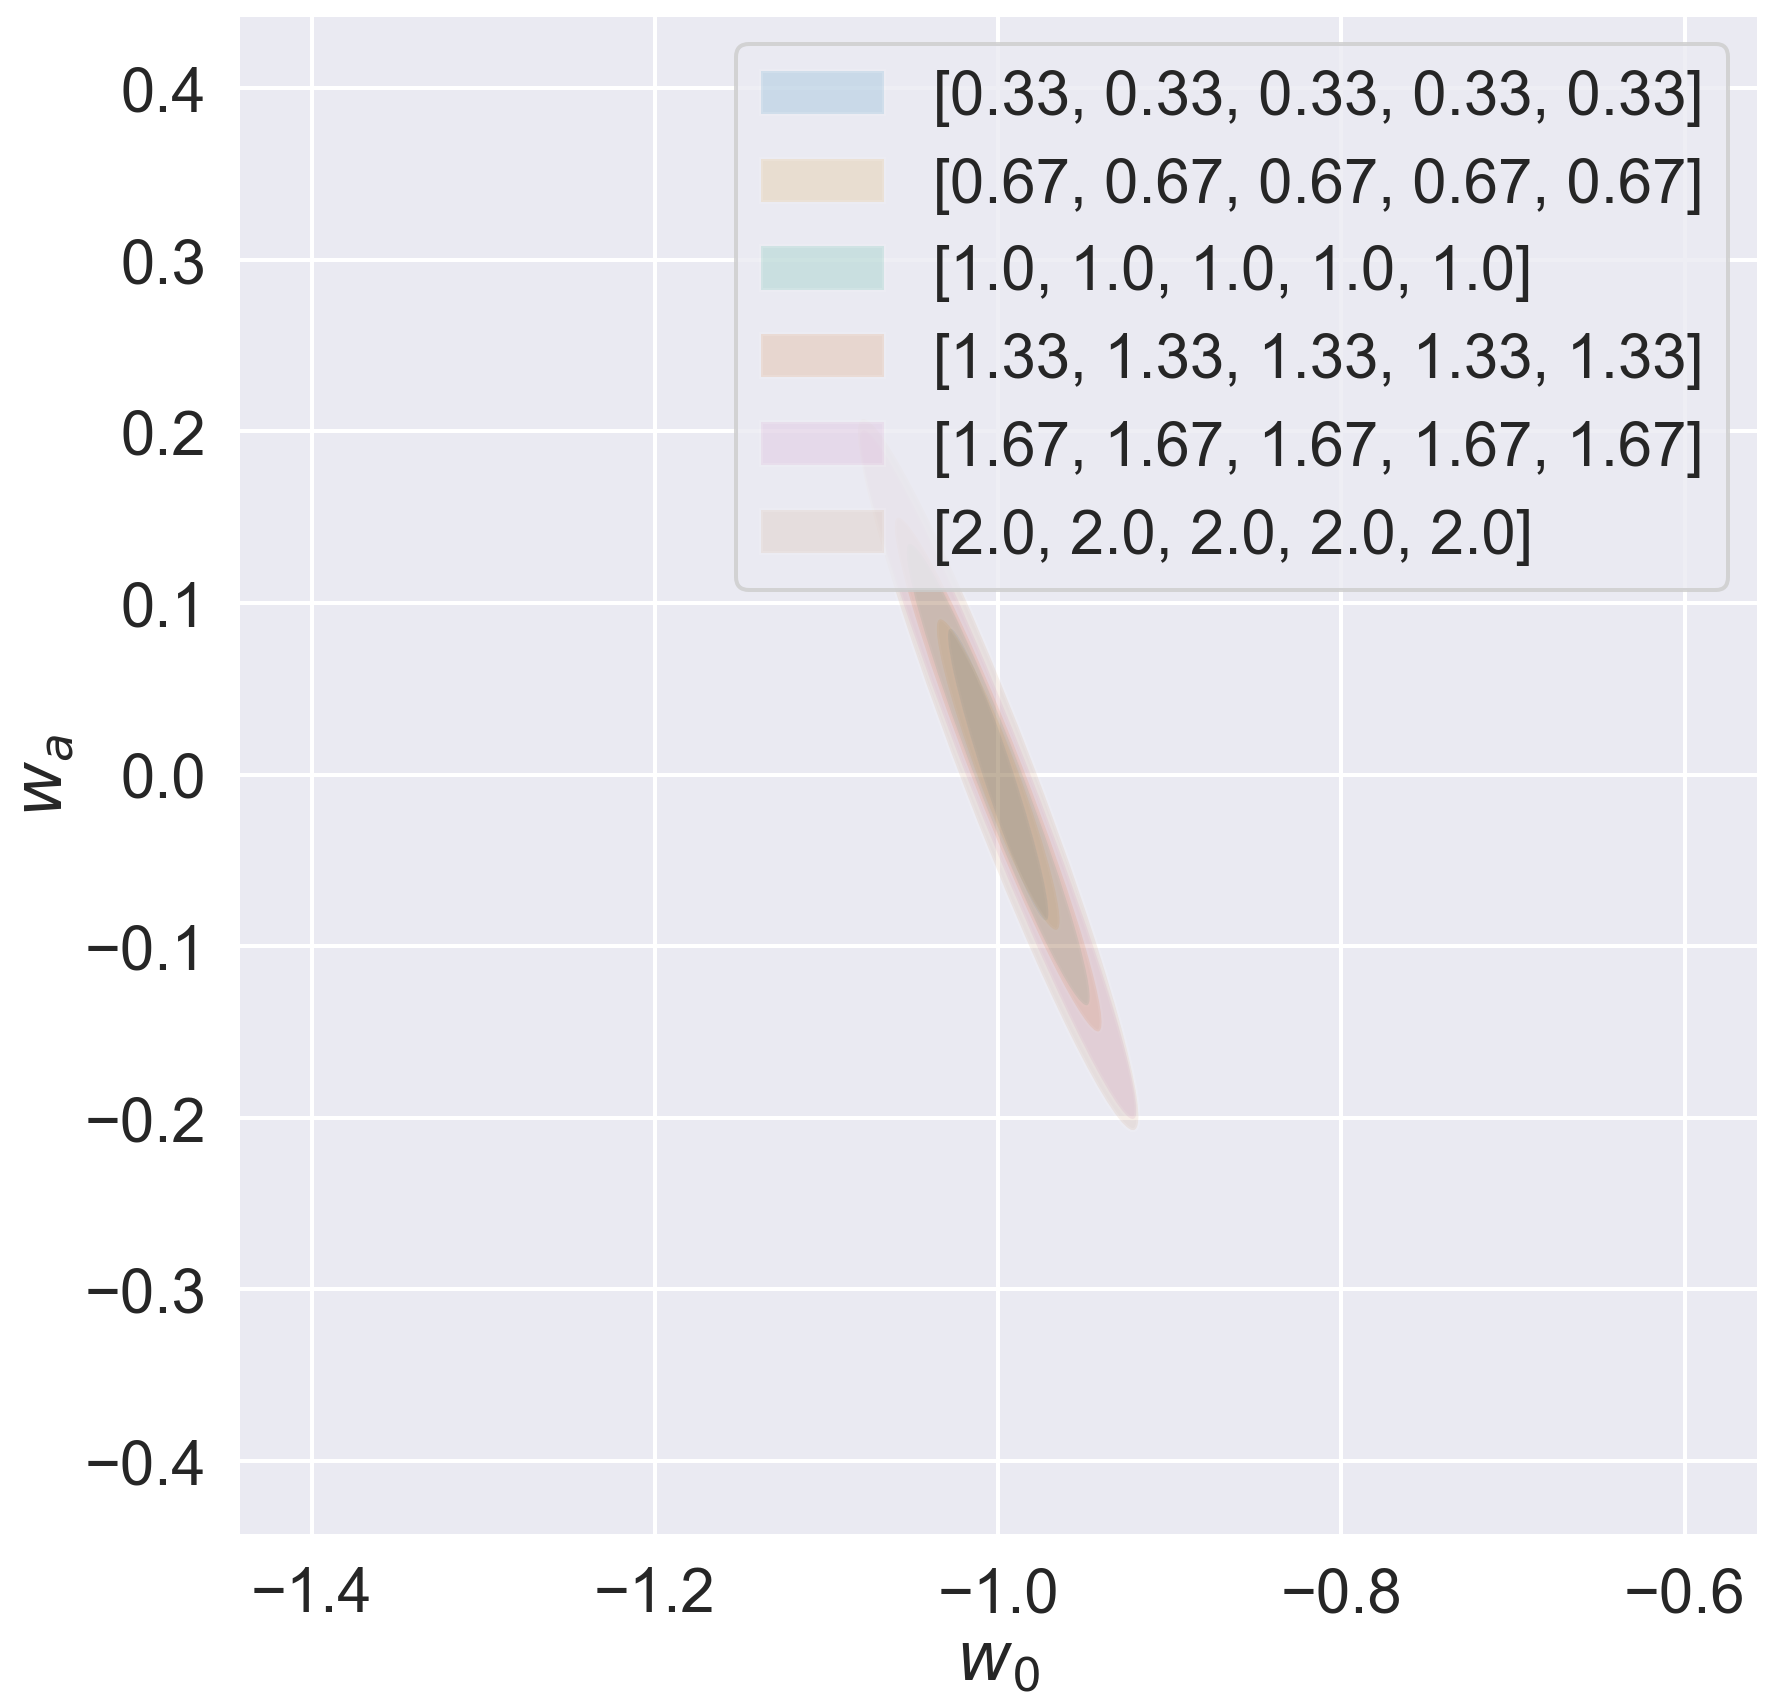

<Figure size 1368x1008 with 0 Axes>

In [96]:
FullPlot(*[obj[0].Class for obj in fishers], labels=[obj[0].Variances for obj in fishers])

In [51]:
regvar = Fisher(cosmo, zvariance=[1,1,1,1,1])
regvar.process()

Making Source Photo-z
Getting Ells
making C_ells
Getting covariance matrix
Getting derivatives
sigma_8
omega_b
h
n_s
omega_m
w_0
w_a
zbias1
zbias2
zbias3
zbias4
zbias5
zvariance1
[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

       0.0075414 , 0.00740897, 0.00727151, 0.00712944, 0.00698319])}
{0.30000000000000004: array([1.97049948e-001, 6.88253111e-001, 1.31993927e+000, 2.21394558e+000,
       2.68276309e+000, 2.16238897e+000, 7.06748951e-001, 5.56084029e-002,
       8.61638832e-004, 2.53744750e-006, 1.41437960e-009, 1.49167844e-013,
       2.97655624e-018, 1.12378197e-023, 8.02747738e-030, 1.08493866e-036,
       2.77434418e-044, 1.34228444e-052, 1.22873389e-061, 2.12813992e-071,
       6.97383363e-082, 4.32386424e-093, 5.07226084e-105, 1.12579722e-117,
       4.72767730e-131, 3.75633694e-145, 5.64690291e-160, 1.60614652e-175,
       8.64348864e-192, 8.80079757e-209, 1.69544638e-226, 6.17981040e-245,
       4.26182198e-264, 5.56089276e-284, 1.37284908e-304, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]), 0.65: array([5.93540123e-010, 1.06772559e-006, 3.65085584e-004, 2.39776735e-002,
       3.15295130e-001, 9.82866050e-001, 1.18688533e+000, 8.74011284e-001,
 

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.08430482e-071,
       3.55322570e-082, 2.20304446e-093, 2.58435869e-105, 5.73602959e-118,
       2.40879054e-131, 1.91388463e-145, 2.87714356e-160, 8.18344888e-176,
       4.40392869e-192, 4.48407888e-209, 8.63843903e-227, 3.14866432e-245,
       2.17143341e-264, 2.83332068e-284, 6.99477920e-305, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]), 0.65: array([1.80775874e-009, 3.25199627e-006, 1.11194952e-003, 7.30293491e-002,
       9.60301597e-001, 2.99353763e+000, 3.61492382e+000, 2.66199618e+000,
       9

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
     

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.08430482e-071,
       3.55322570e-082, 2.20304446e-093, 2.58435869e-105, 5.73602959e-118,
       2.40879054e-131, 1.91388463e-145, 2.87714356e-160, 8.18344888e-176,
       4.40392869e-192, 4.48407888e-209, 8.63843903e-227, 3.14866432e-245,
       2.17143341e-264, 2.83332068e-284, 6.99477920e-305, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000]), 0.65: array([1.80775874e-009, 3.25199627e-006, 1.11194952e-003, 7.30293491e-002,
       9.60301597e-001, 2.99353763e+000, 3.61492382e+000, 2.66199618e+000,
       9

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.736813

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
     

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

       4.50560037e-03, 3.82570143e-03, 3.07494413e-03, 2.28764082e-03])}
{0.30000000000000004: array([0.4575279 , 0.46407917, 0.46825777, 0.47000693, 0.46930934,
       0.46618727, 0.46070161, 0.45294991, 0.44306337, 0.43120309,
       0.41755554, 0.40232765, 0.38574149, 0.36802889, 0.34942609,
       0.33016863, 0.31048663, 0.29060052, 0.2707174 , 0.25102801,
       0.23170442, 0.21289834, 0.19474018, 0.17733863, 0.16078088,
       0.14513329, 0.13044248, 0.11673677, 0.10402782, 0.09231248,
       0.08157476, 0.07178771, 0.06291543, 0.05491488, 0.04773766,
       0.04133157, 0.03564211, 0.03061369, 0.02619075, 0.02231872]), 0.65: array([0.13523703, 0.13796535, 0.14022511, 0.14199189, 0.14324654,
       0.14397549, 0.14417104, 0.14383145, 0.14296101, 0.14156992,
       0.13967408, 0.13729484, 0.13445852, 0.131196  , 0.12754211,
       0.123535  , 0.11921552, 0.11462649, 0.10981201, 0.10481677,
       0.09968535, 0.0944616 , 0.08918802, 0.08390524, 0.07865153,
       0.07346242, 0.06837

 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
     

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

       4.50560037e-03, 3.82570143e-03, 3.07494413e-03, 2.28764082e-03])}
{0.30000000000000004: array([0.4575279 , 0.46407917, 0.46825777, 0.47000693, 0.46930934,
       0.46618727, 0.46070161, 0.45294991, 0.44306337, 0.43120309,
       0.41755554, 0.40232765, 0.38574149, 0.36802889, 0.34942609,
       0.33016863, 0.31048663, 0.29060052, 0.2707174 , 0.25102801,
       0.23170442, 0.21289834, 0.19474018, 0.17733863, 0.16078088,
       0.14513329, 0.13044248, 0.11673677, 0.10402782, 0.09231248,
       0.08157476, 0.07178771, 0.06291543, 0.05491488, 0.04773766,
       0.04133157, 0.03564211, 0.03061369, 0.02619075, 0.02231872]), 0.65: array([0.13523703, 0.13796535, 0.14022511, 0.14199189, 0.14324654,
       0.14397549, 0.14417104, 0.14383145, 0.14296101, 0.14156992,
       0.13967408, 0.13729484, 0.13445852, 0.131196  , 0.12754211,
       0.123535  , 0.11921552, 0.11462649, 0.10981201, 0.10481677,
       0.09968535, 0.0944616 , 0.08918802, 0.08390524, 0.07865153,
       0.07346242, 0.06837

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498898e-02 2.90984337e-02 2.37706529e-02
 1.88147221e-02 1.47904702e-02 1.18927117e-02 9.84268622e-03
 8.26086572e-03 6.97012694e-03 5.95294600e-03 5.17138795e-03
 4.50560037e-03 3.82570143e-03 3.07494413e-03 2.28764082e-03]
{0.30000000000000004: array([1.00398572e-001, 3.50670632e-001, 6.72519933e-001, 1.12802352e+000,
       1.36688990e+000, 1.10175500e+000, 3.60094414e-001, 2.83329395e-002,
       4.39012085e-004, 1.29285041e-006, 7.20638062e-010, 7.60022457e-014,
       1.51657993e-018, 5.72576174e-024, 4.09006587e-030, 5.52785185e-037,
       1.41355122e-044, 6.83904983e-053, 6.26050040e-062, 1.0843048

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.00398572e-001 3.50670632e-001 6.72519933e-001 1.12802352e+000
 1.36688990e+000 1.10175500e+000 3.60094414e-001 2.83329395e-002
 4.39012085e-004 1.29285041e-006 7.20638062e-010 7.60022457e-014
 1.51657993e-018 5.72576174e-024 4.09006587e-030 5.52785185e-037
 1.41355122e-044 6.83904983e-053 6.26050040e-062 1.08430482e-071
 3.55322570e-082 2.20304446e-093 2.58435869e-105 5.73602959e-118
 2.40879054e-131 1.91388463e-145 2.87714356e-160 8.18344888e-176
 4.40392869e-192 4.48407888e-209 8.63843903e-227 3.14866432e-245
 2.17143341e-264 2.83332068e-284 6.99477920e-305 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726

[1.80775874e-009 3.25199627e-006 1.11194952e-003 7.30293491e-002
 9.60301597e-001 2.99353763e+000 3.61492382e+000 2.66199618e+000
 9.80203479e-001 1.26531528e-001 4.74978741e-003 4.89949639e-005
 1.37216660e-007 1.04126069e-010 2.14035728e-014 1.19171621e-018
 1.79728841e-023 7.34211083e-029 8.12423219e-035 2.43501671e-041
 1.97687765e-048 4.34726251e-056 2.58946573e-064 4.17794480e-073
 1.82588514e-082 2.16143630e-092 6.93058115e-103 6.01942619e-114
 1.41611578e-125 9.02403264e-138 1.55761737e-150 7.28247719e-164
 9.22264967e-178 3.16366521e-192 2.93956829e-207 7.39834902e-223
 5.04364261e-239 9.31348079e-256 4.65841278e-273 6.31134821e-291]
[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635

[1.07378729e-014 5.22943879e-011 6.90675774e-008 2.47750481e-005
 2.42334182e-003 6.54093007e-002 5.06389373e-001 1.28229665e+000
 1.54309974e+000 1.48354452e+000 1.29808129e+000 9.00019478e-001
 4.00295706e-001 9.35267085e-002 1.01519108e-002 4.81997971e-004
 9.76065481e-006 8.35360473e-008 3.01267998e-010 4.57454436e-013
 2.92389884e-016 7.86635852e-020 8.90793662e-024 4.24591726e-028
 8.51837569e-033 7.19337795e-038 2.55681786e-043 3.82522975e-049
 2.40882960e-055 6.38477292e-062 7.12320845e-069 3.34500424e-076
 6.61162957e-084 5.50061407e-092 1.92621455e-100 2.83915410e-109
 1.76142474e-118 4.59970564e-128 5.05576419e-138 2.33902251e-148]
[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-0

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

[8.99726032e-24 7.94523934e-20 2.95552390e-16 4.63206687e-13
 3.06003412e-10 8.52886853e-08 1.00479106e-05 5.02267054e-04
 1.07400917e-02 1.00038933e-01 4.23008466e-01 8.89946138e-01
 1.11107933e+00 1.03993640e+00 8.41863344e-01 5.67639485e-01
 2.80293228e-01 9.00428507e-02 1.73681382e-02 1.91572225e-03
 1.17504780e-04 3.94840923e-06 7.21433634e-08 7.14299050e-10
 3.82670850e-12 1.10858633e-14 1.73624976e-17 1.46999997e-20
 6.72779353e-24 1.66446340e-27 2.22597827e-31 1.60920853e-35
 6.28851890e-40 1.32840050e-44 1.51689076e-49 9.36319757e-55
 3.12419893e-60 5.63505008e-66 5.49416238e-72 2.89567496e-78]
[3.78925106e-32 2.82811099e-28 1.14213123e-24 2.49549522e-21
 2.94997243e-18 1.88691867e-15 6.53255650e-13 1.22469198e-10
 1.24440468e-08 6.86335703e-07 2.06009620e-05 3.38105912e-04
 3.06053655e-03 1.55335885e-02 4.56359545e-02 8.24930864e-02
 1.02234372e-01 1.01316662e-01 9.23828702e-02 8.22990739e-02
 7.20678738e-02 6.23545127e-02 5.37583874e-02 4.63608012e-02
 4.00375371e-02 3.44498

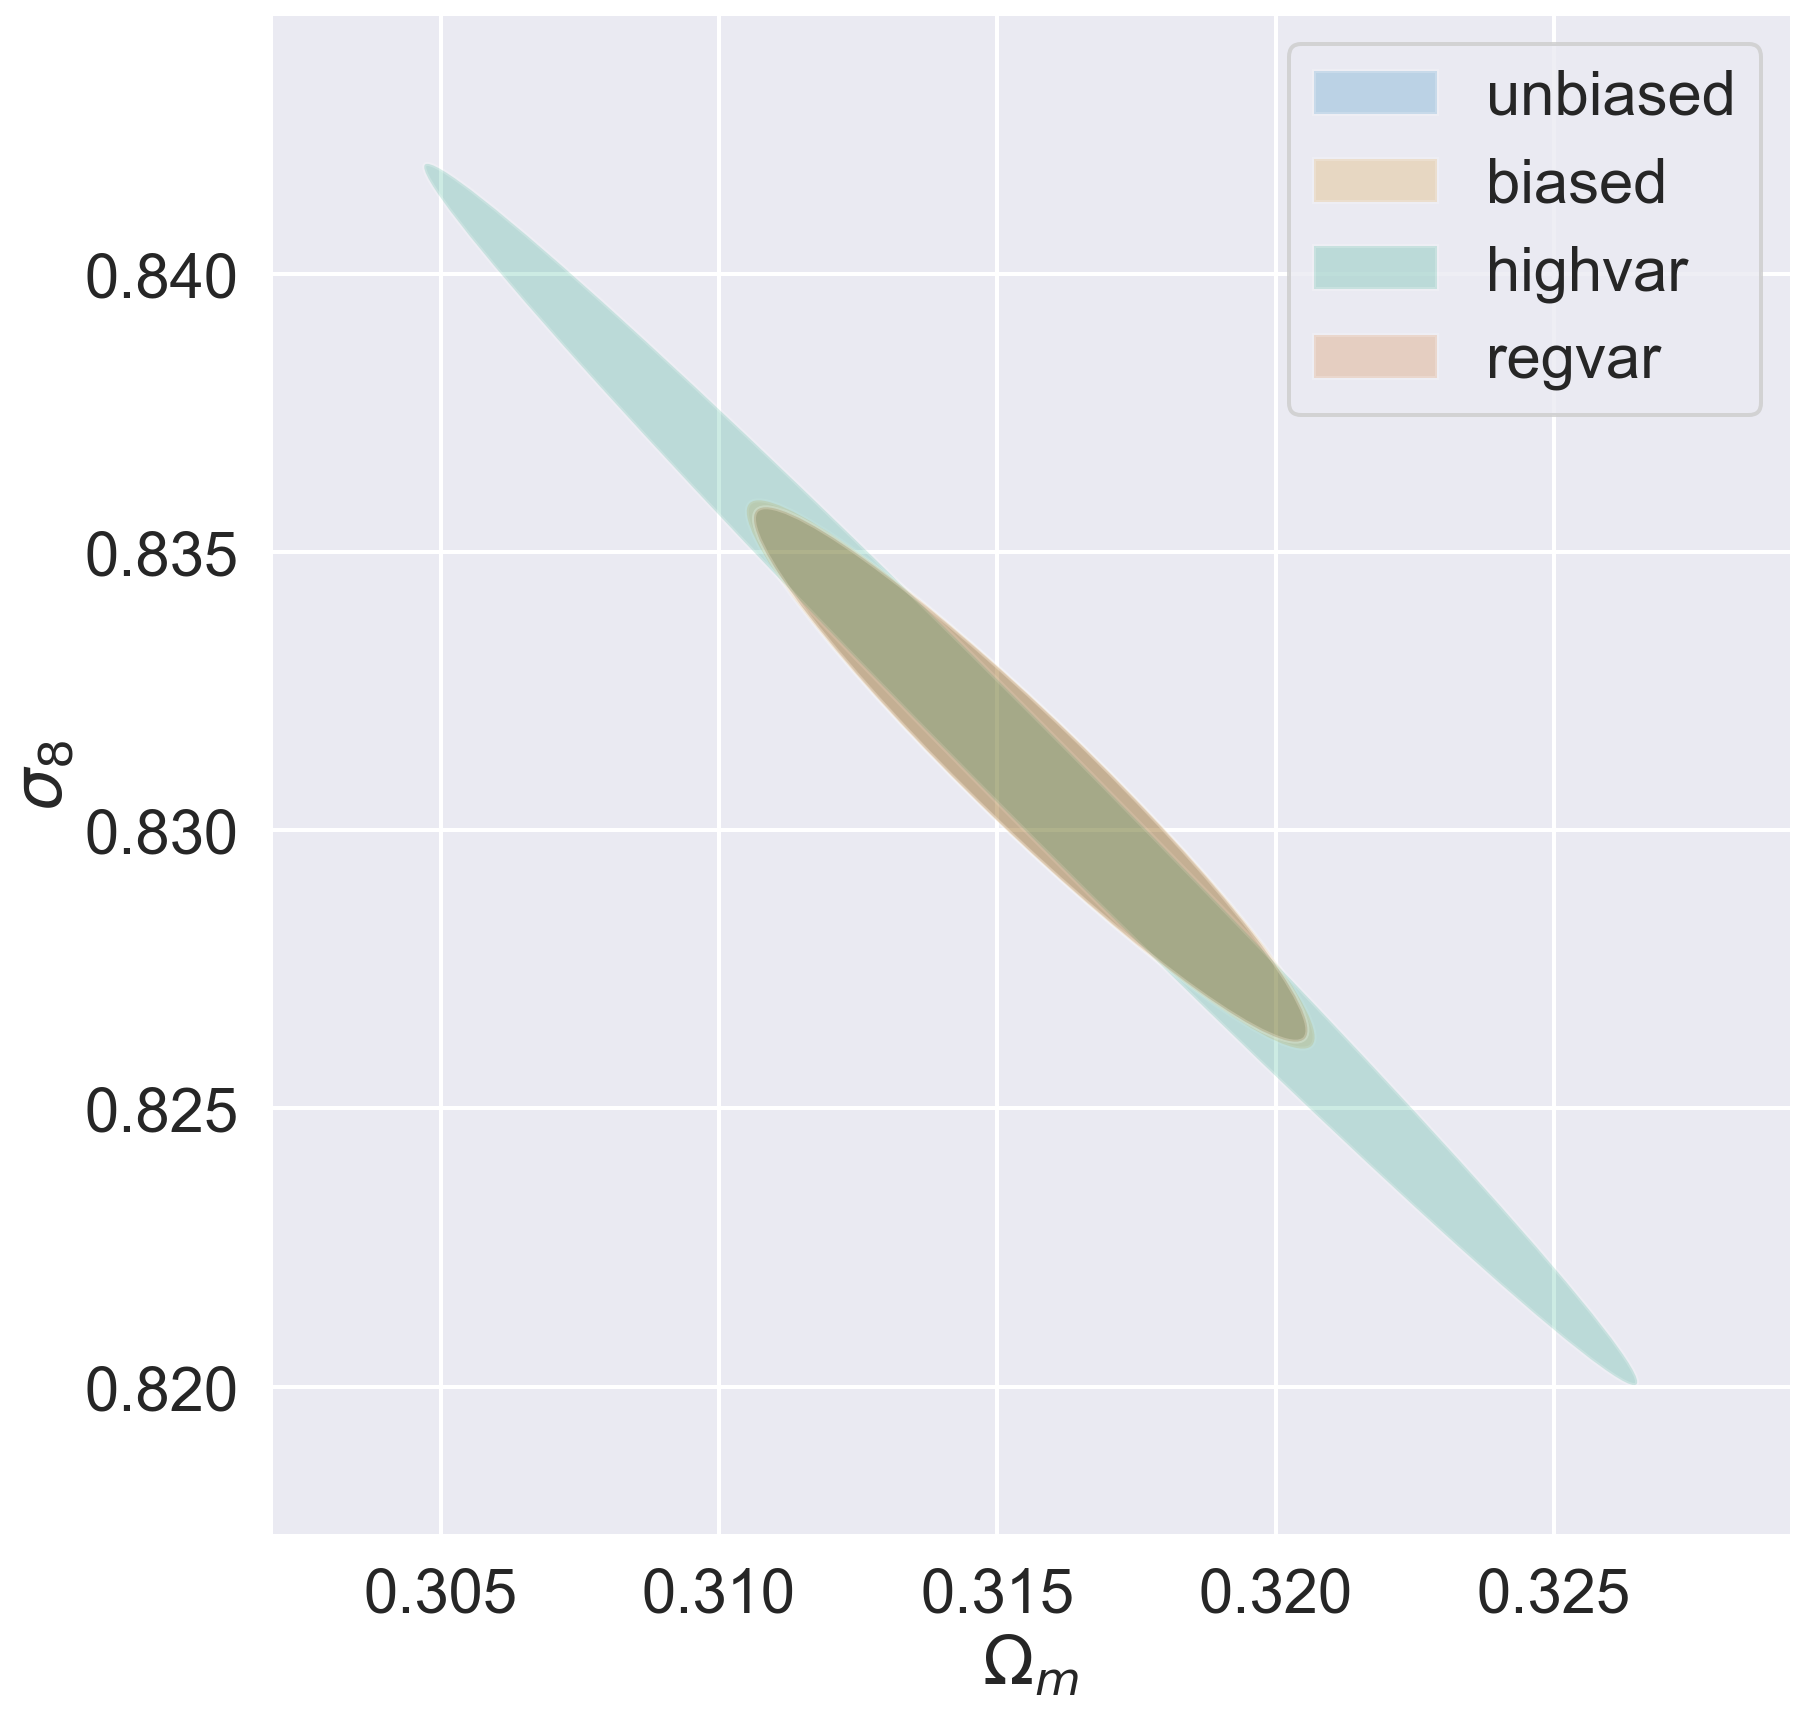

<Figure size 1368x1008 with 0 Axes>

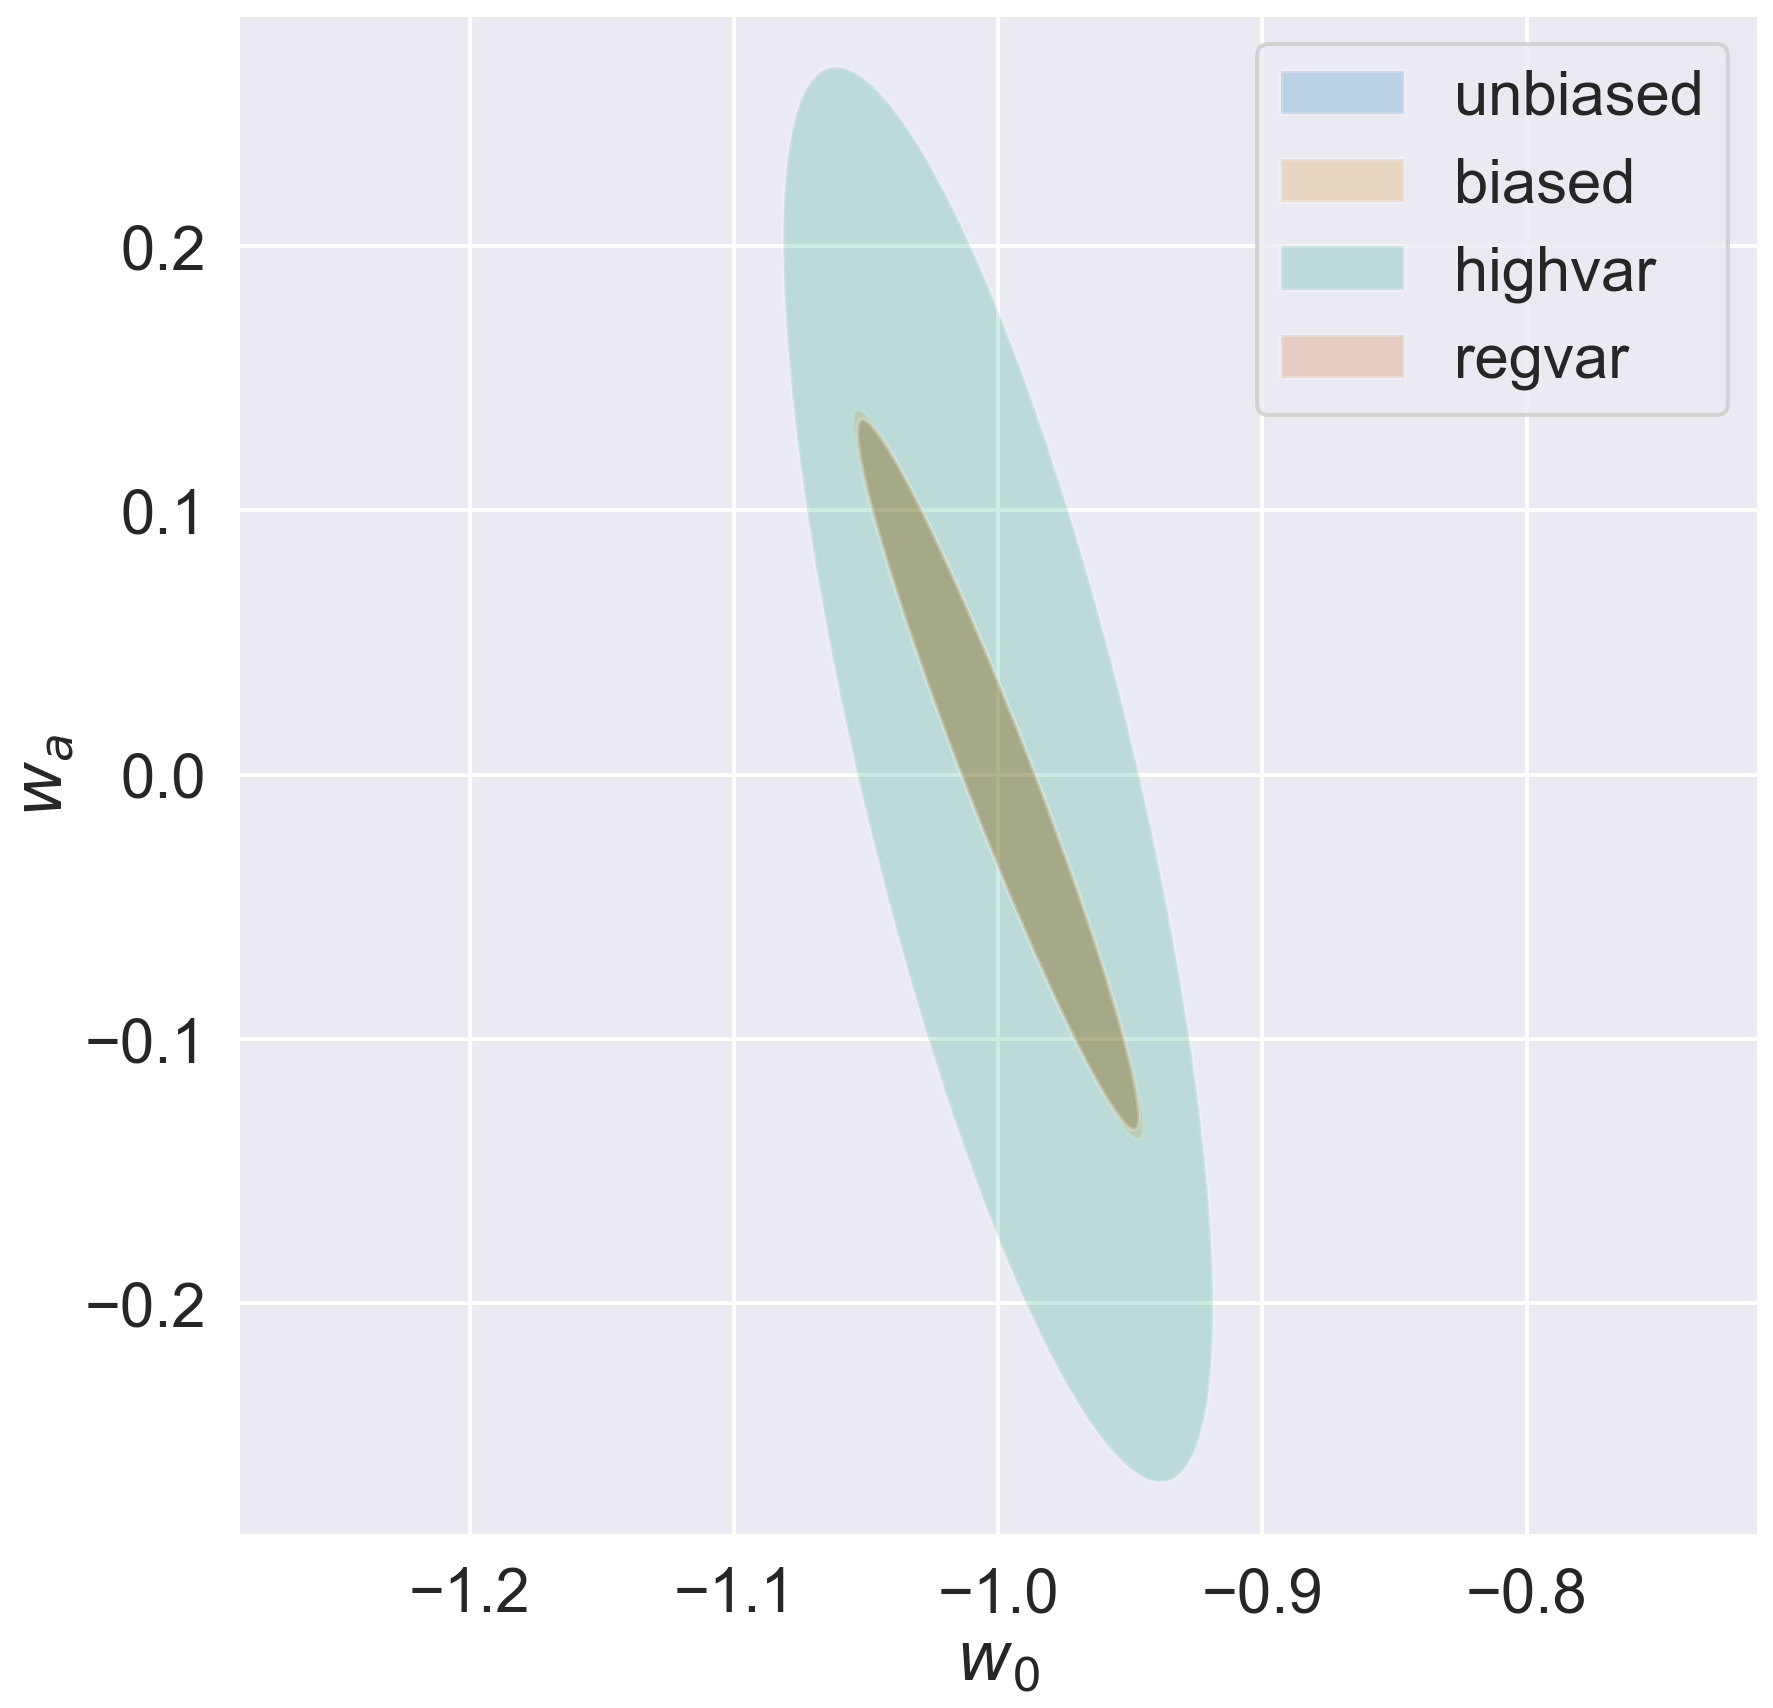

<Figure size 1368x1008 with 0 Axes>

In [52]:
FullPlot(unbiased, biased, highvar, regvar, labels=['unbiased', 'biased', 'highvar', 'regvar'])

(array([ 1.,  0.,  0.,  1.,  2.,  4.,  8., 28., 16.,  4.]),
 array([0.15290866, 0.24253843, 0.3321682 , 0.42179798, 0.51142775,
        0.60105752, 0.6906873 , 0.78031707, 0.86994684, 0.95957661,
        1.04920639]),
 <BarContainer object of 10 artists>)

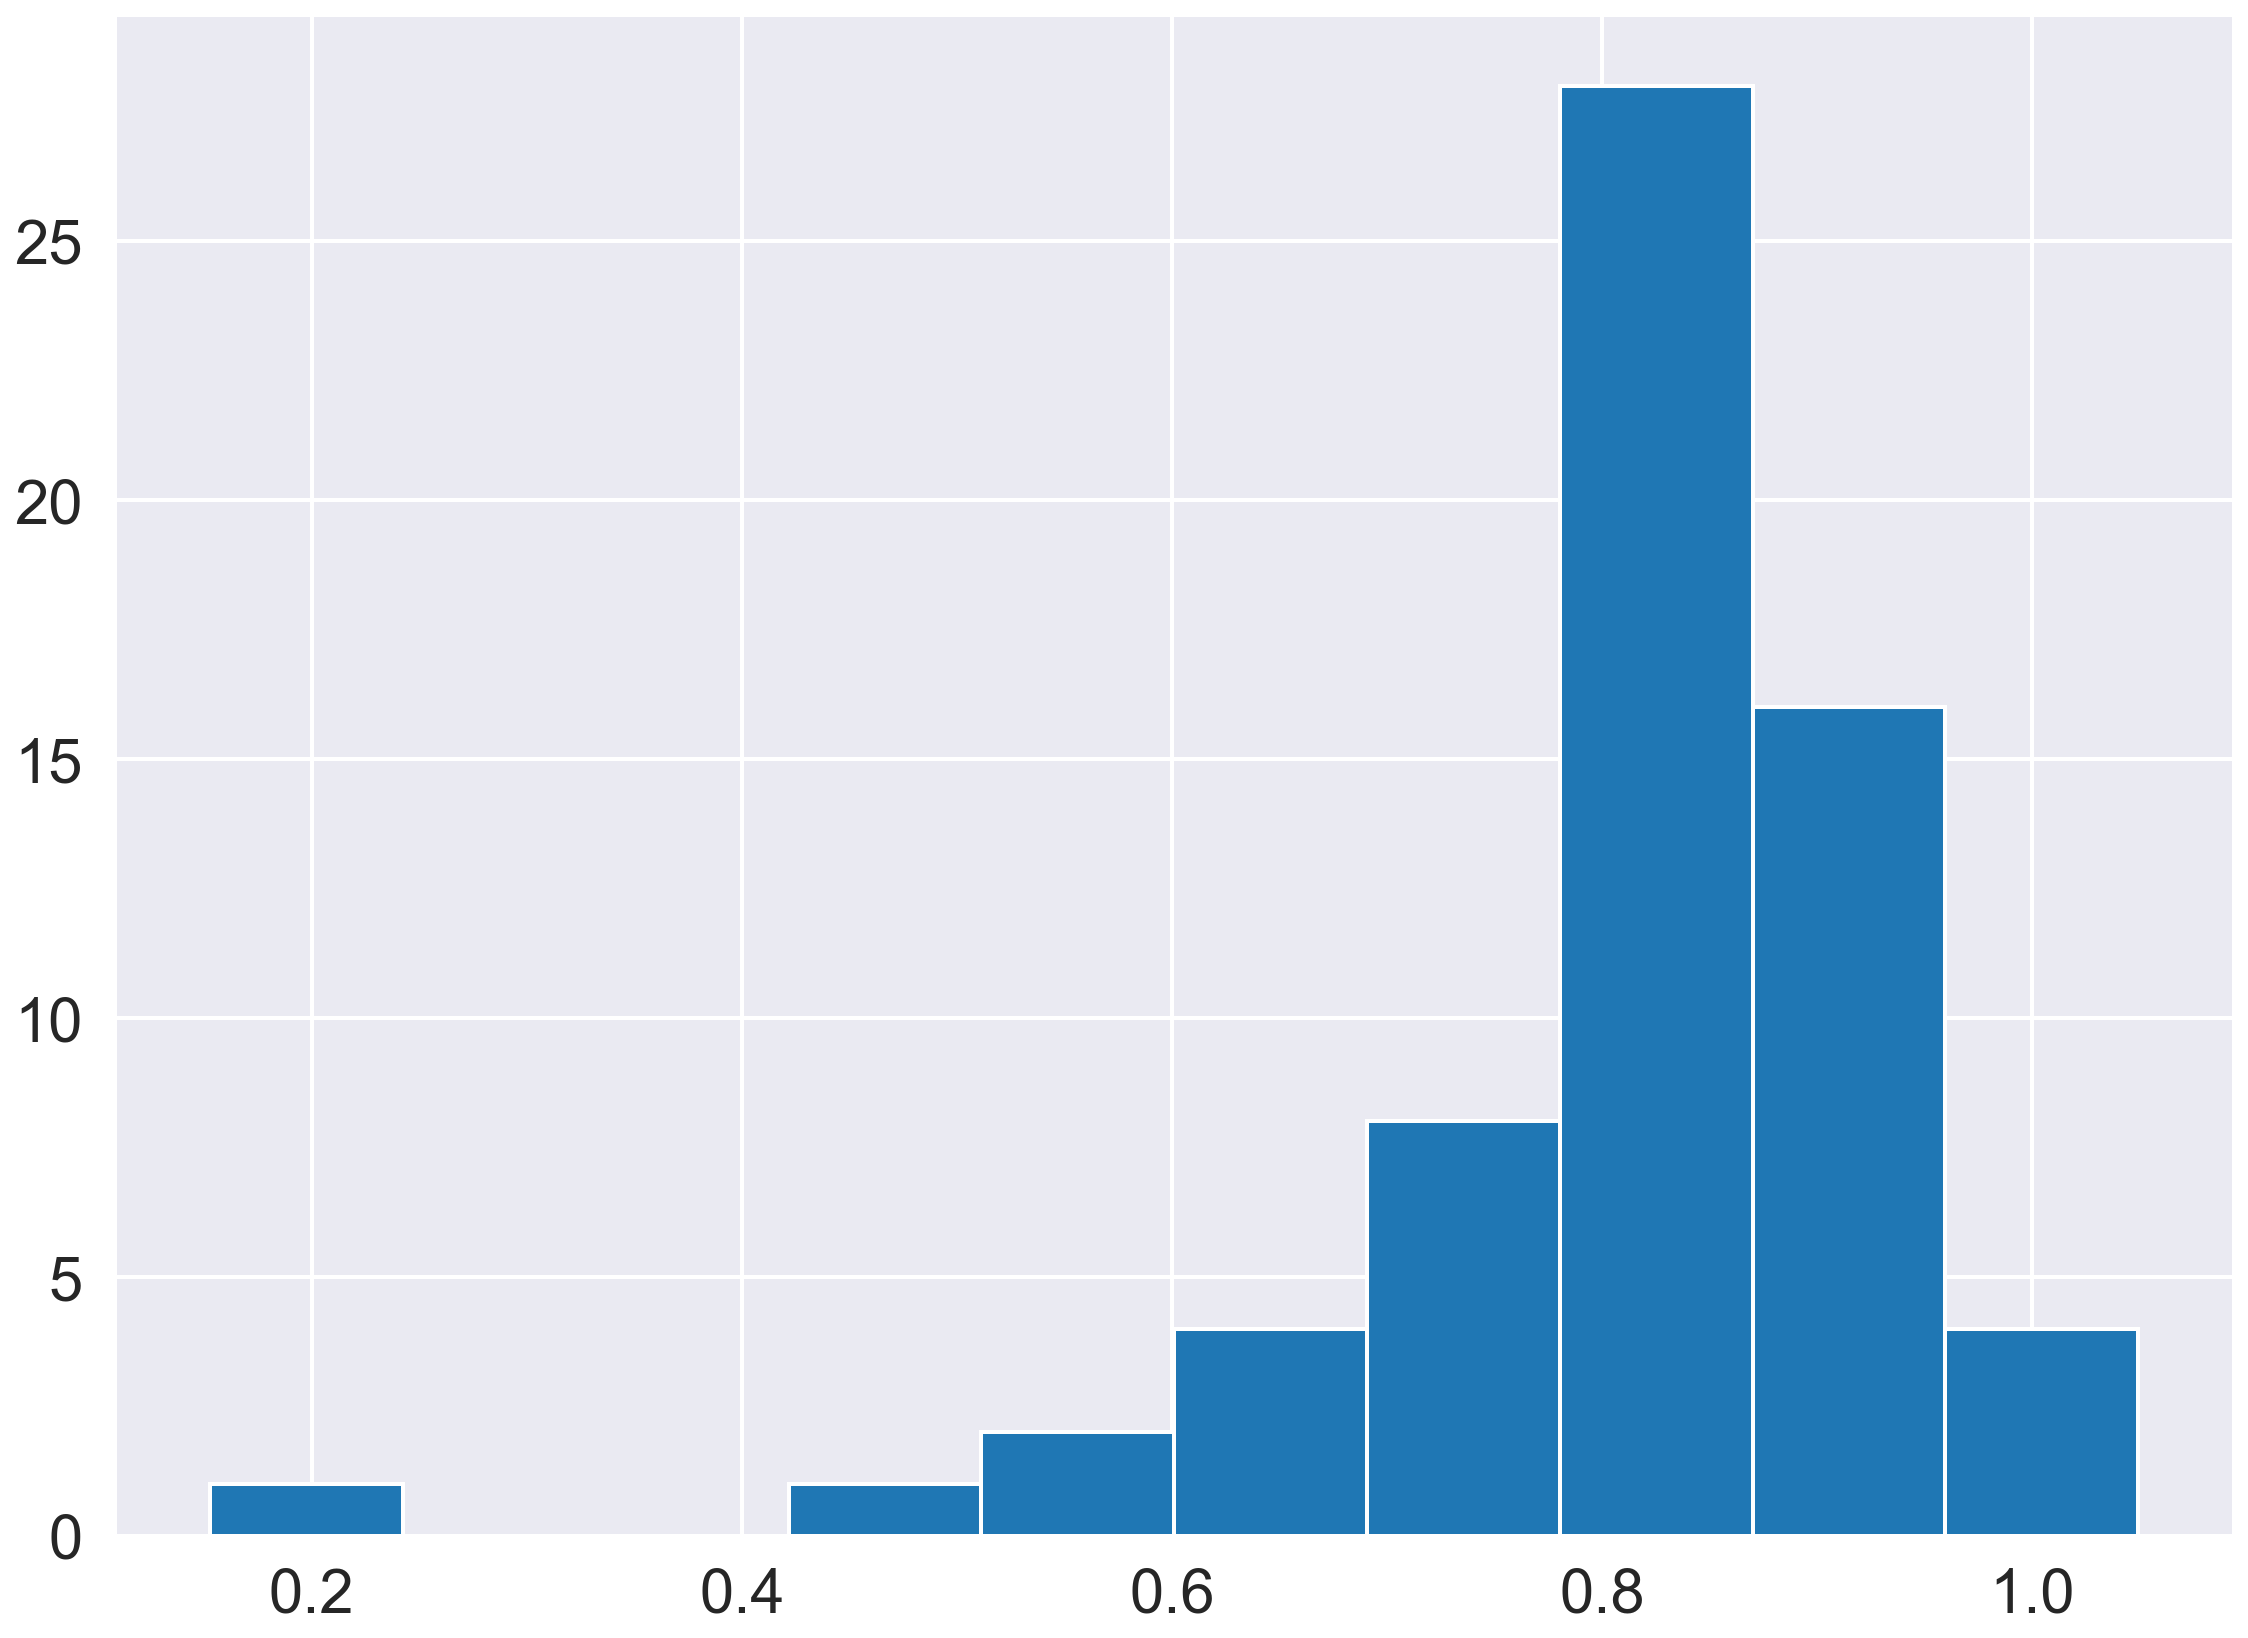

In [24]:
plt.hist(np.array([unbiased.sampler.chain[i][:,0] for i in range(8)]).flatten())

(array([[ 0.,  0.,  1.,  8.,  5.,  0., 15.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 11., 59., 19.,  4.,  5.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  7.,  2.,  4.,  2.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  4.,  0.],
        [ 0.,  0.,  9.,  2.,  0.,  0.,  0.,  0.,  0.,  3.],
        [ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.18057063, 0.18564374, 0.19071685, 0.19578996, 0.20086307,
        0.20593618, 0.21100929, 0.2160824 , 0.22115551, 0.22622861,
        0.23130172]),
 array([0.97614321, 0.97959313, 0.98304304, 0.98649296, 0.98994288,
        0.9933928 , 0.99684271, 1.00029263, 1.00374255, 1.00719247,
        1.01064239]),
 <matplotlib.collections.QuadMesh at 0x7fc677ab4bd0>)

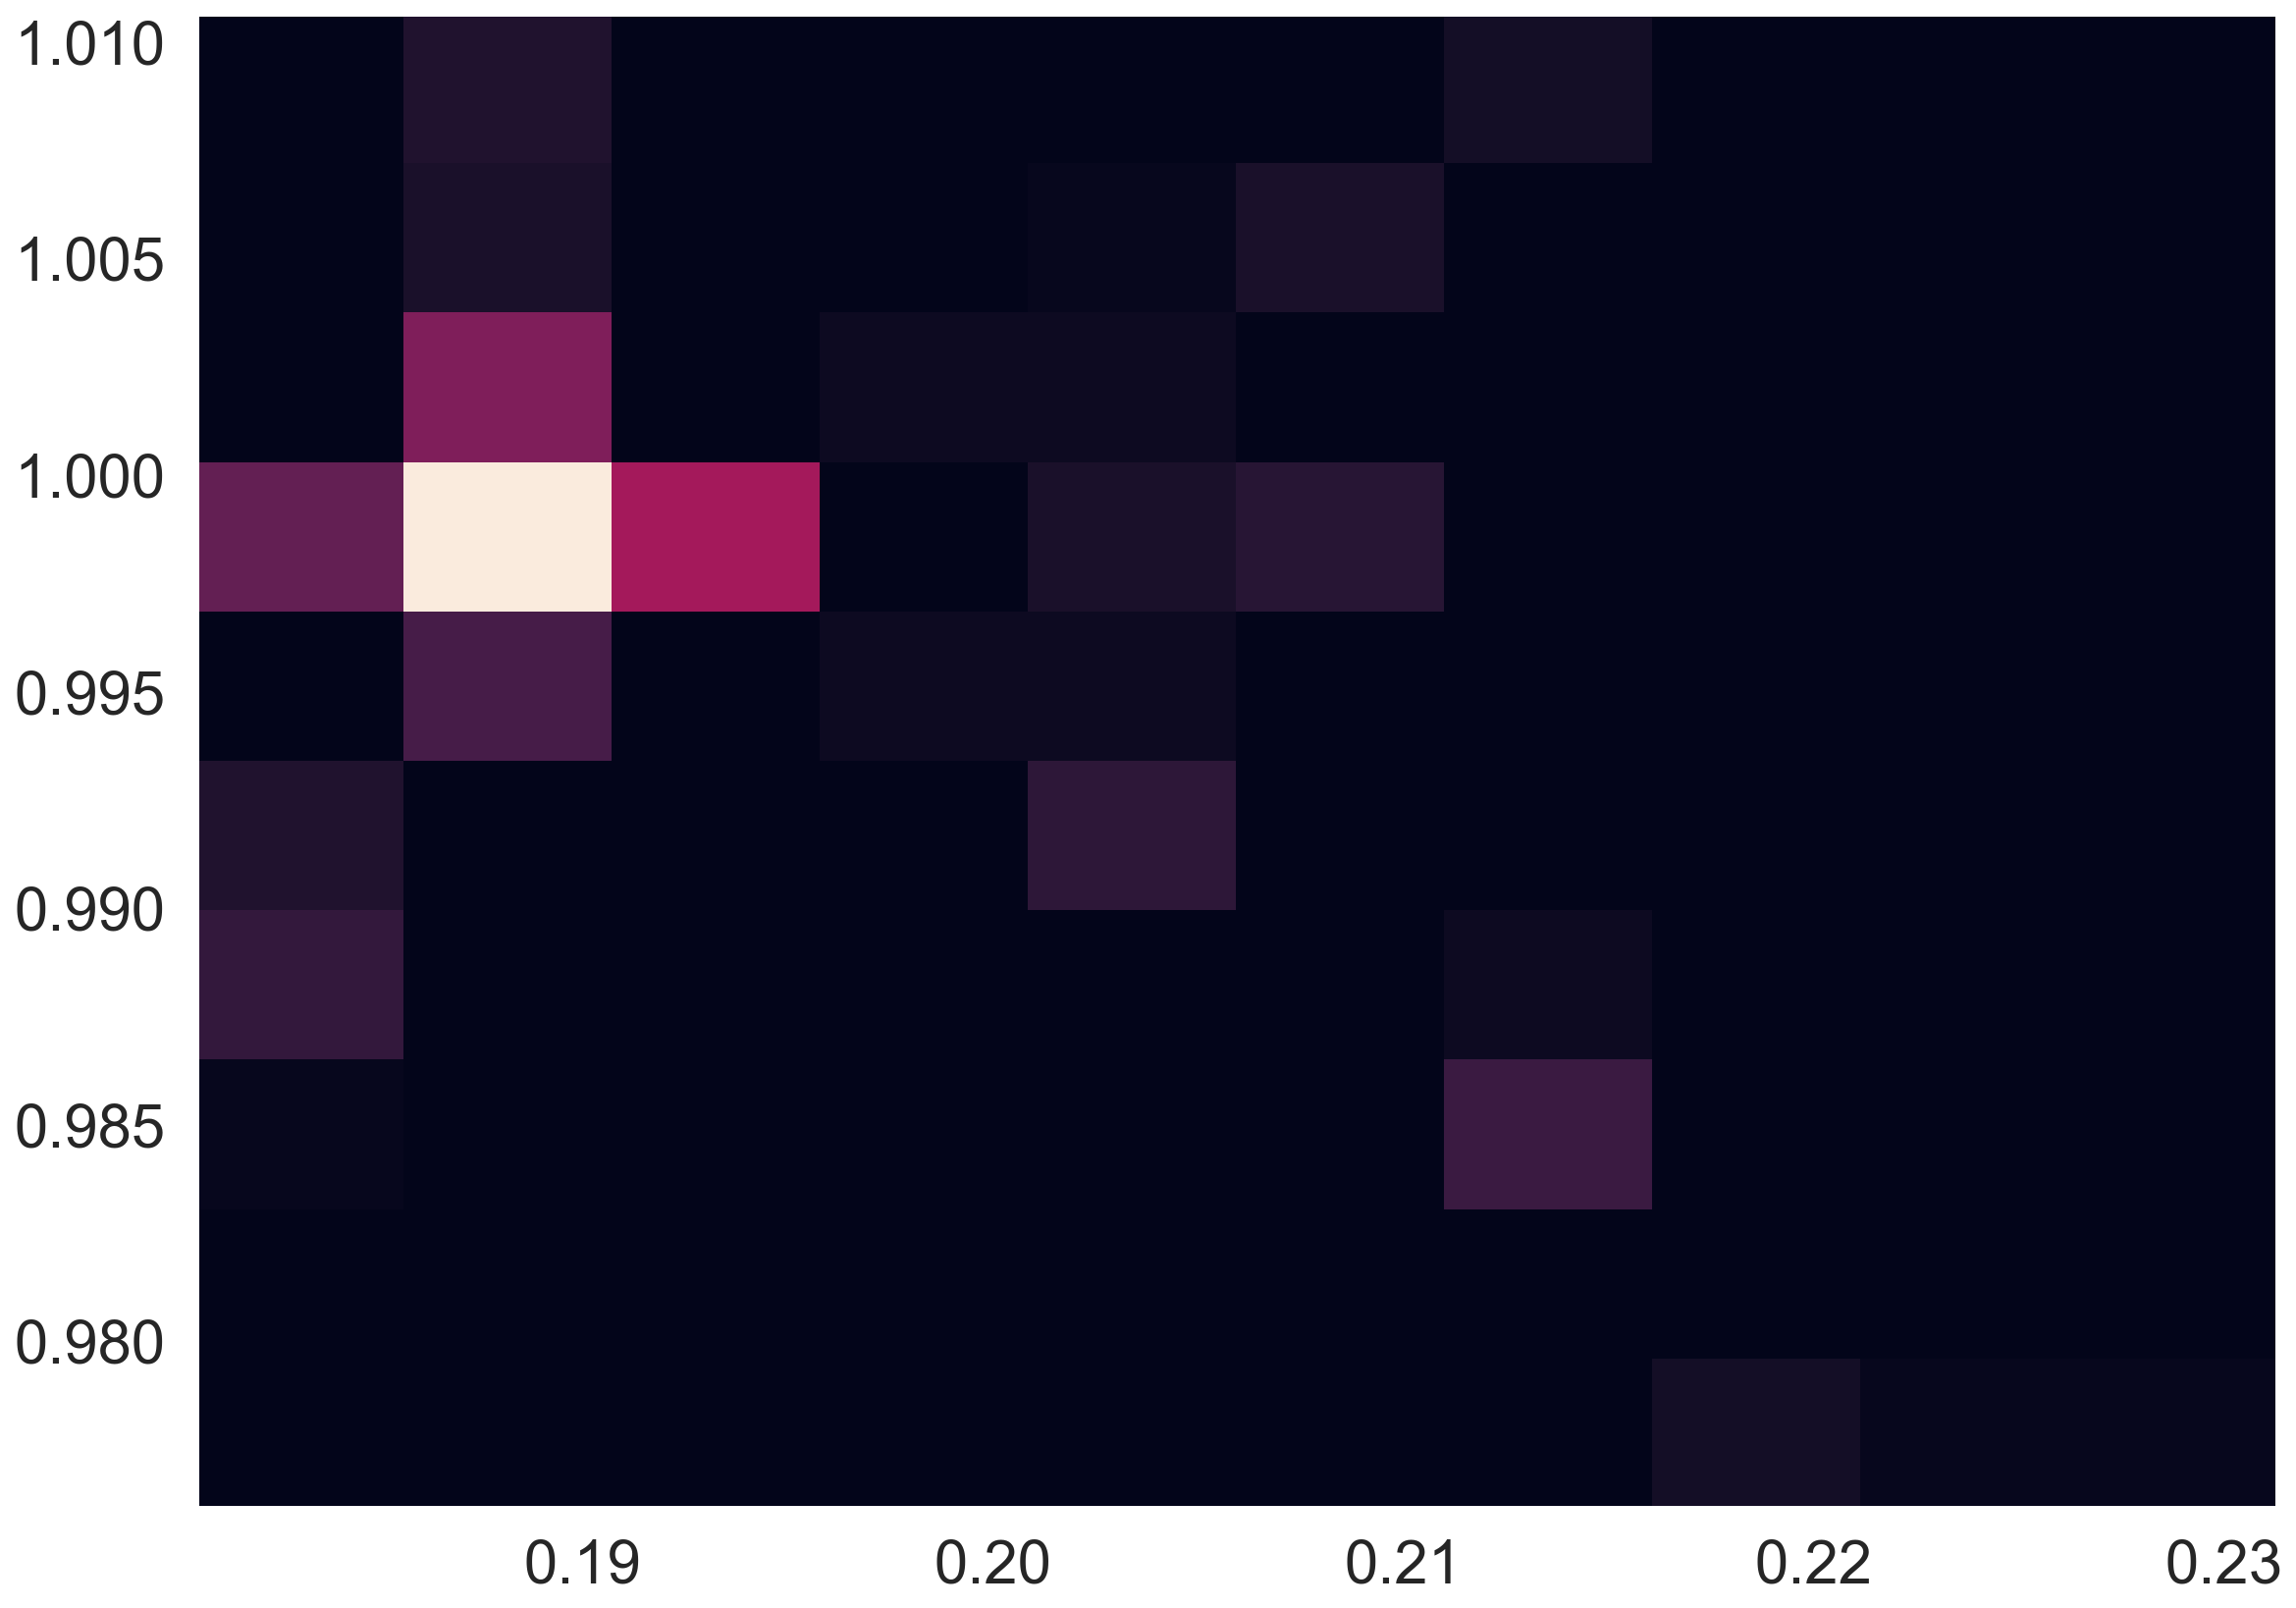

In [97]:
plt.hist2d(np.array([biased.sampler.chain[i][:,0] for i in range(8)]).flatten(),
           np.array([biased.sampler.chain[i][:,1] for i in range(8)]).flatten())

(0.3156, 0.831)
(0.3156, 0.831)
(0.3156, 0.831)
(0.3156, 0.831)


(0.12557891108674796, 0.505621088913252)

(0.6409789110867479, 1.021021088913252)

<Figure size 1368x1008 with 0 Axes>

(-1, 0)
(-1, 0)
(-1, 0)
(-1, 0)


(-4.572114240521643, 2.572114240521643)

(-3.572114240521643, 3.572114240521643)

<Figure size 1368x1008 with 0 Axes>

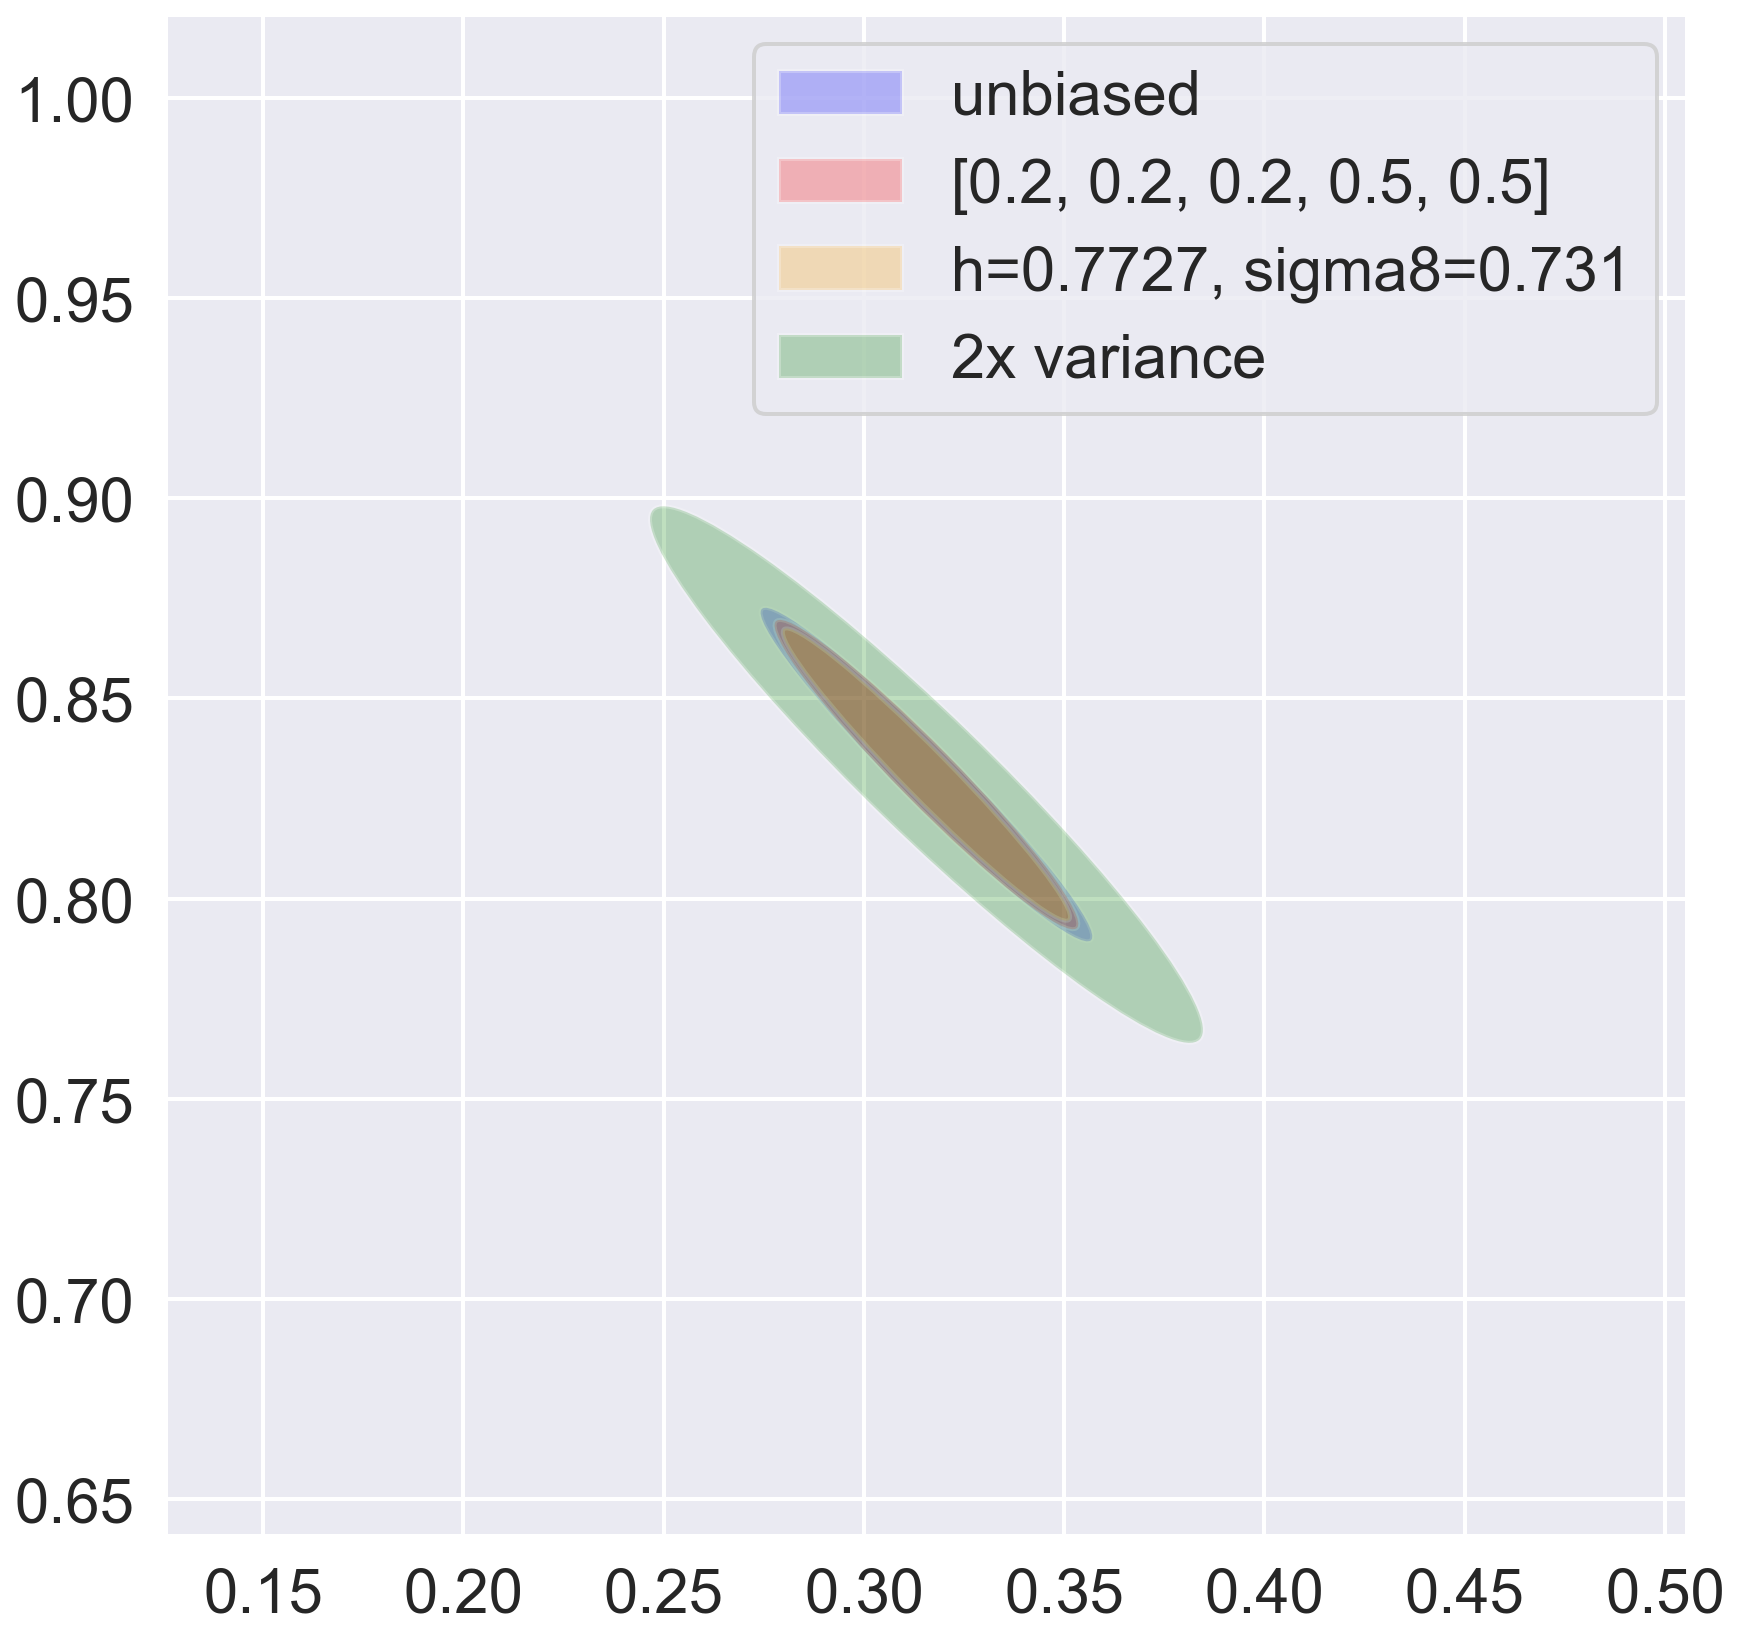

<Figure size 1368x1008 with 0 Axes>

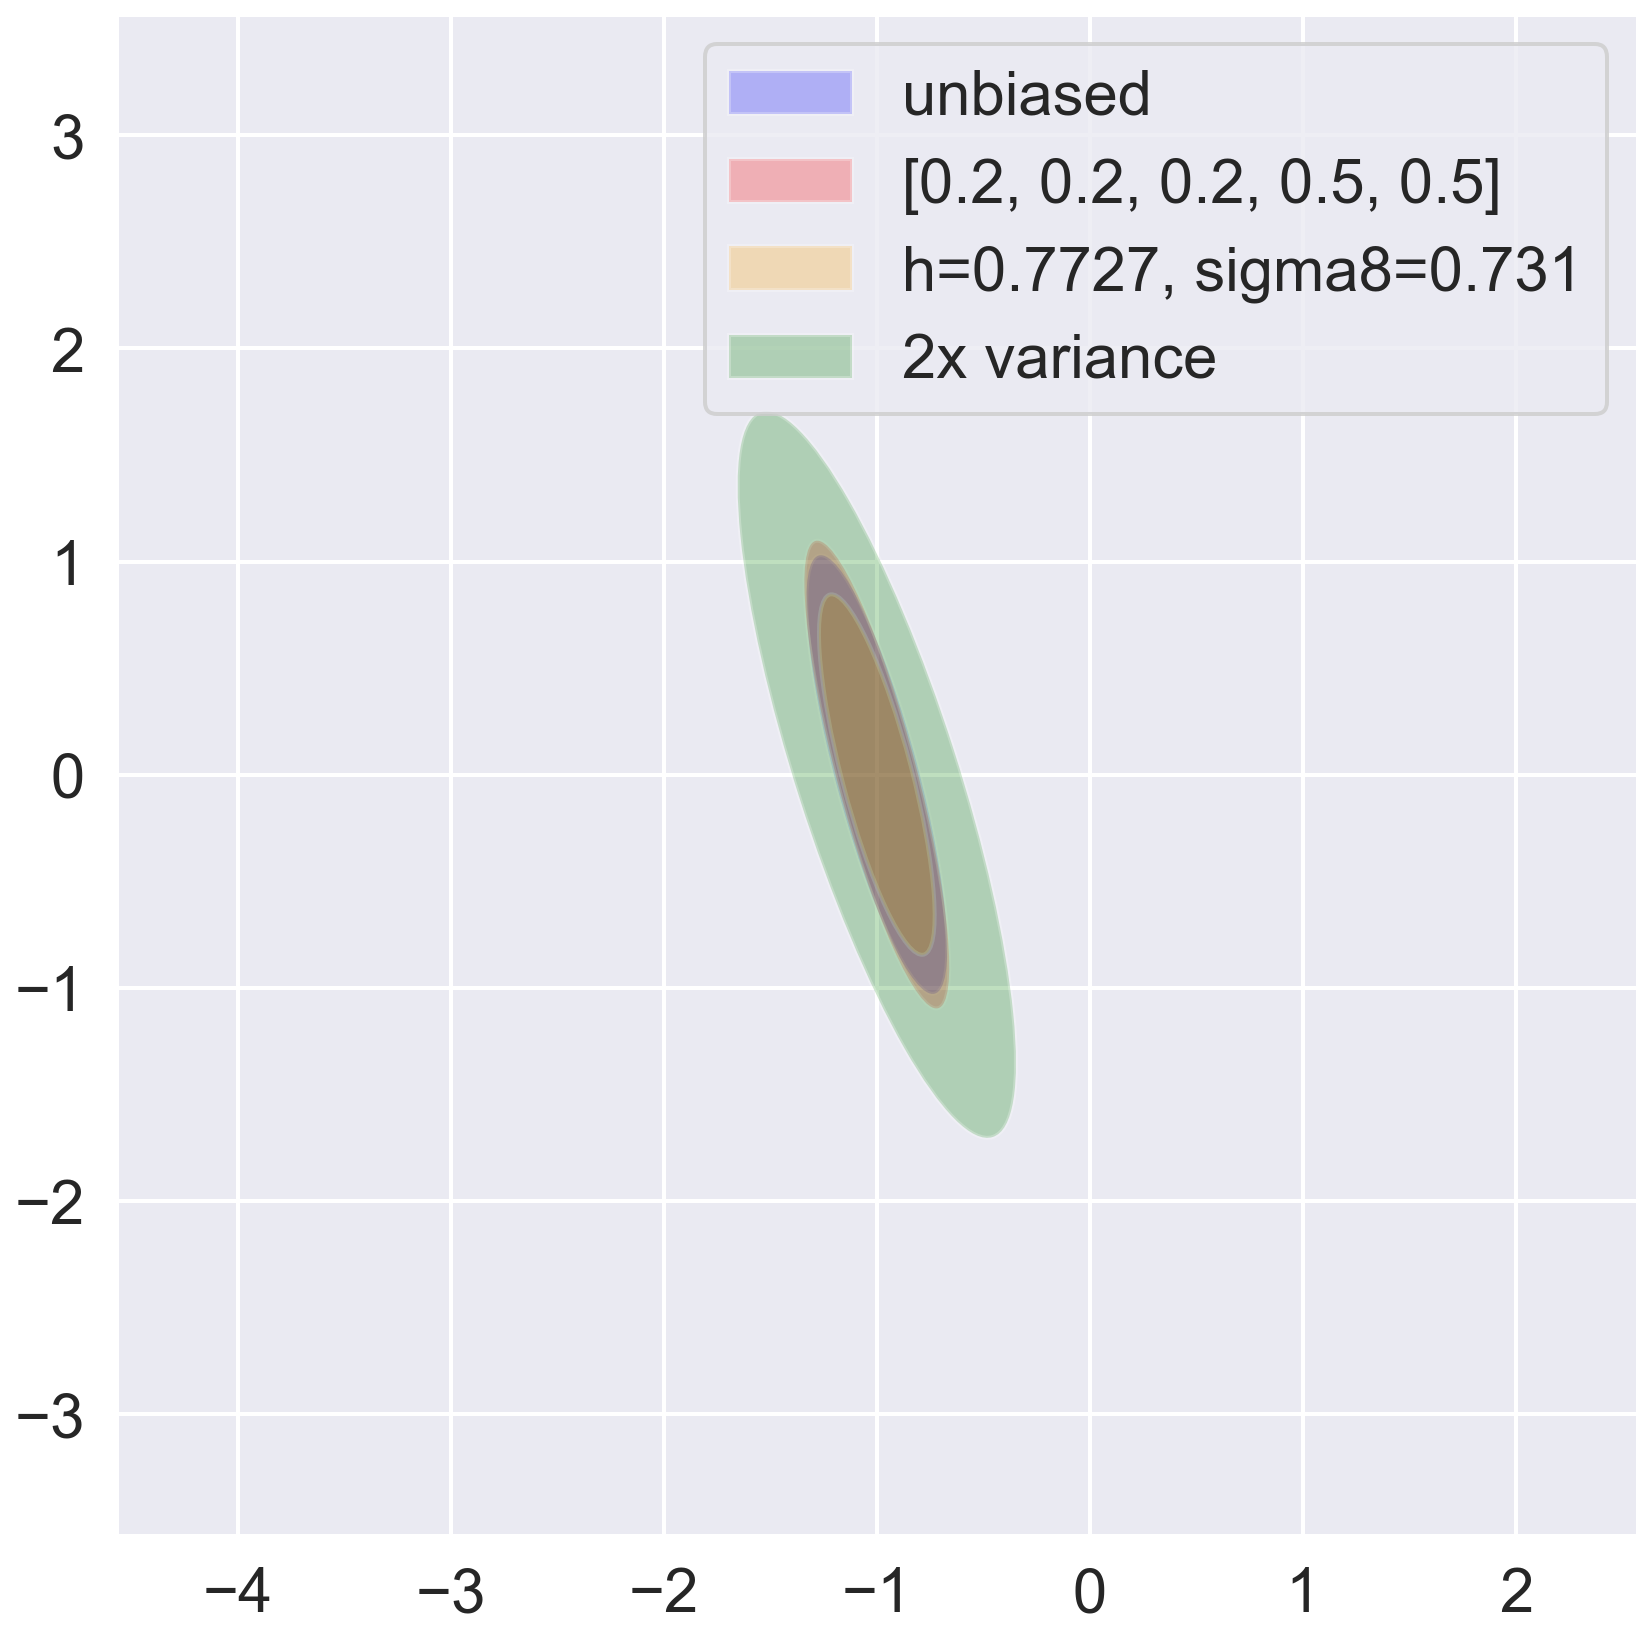

<Figure size 1368x1008 with 0 Axes>

In [40]:
colors = ['blue', 'red', 'orange', 'green']
for params in [['omega_m', 'sigma_8'],
               ['w_0', 'w_a']]:
    labels = ['unbiased', f'{biases}', 'h=0.7727, sigma8=0.731', '2x variance']
    #biases = [para_bias[params[0]], para_bias[params[1]]]
    fid = (unbiased.vals[params[0]], unbiased.vals[params[1]])
    es = []
    for i, matrix in enumerate([unbiased.fisher, biased.fisher, wrong_hsigma8.fisher, highvar.fisher]):
        #if i==1:
        #    print('changing fid')
        #    fid = (fid[0]+biases[0], fid[1]+biases[1])
        e, (xlim, ylim) = plot_contours(marginalize(matrix, unbiased.param_order.index(params[0]), unbiased.param_order.index(params[1])),
                          sigmas=2,
                          fid=fid)
        e.set_facecolor(colors[i])
        e.set_label(labels[i])
        e.set_alpha(0.25)
        es.append(e)
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

    for i, e in enumerate(es):
        ax.add_artist(e)

    plt.xlim((xlim))
    plt.ylim((ylim))
    plt.legend(handles=es)
    #plt.xlabel(param_labels[param_order.index(params[0])])
    #plt.ylabel(param_labels[param_order.index(params[1])])
    plt.figure()



<AxesSubplot:xlabel='ell', ylabel='C_ell'>

Text(0, 0.5, 'highvar C_ell ratio')

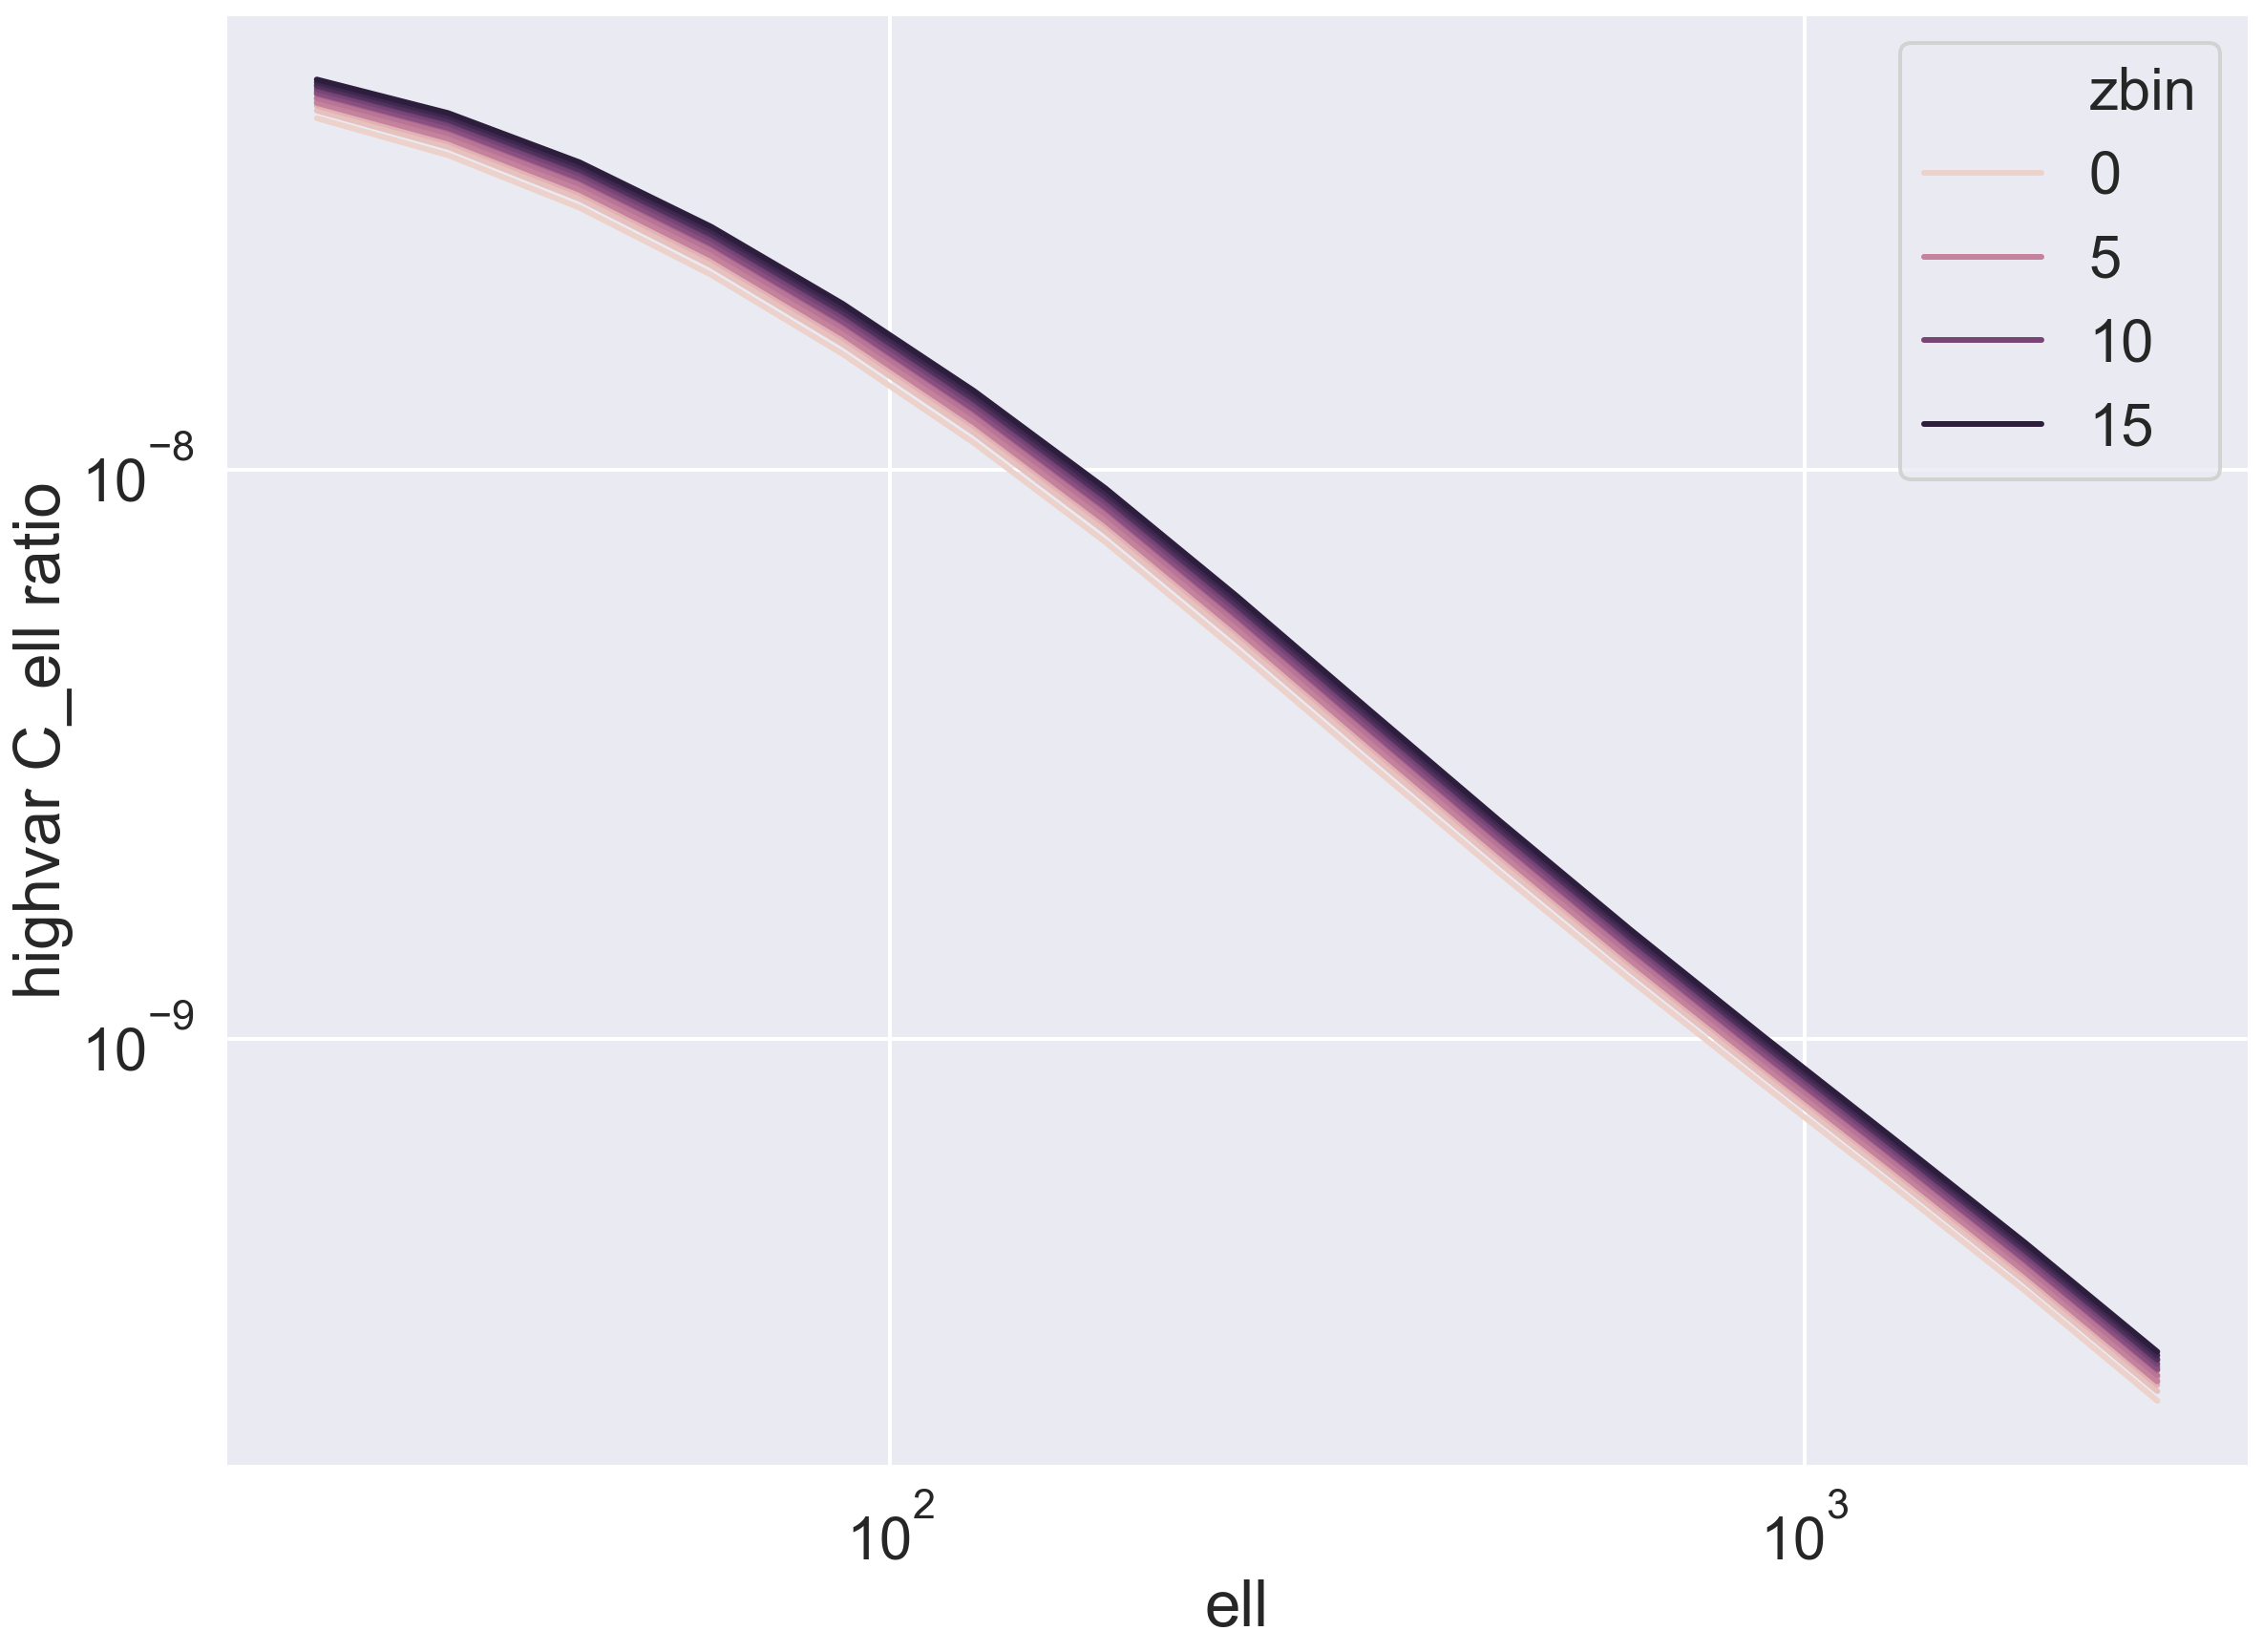

In [44]:
sns.lineplot(x=unbiased.ccl_cls['ell'], y=highvar.ccl_cls['C_ell'], hue=unbiased.ccl_cls['zbin'])
#plt.yscale('log')
#plt.ylim((1e-12, 1e-7))

plt.xscale('log')
plt.yscale('log')
plt.ylabel('highvar C_ell ratio')

<AxesSubplot:xlabel='ell', ylabel='C_ell'>

Text(0, 0.5, 'wrongcosmo/unbiased C_ell ratio')

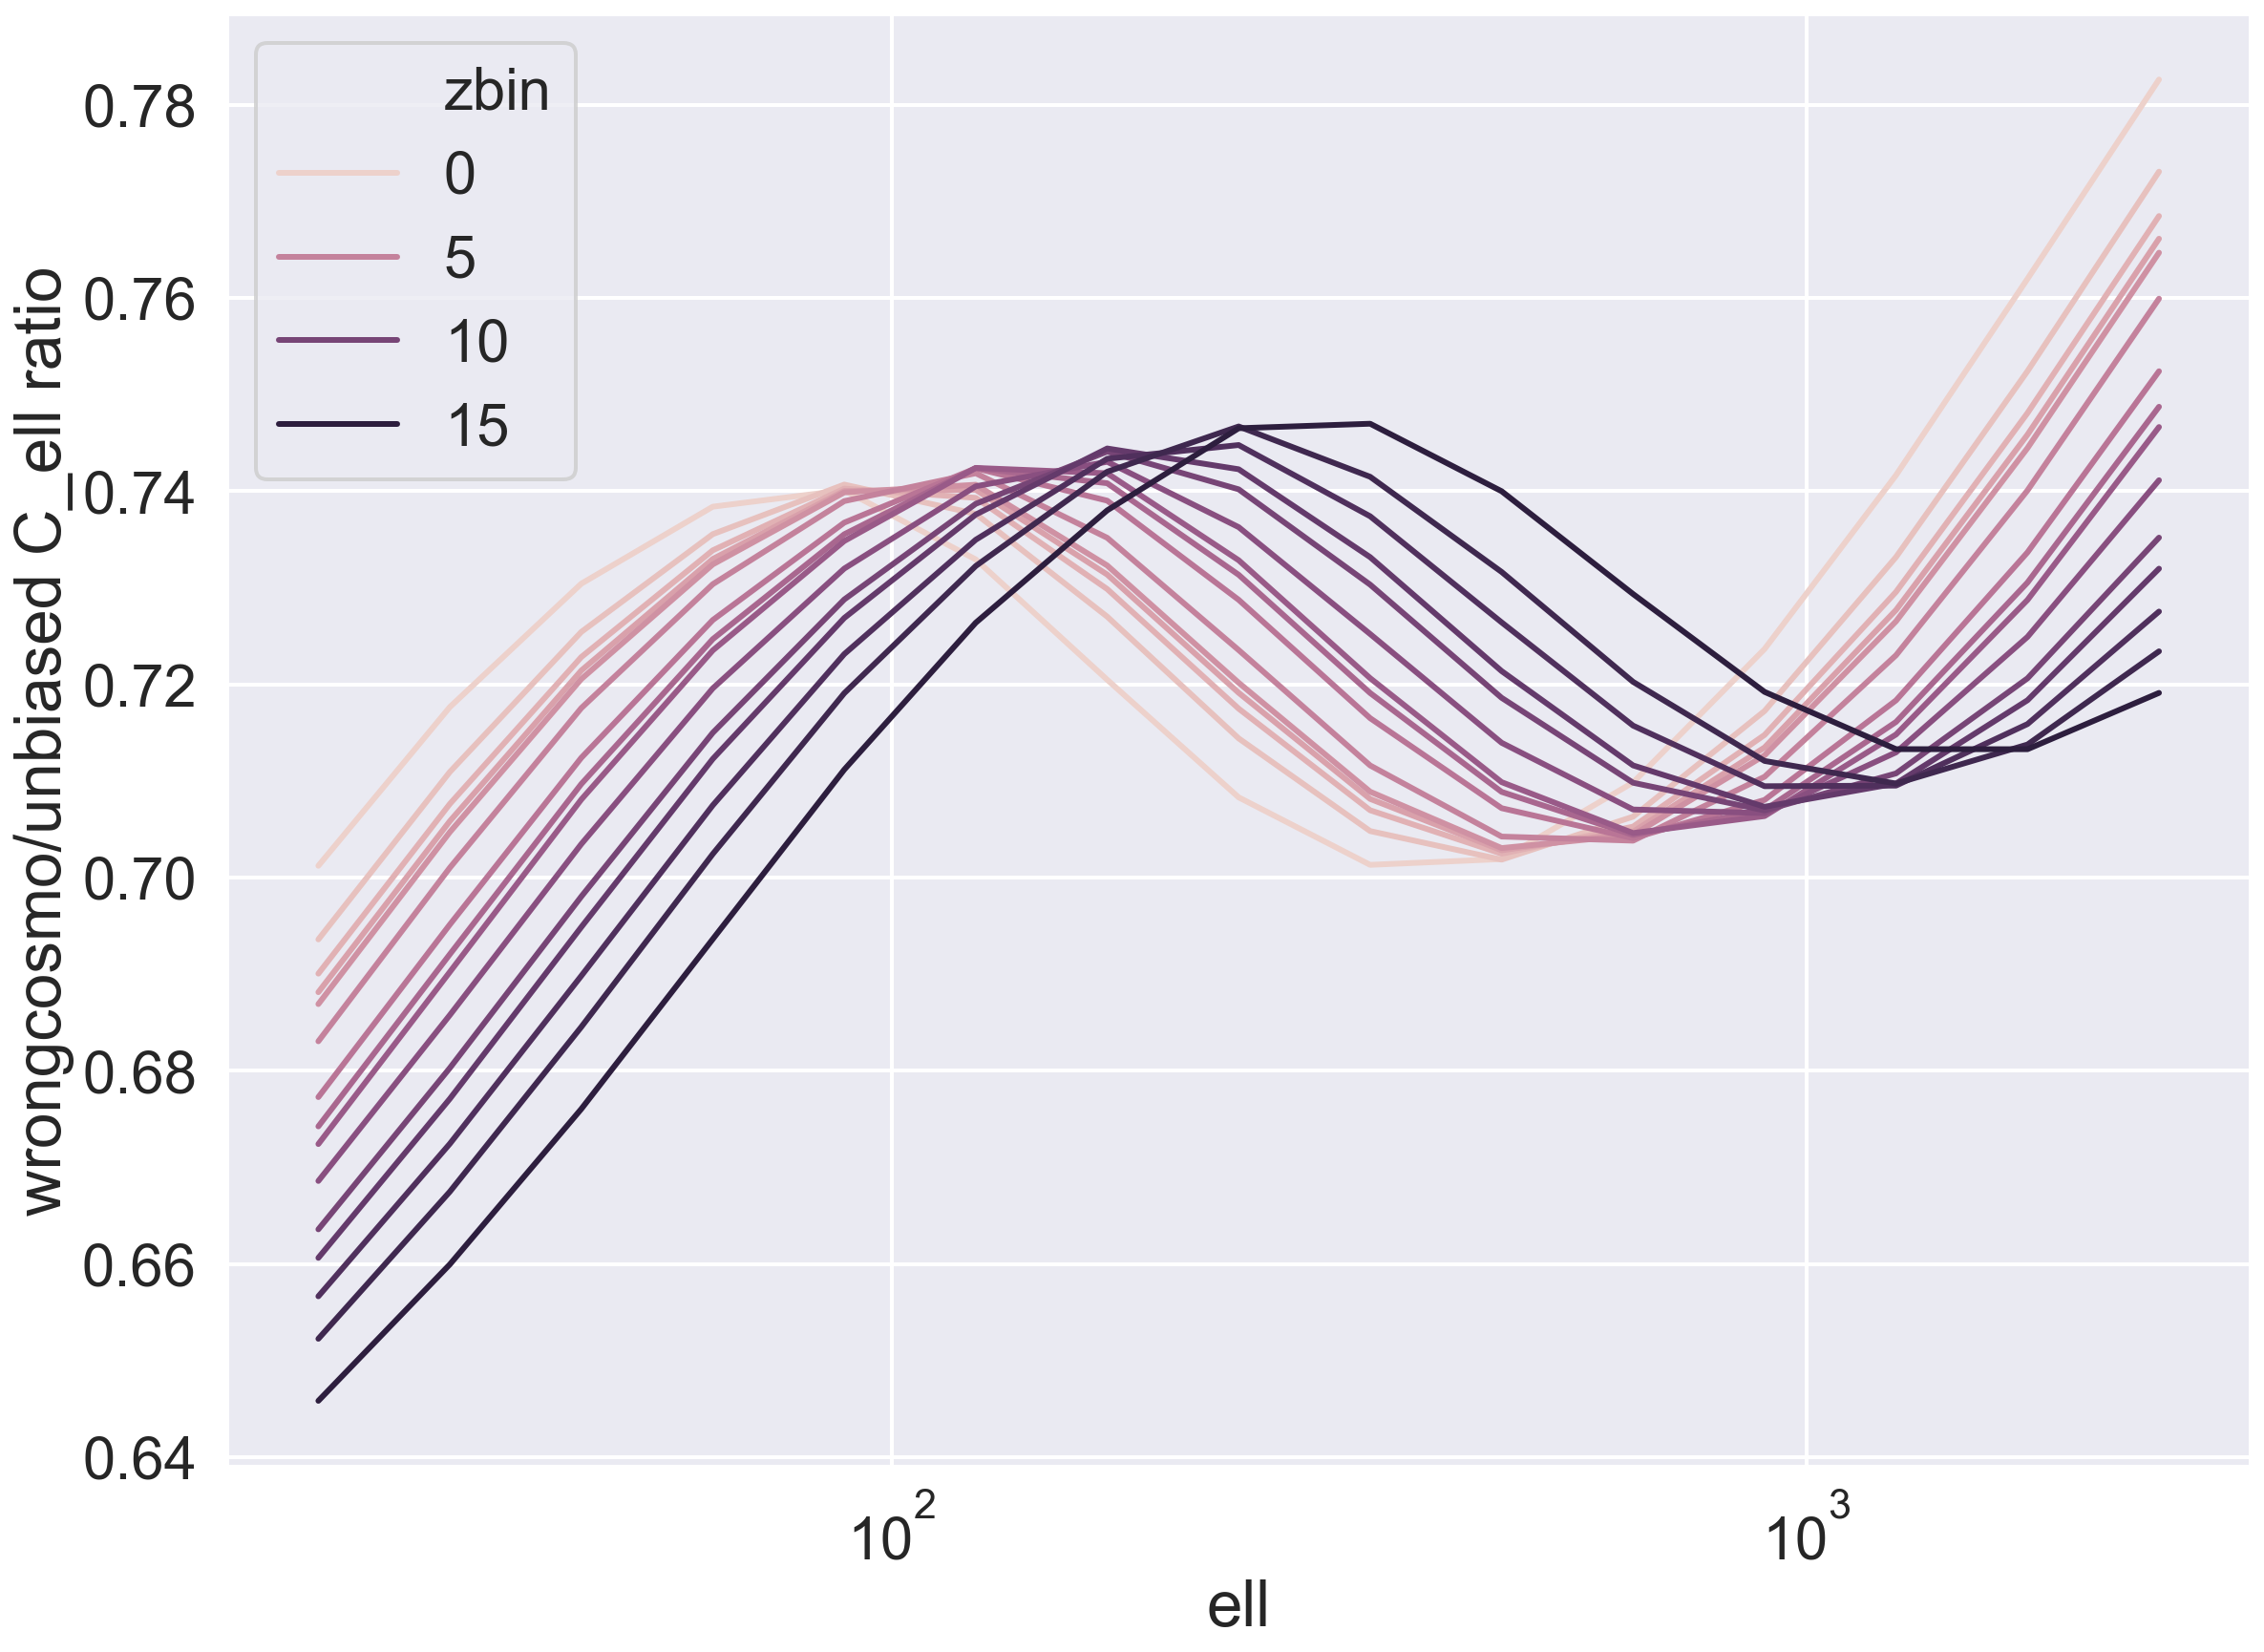

In [46]:
sns.lineplot(x=unbiased.ccl_cls['ell'], y=wrong_hsigma8.ccl_cls['C_ell']/unbiased.ccl_cls['C_ell'], hue=unbiased.ccl_cls['zbin'])
#plt.yscale('log')
#plt.ylim((1e-12, 1e-7))

plt.xscale('log')
plt.ylabel('wrongcosmo/unbiased C_ell ratio')

<AxesSubplot:xlabel='ell', ylabel='C_ell'>

Text(0, 0.5, 'biased/unbiased C_ell ratio')

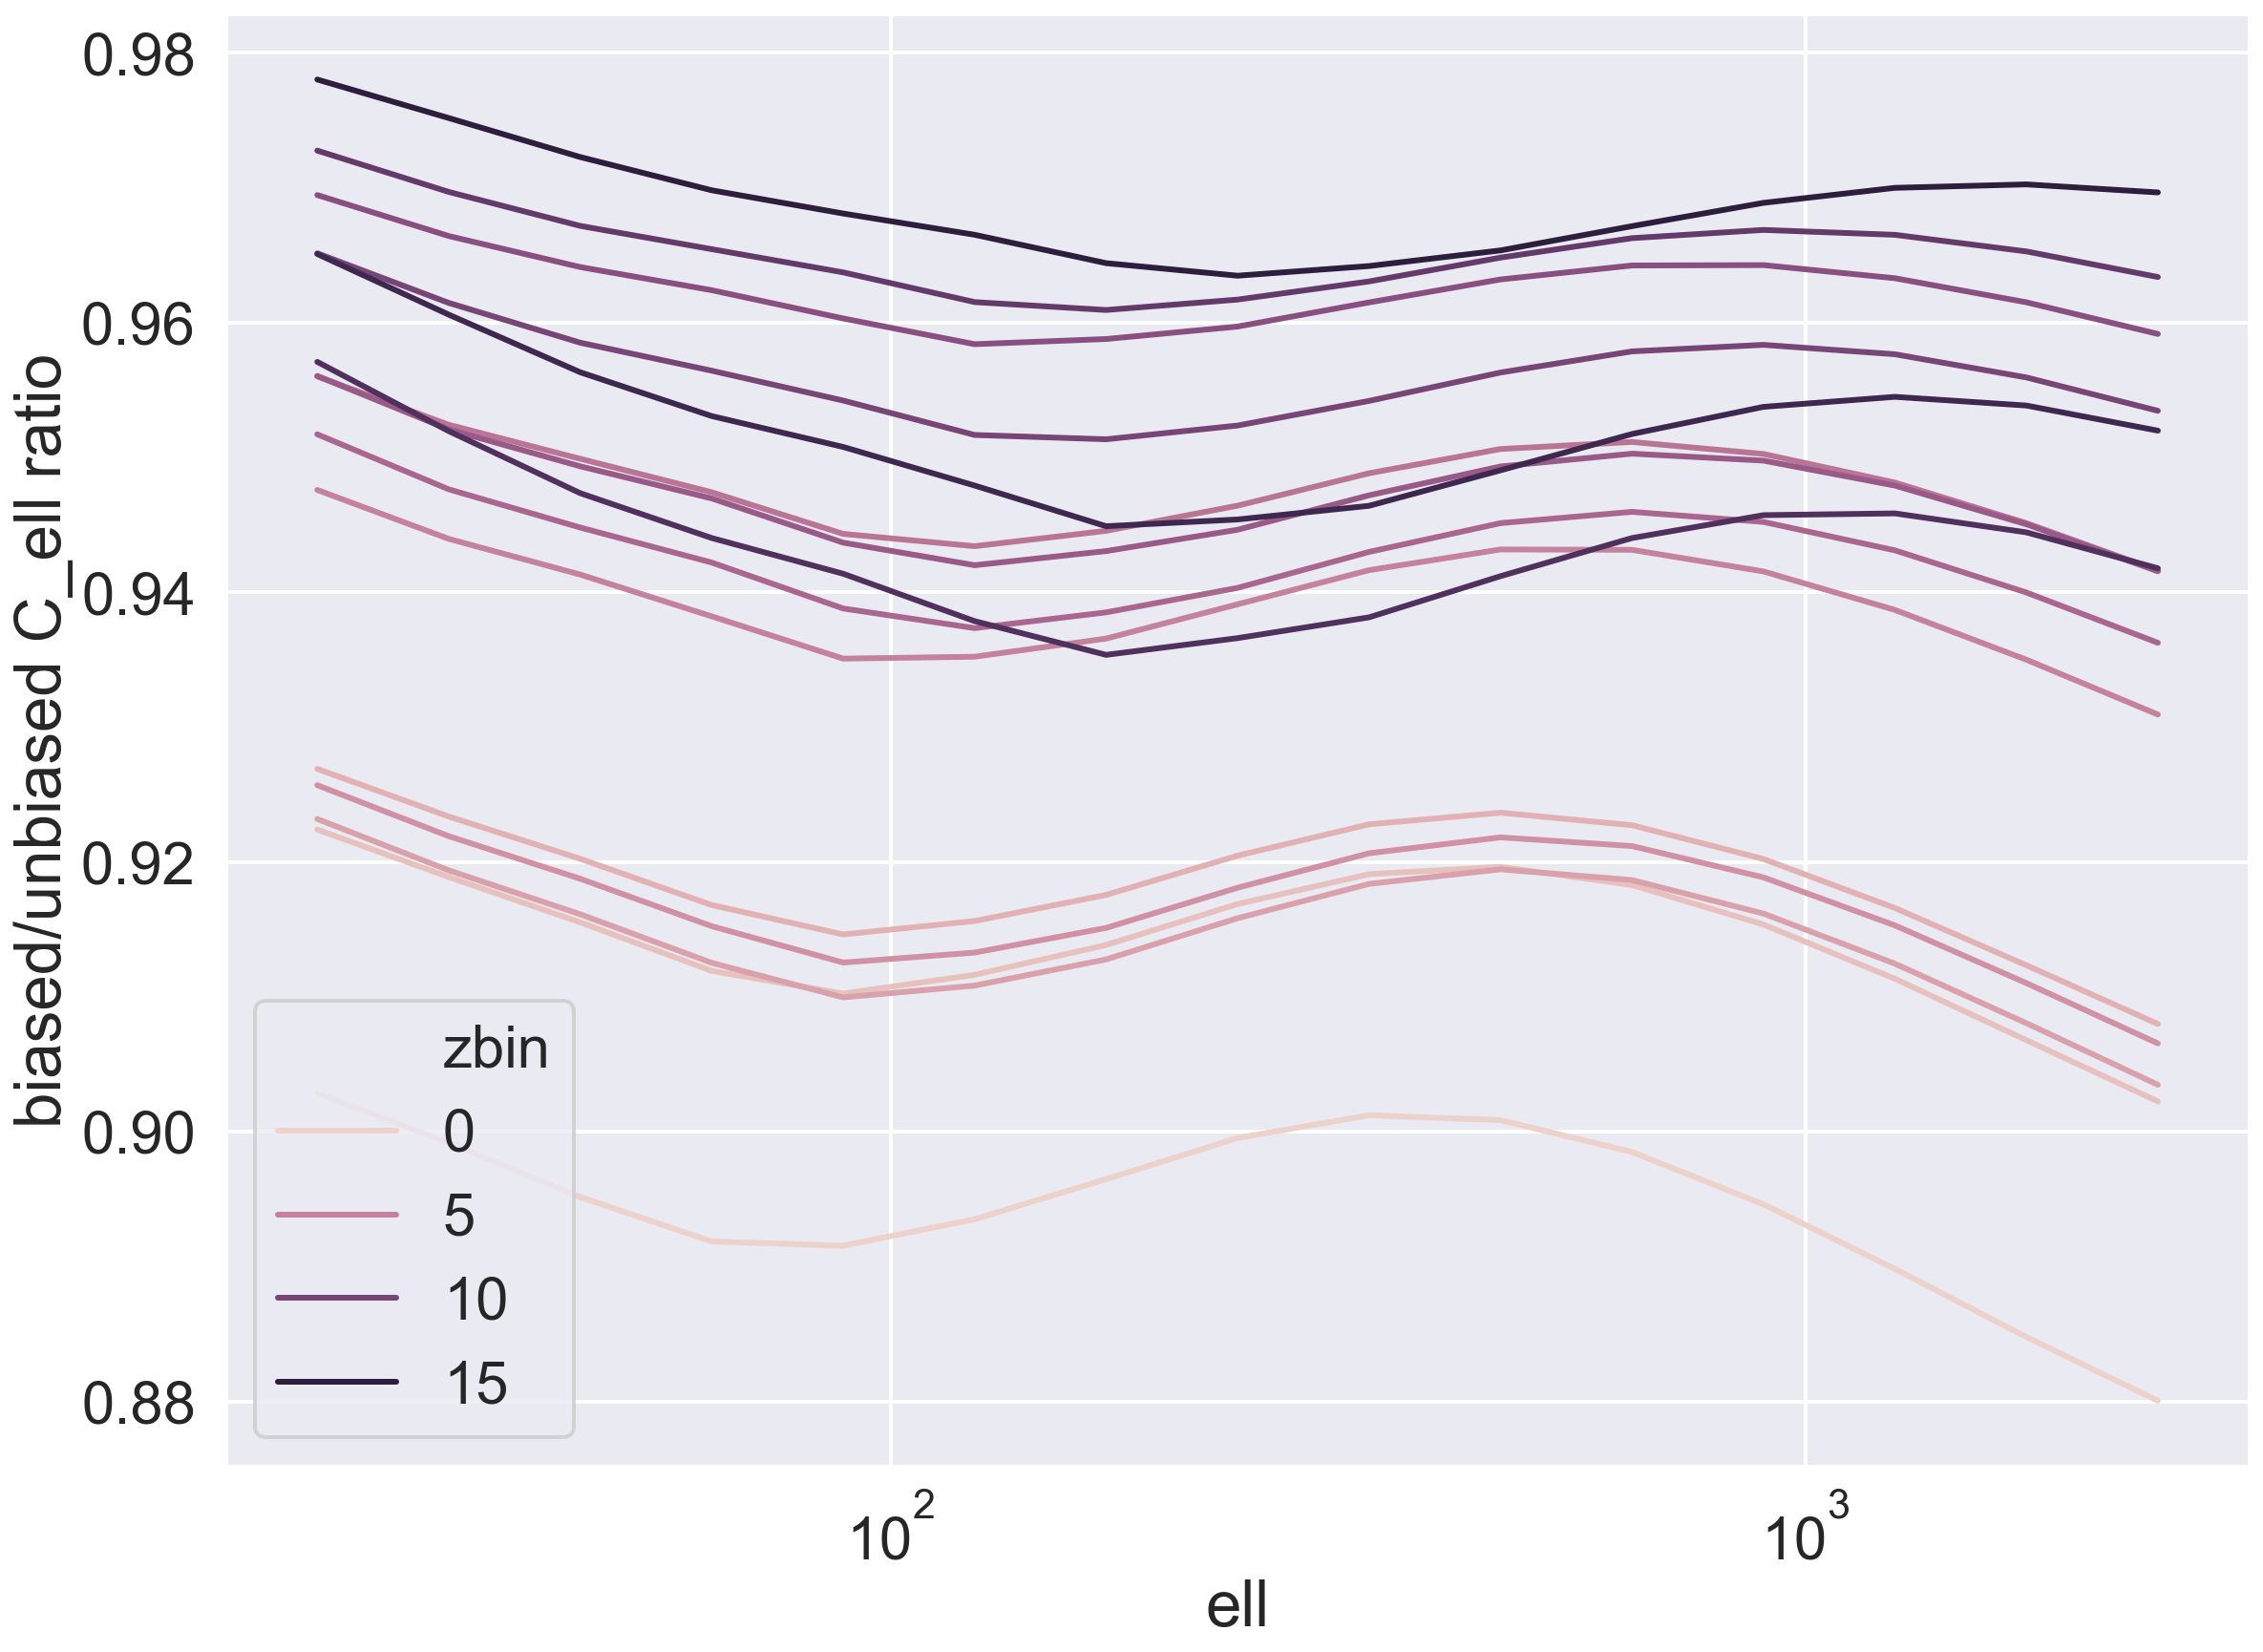

In [45]:
sns.lineplot(x=unbiased.ccl_cls['ell'], y=biased.ccl_cls['C_ell']/unbiased.ccl_cls['C_ell'], hue=unbiased.ccl_cls['zbin'])
#plt.yscale('log')
#plt.ylim((1e-12, 1e-7))

plt.xscale('log')
plt.ylabel('biased/unbiased C_ell ratio')

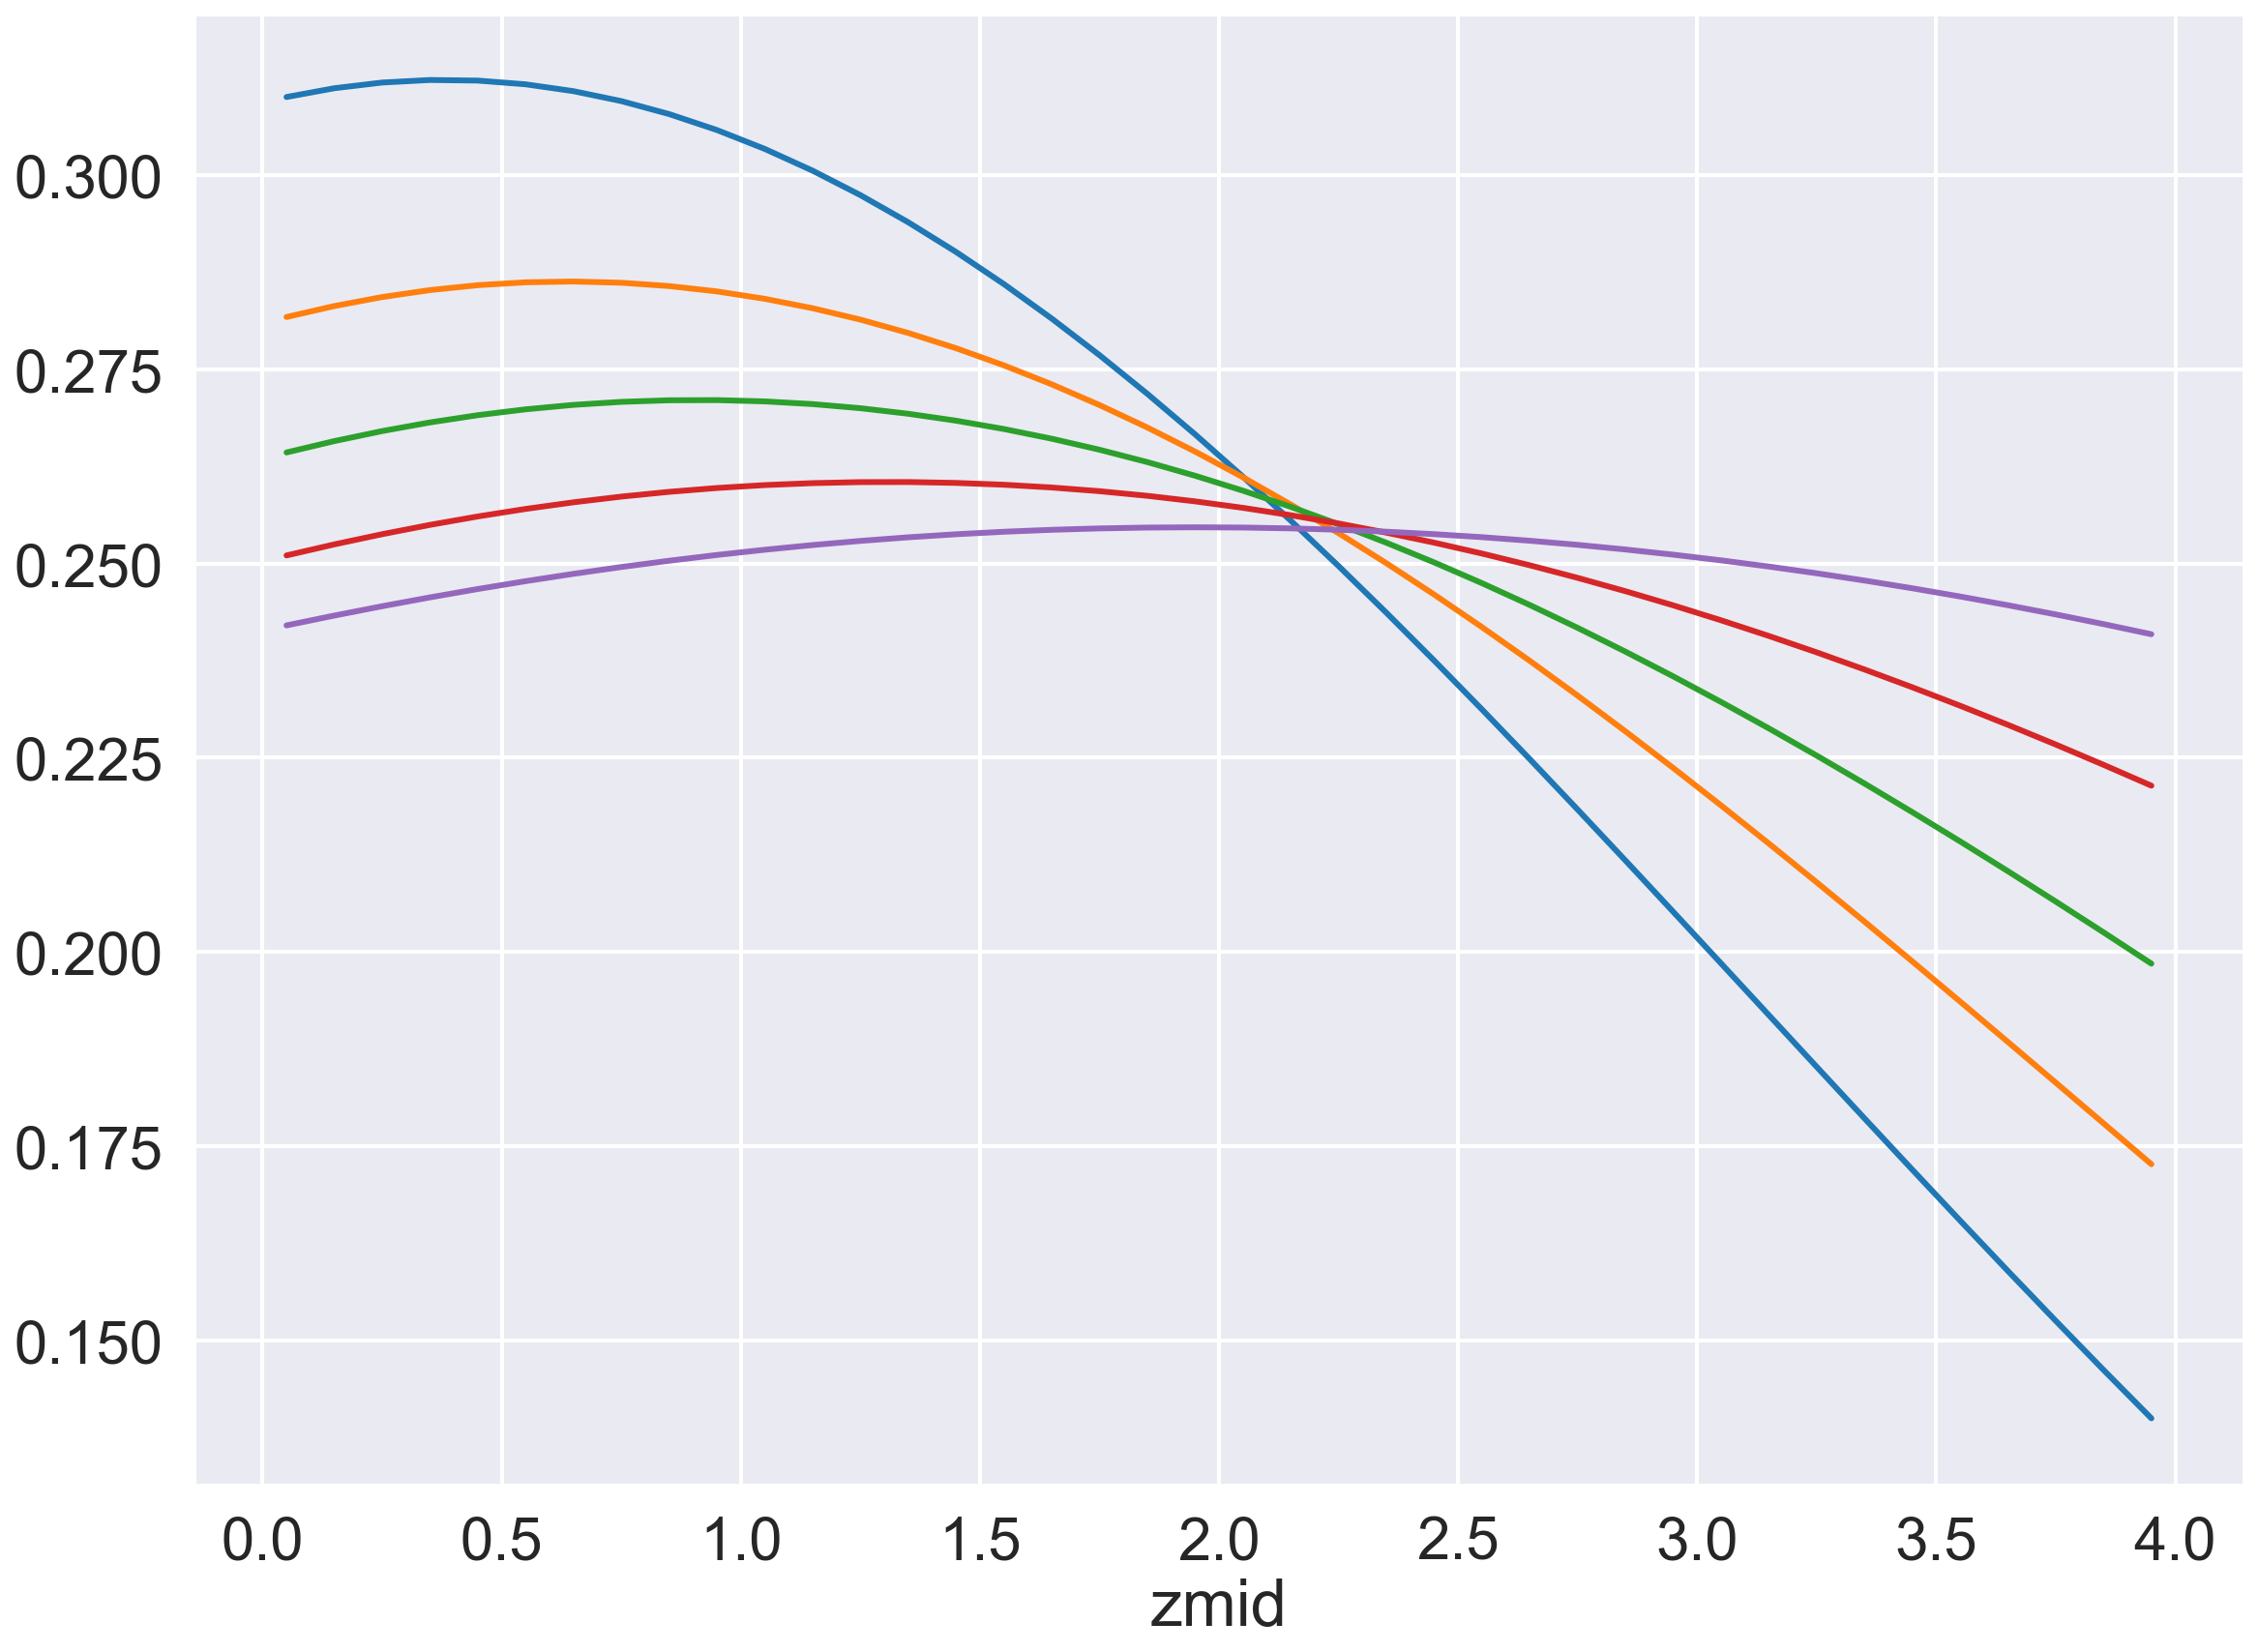

In [43]:
for key in unbiased.dNdz_dict_source.keys():
    _ = sns.lineplot(x=highvar.zmid, y=highvar.dNdz_dict_source[key], markers=False);




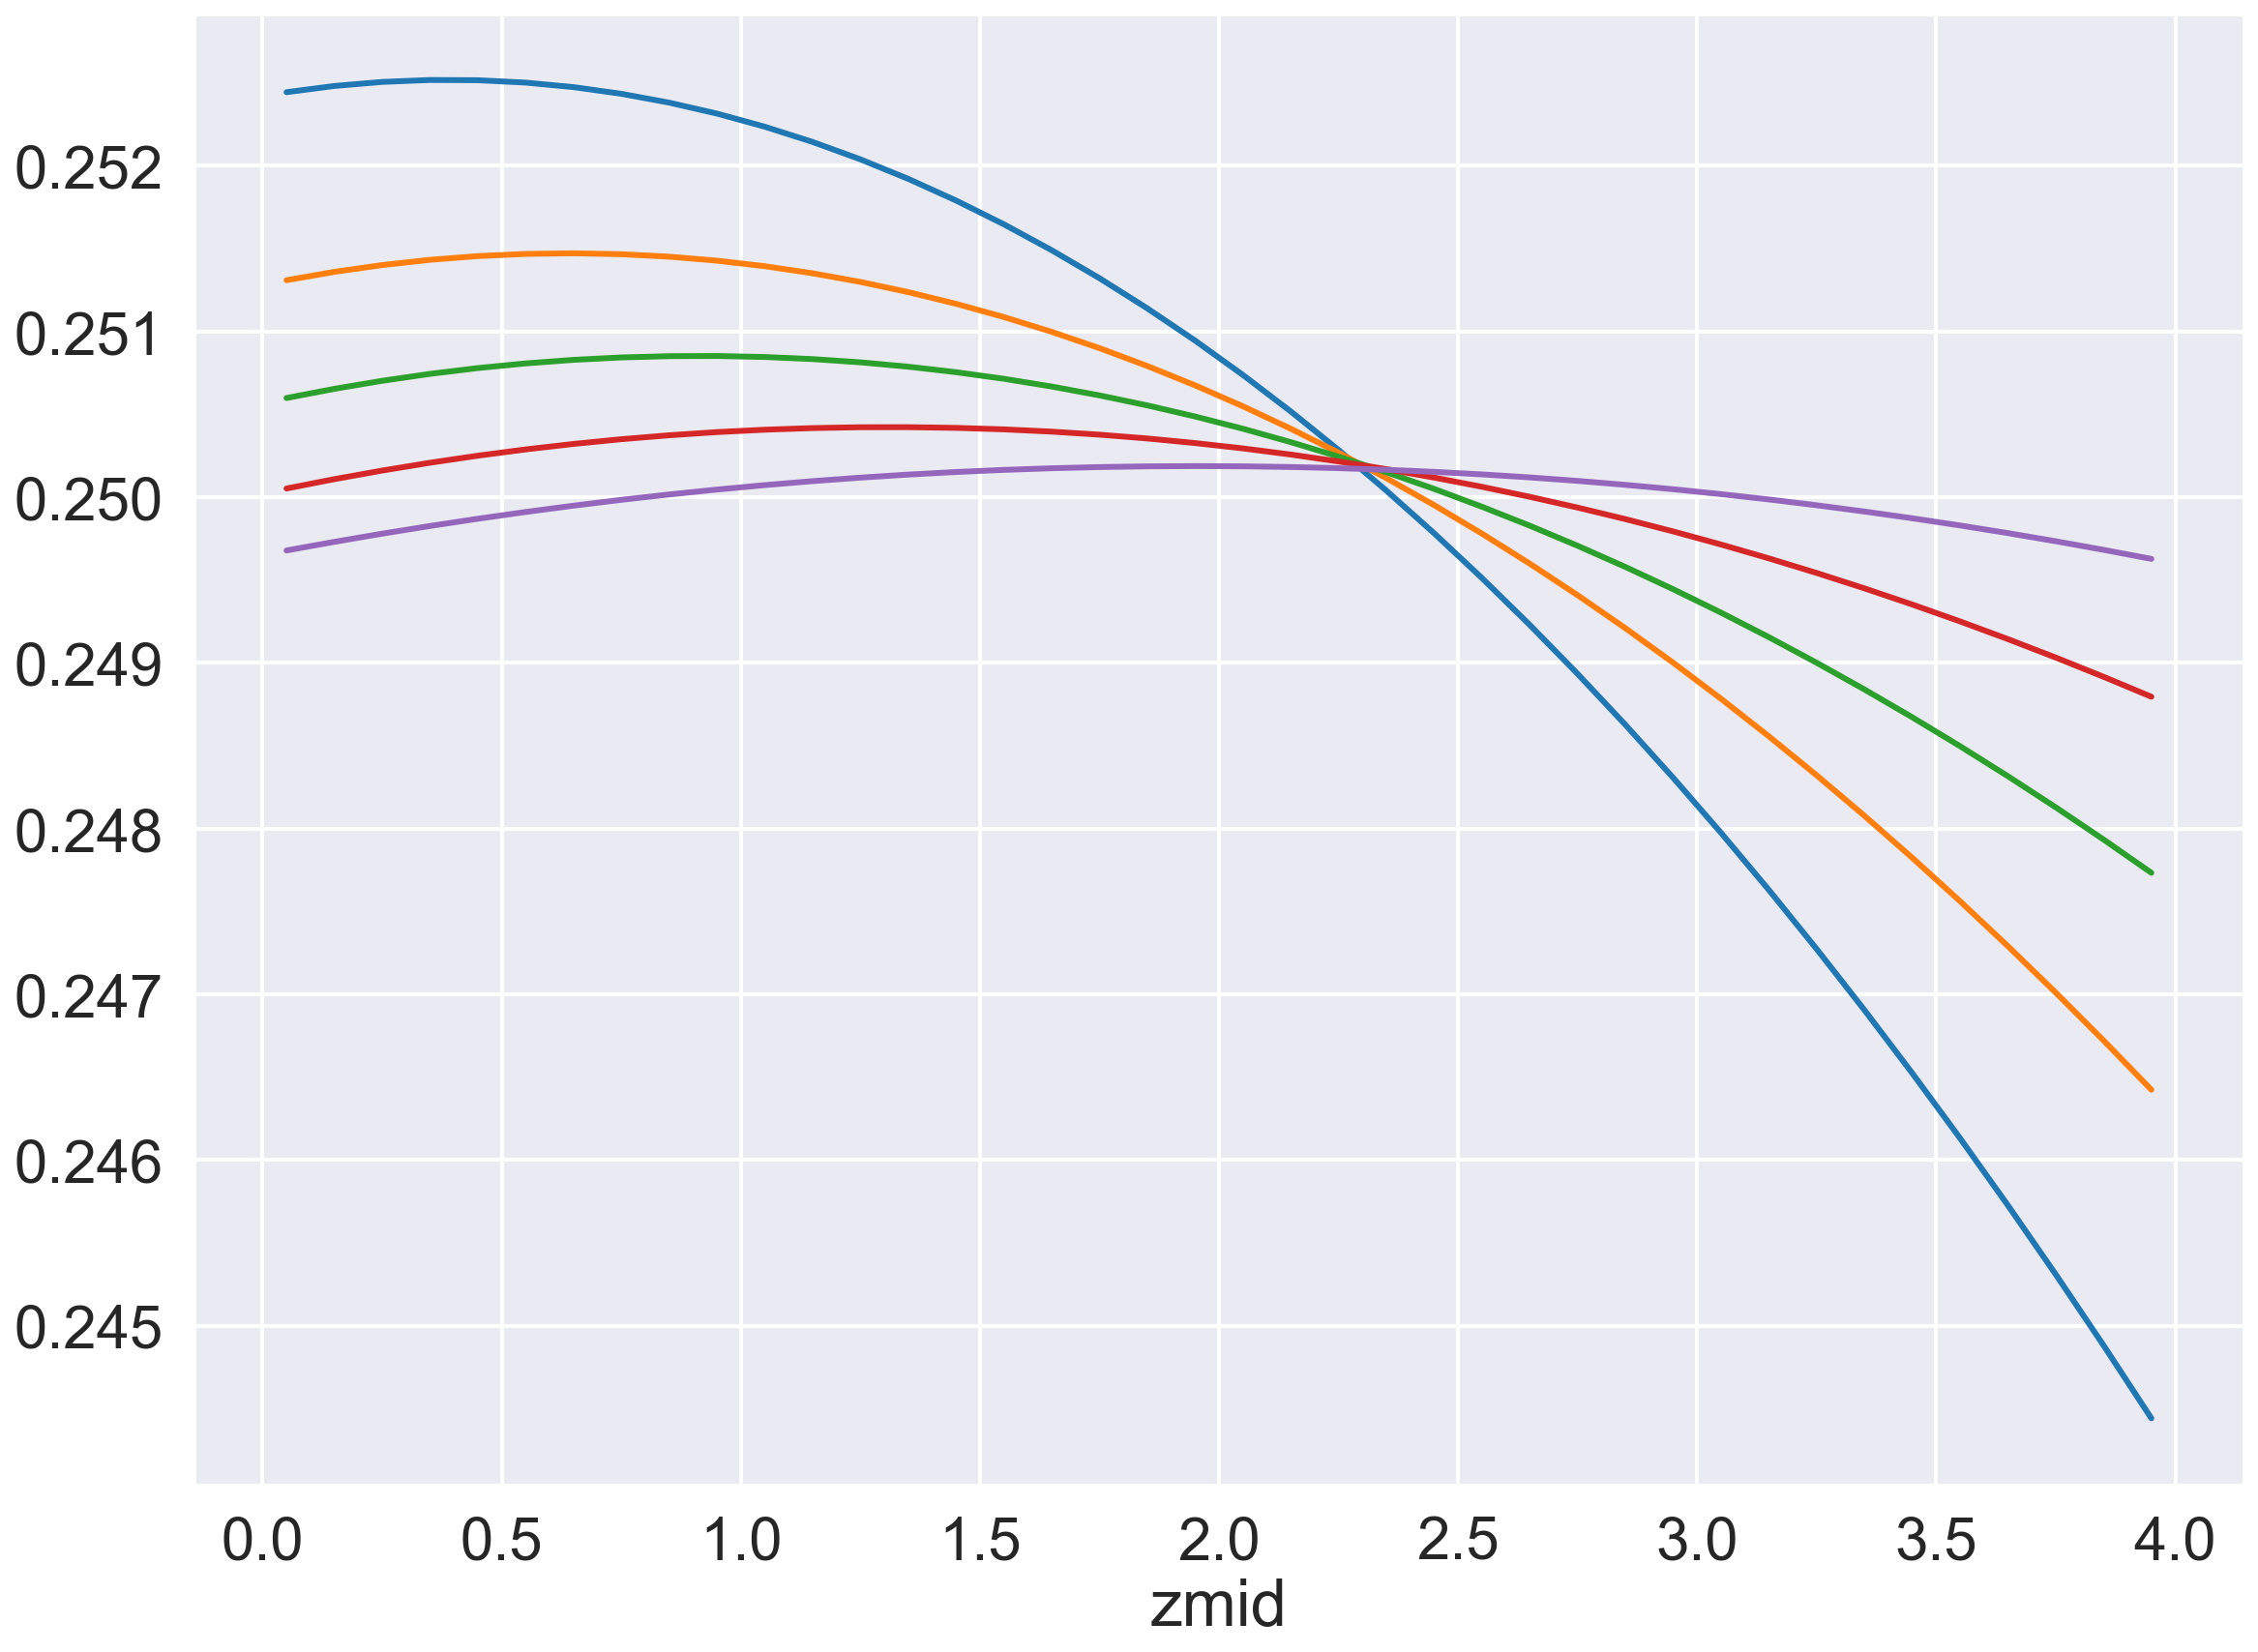

In [256]:
for key in highvar.dNdz_dict_source.keys():
    _ = sns.lineplot(x=zmid, y=highvar.dNdz_dict_source[key], markers=False);


In [32]:
# getting the n(z) distribution from the LSSTDESC/Requirements github repo for Y10 and i+r bands. 
# only using this for source galaxy binning.

df = pd.read_csv('nzdist.txt', sep=' ') 


In [33]:
zmid = df['zmid']
dneff = df['dneff']

In [34]:
z = [0]+list(zmid)

In [8]:
datapts = ([list(np.ones(int(dneff[i]/min(dneff)))*zmid[i]) for i in range(len(zmid))])
datapts = list(chain.from_iterable(datapts)) # flatten
bins = datapts[0::int(len(datapts)/5)]
bin_centers = [.5*fsum([bins[i]+bins[i+1]]) for i in range(len(bins[:-1]))]

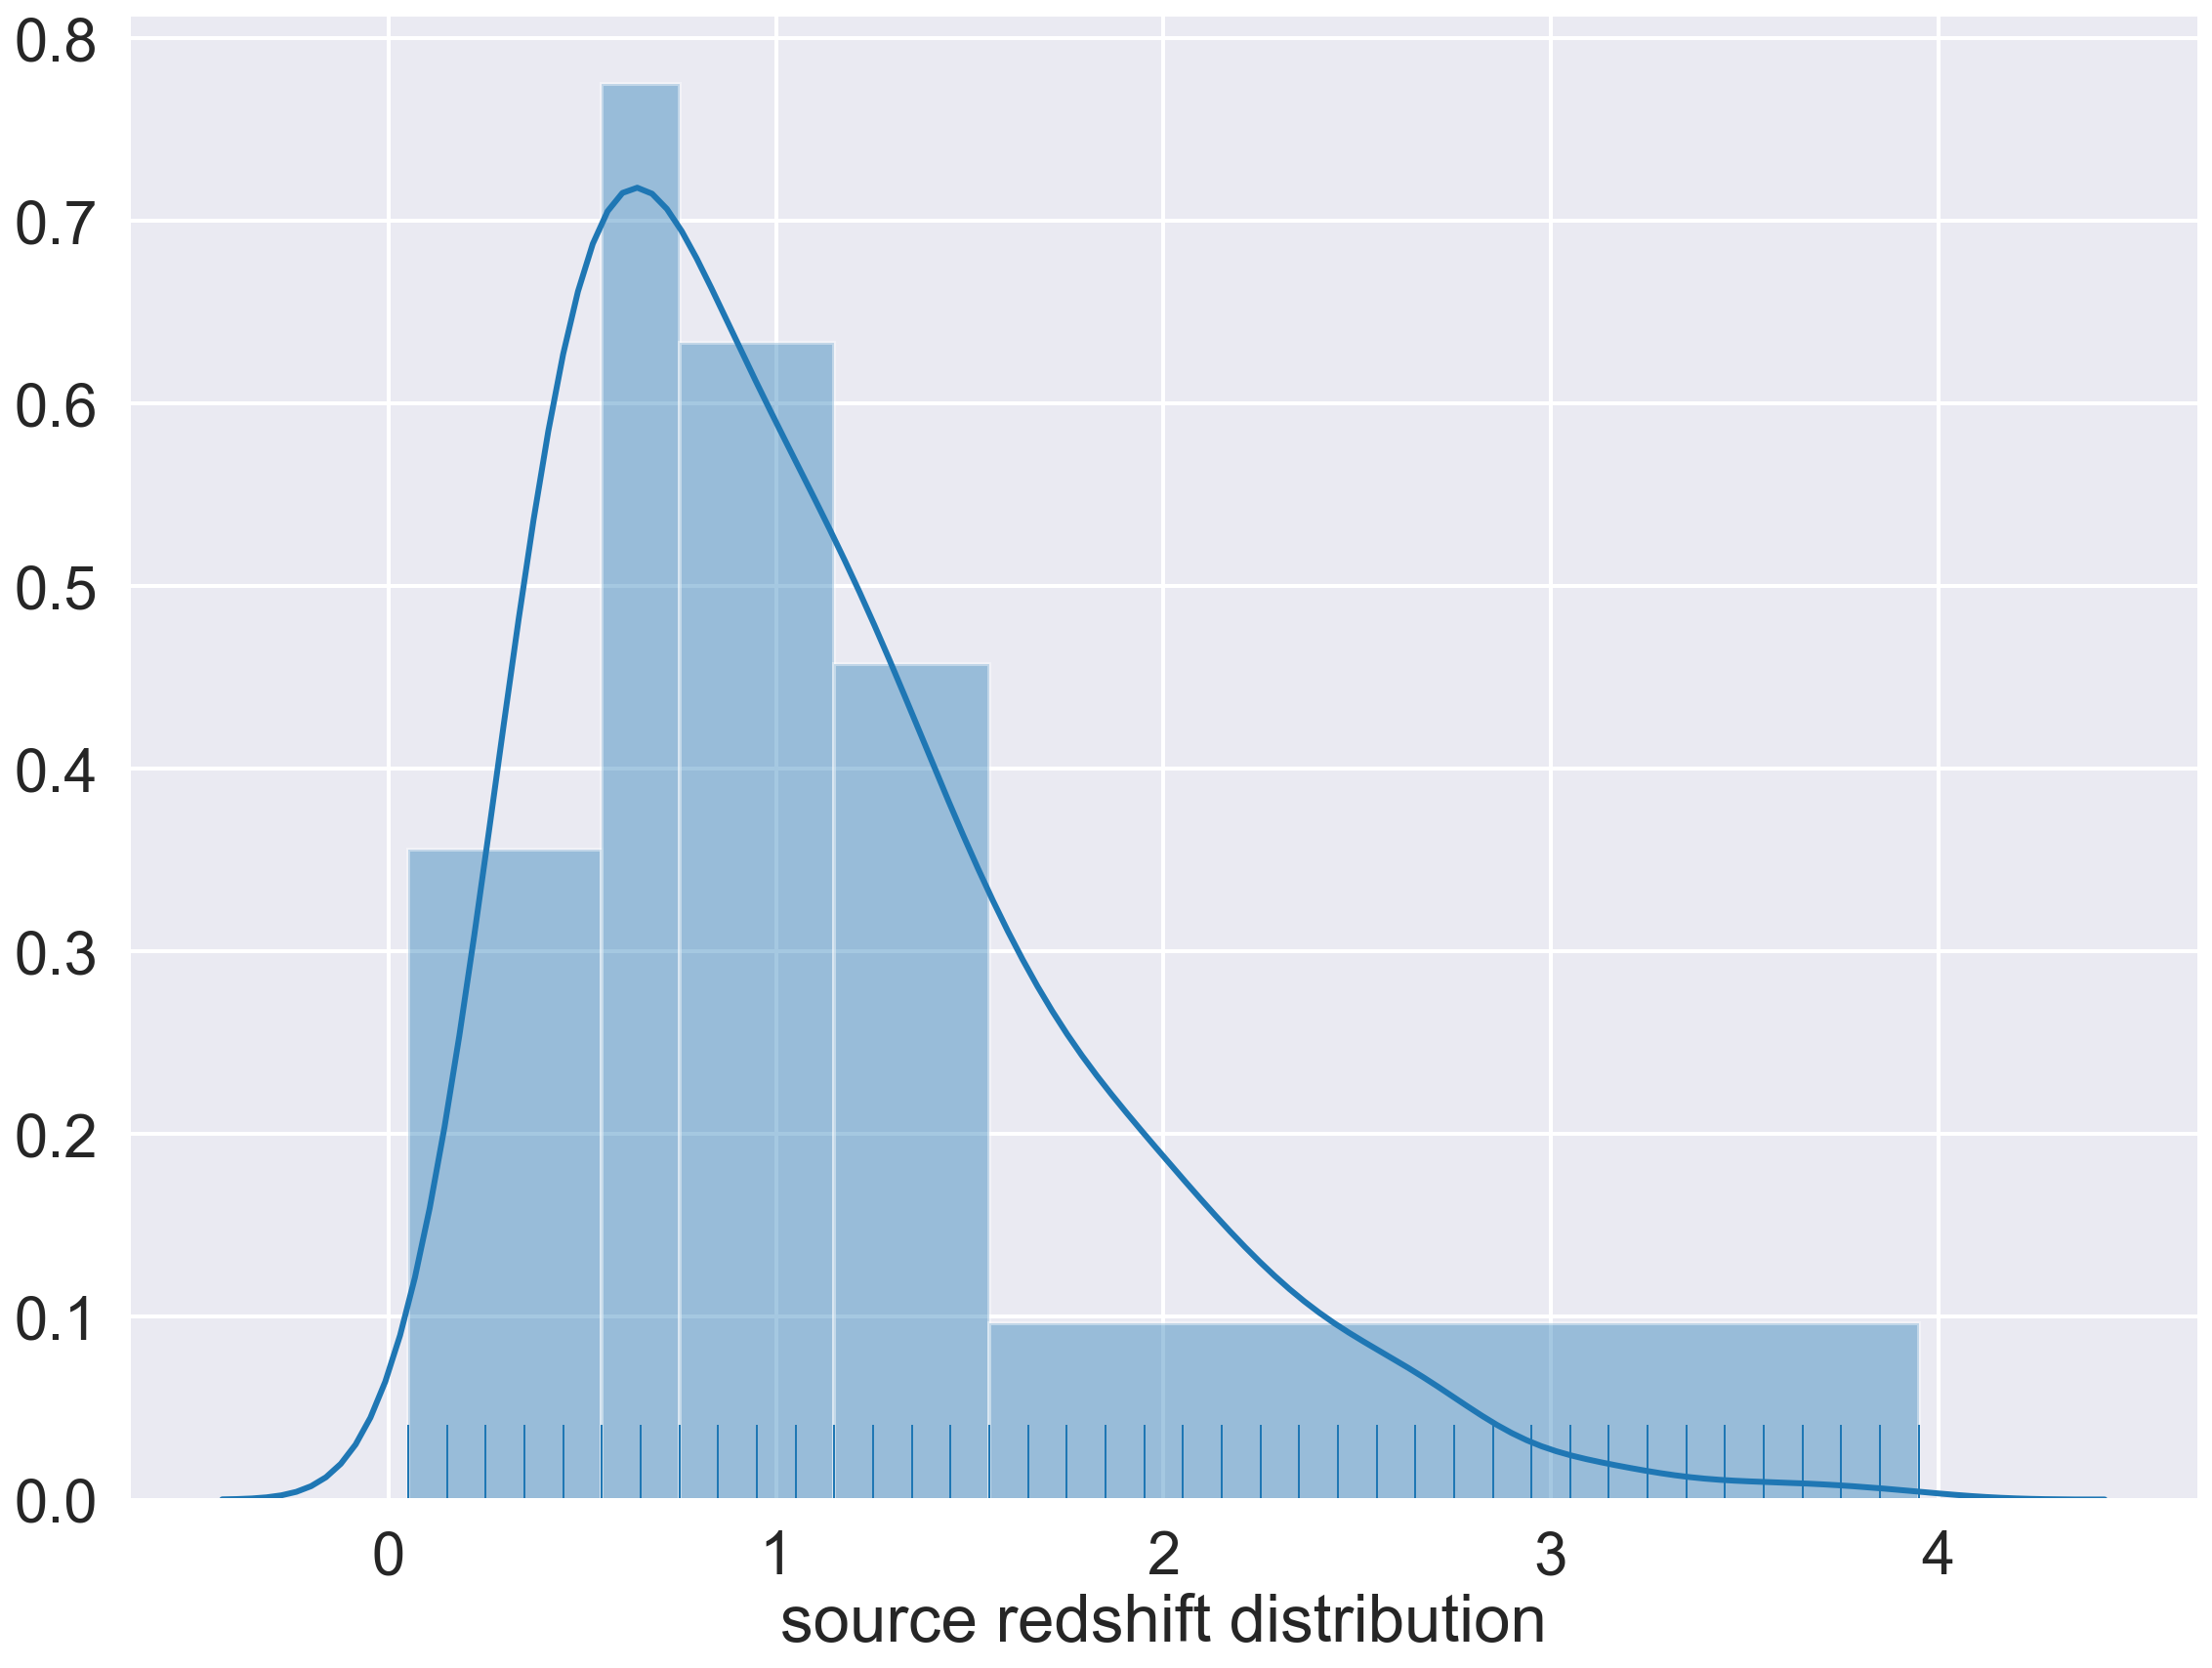

In [9]:
sns.distplot(datapts, bins=bins, rug=True);
plt.xlabel('source redshift distribution');

### Create source dN/dz distribution

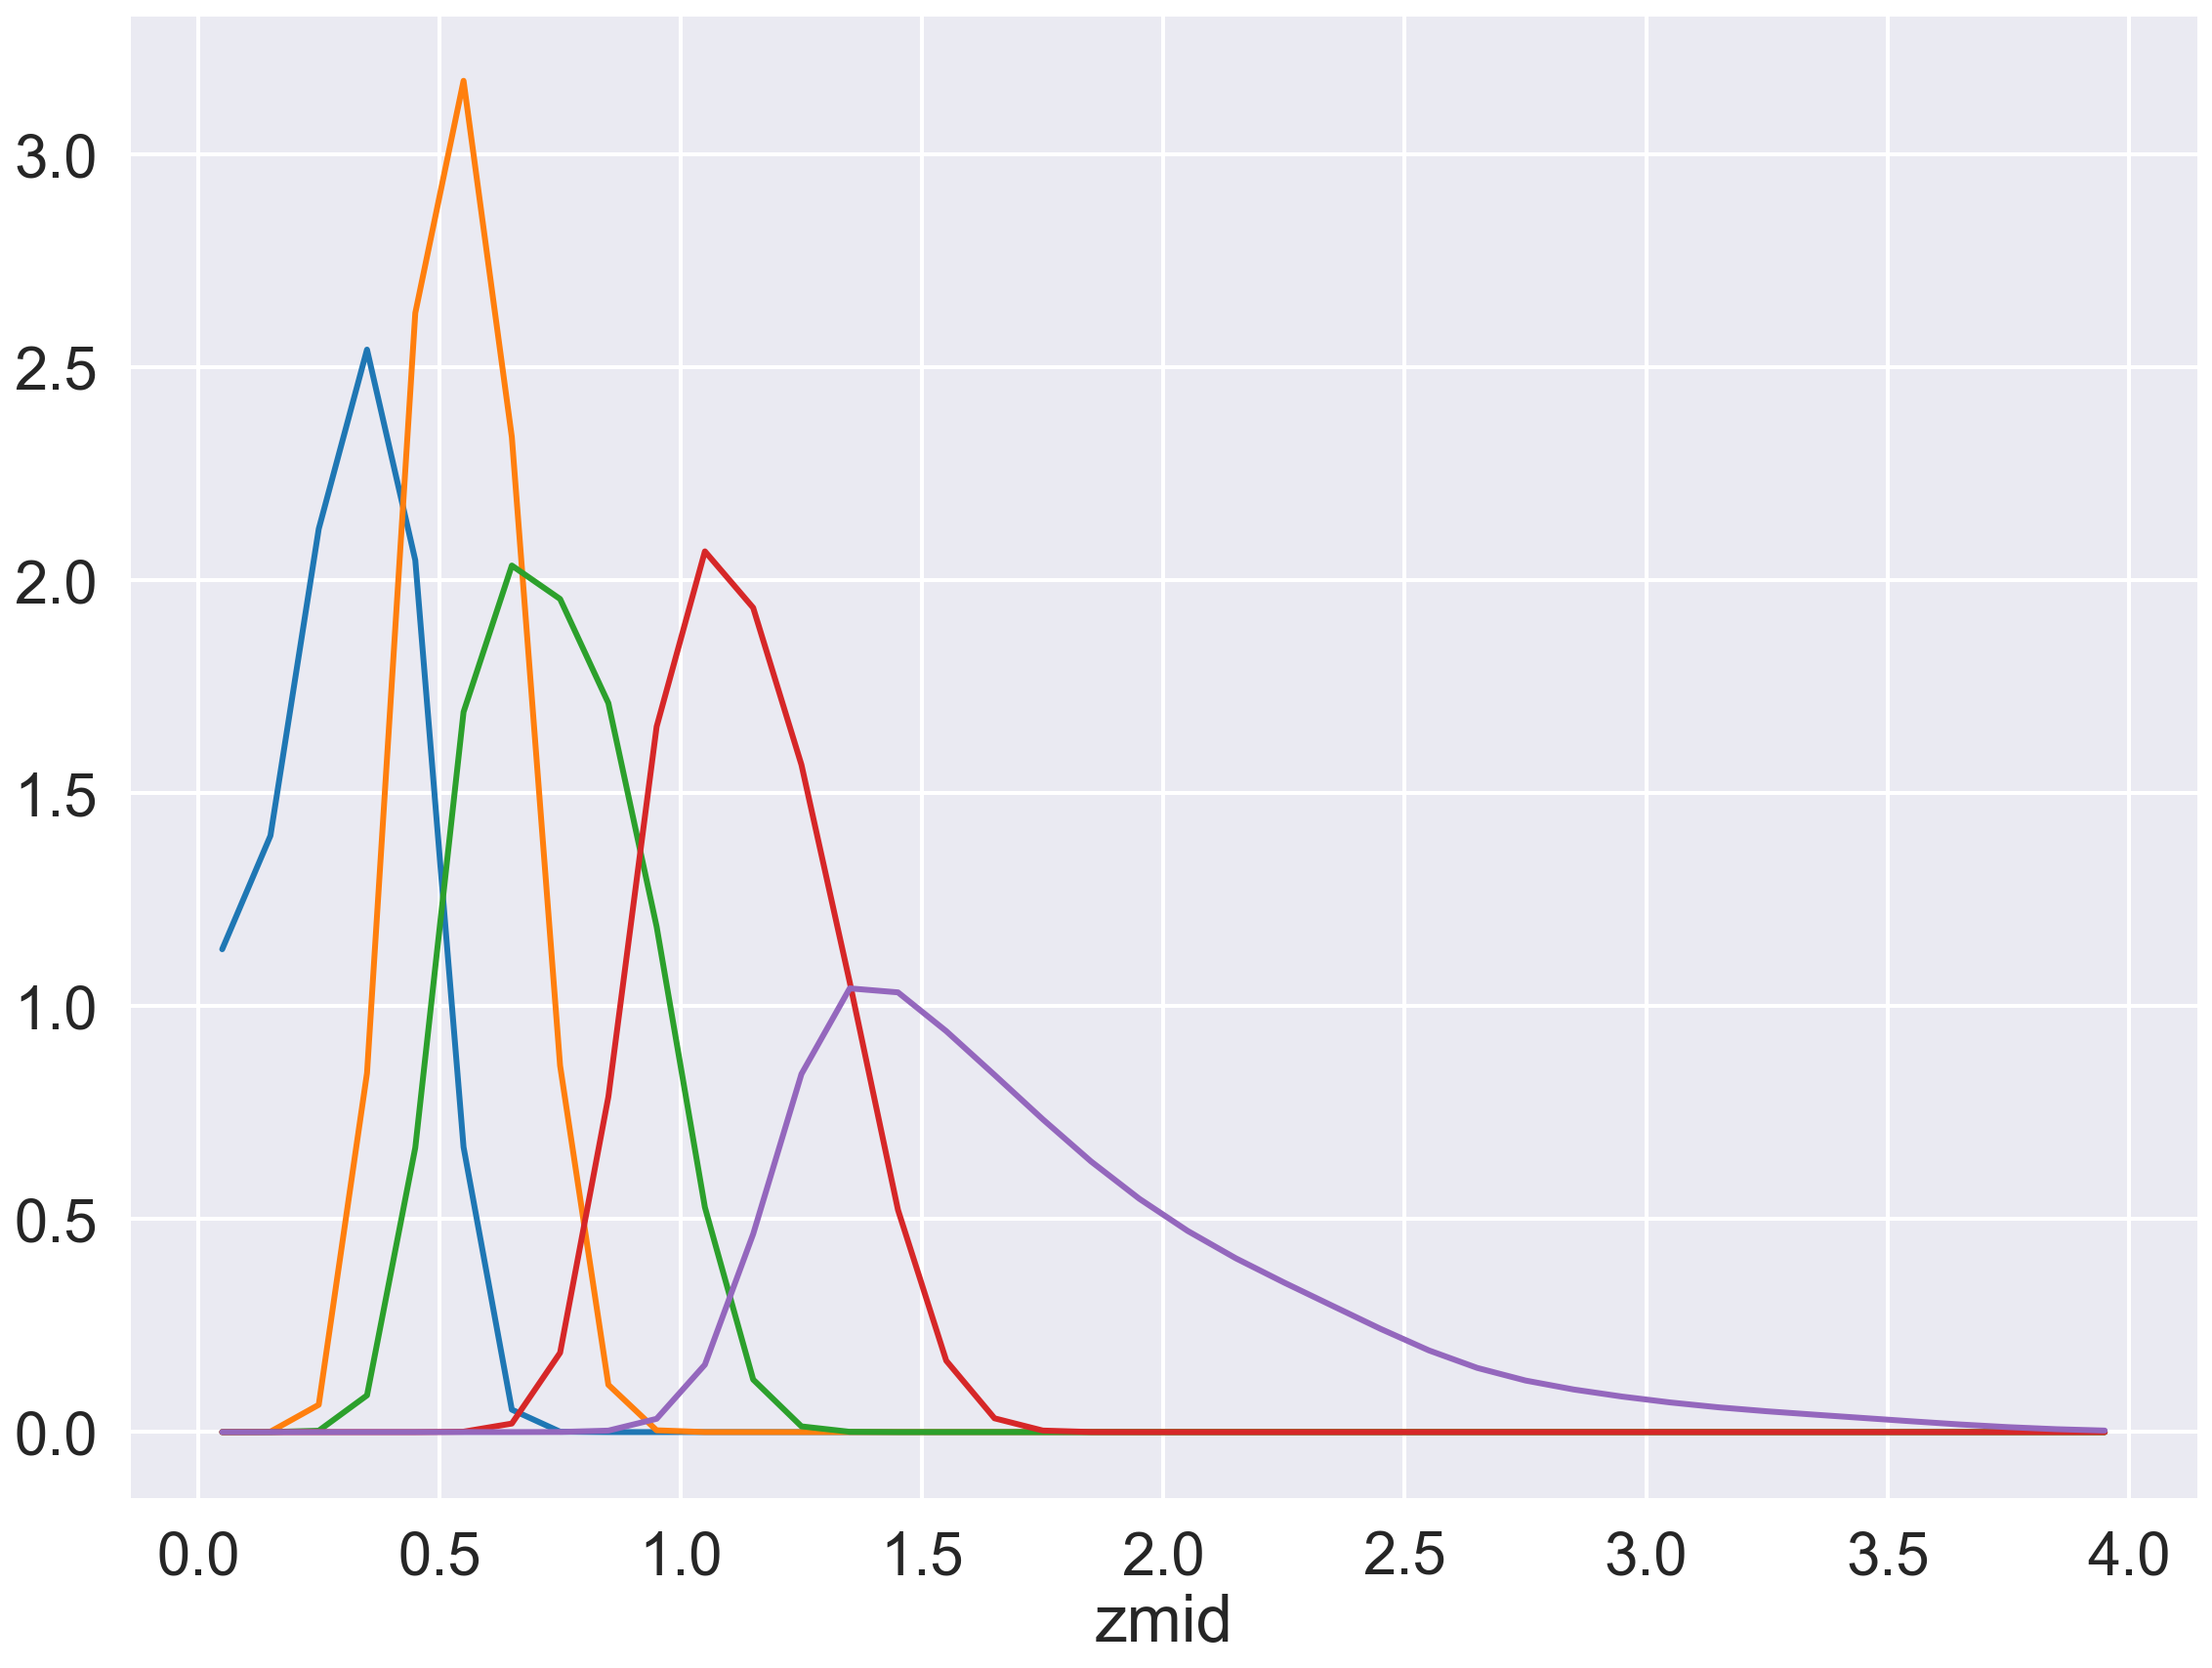

In [195]:
for key in dNdz_dict_source.keys():
    _ = sns.lineplot(x=zmid, y=dNdz_dict_source[key], markers=False);



# Getting correlation functions from CCL

In [12]:
cosmo = ccl.Cosmology(Omega_c=0.2666, Omega_b=0.049, h=0.6727, sigma8=0.831, n_s=0.9645, transfer_function='eisenstein_hu')
pprint(cosmo)

pyccl.Cosmology(Omega_c=0.2666, Omega_b=0.049, h=0.6727, n_s=0.9645, sigma8=0.831, A_s=None, Omega_k=0.0, Omega_g=None, Neff=3.046, w0=-1.0, wa=0.0, T_CMB=None, bcm_log10Mc=14.079181246047625, bcm_etab=0.5, bcm_ks=55.0, mu_0=0.0, sigma_0=0.0, m_nu=0.0, m_nu_type=None, z_mg=None, df_mg=None, transfer_function='eisenstein_hu', matter_power_spectrum='halofit', baryons_power_spectrum='nobaryons', mass_function='tinker10', halo_concentration='duffy2008', emulator_neutrinos='strict')


## Getting shear and clustering tracers

In [13]:
ell = pd.read_csv('ell-values.txt', names=['ell'])
ell = list(ell.to_dict()['ell'].values())[:15]

In [134]:
ccl_cls = pd.DataFrame()
zbin = 0
j = 0

lst = list(dNdz_dict_source.keys())
for i, key in enumerate(lst):
    lens1 = ccl.WeakLensingTracer(cosmo, dndz=(zmid, dNdz_dict_source[key]))
    for keyj in lst[i:]:
        lens2 = ccl.WeakLensingTracer(cosmo, dndz=(zmid, dNdz_dict_source[keyj]))
        cls = ccl.angular_cl(cosmo, lens1, lens2, ell)
        newdf = pd.DataFrame({'zbin': [int(k) for k in j*np.ones(len(cls))],
                              'ell': ell,
                              'C_ell': cls})
        ccl_cls = pd.concat((ccl_cls, newdf))
        j += 1
        

ccl_cls = ccl_cls.reset_index()

In [131]:
biased_ccls = ccl_cls.copy()

<AxesSubplot:xlabel='ell', ylabel='C_ell'>

Text(0, 0.5, 'biased/unbiased C_ell ratio')

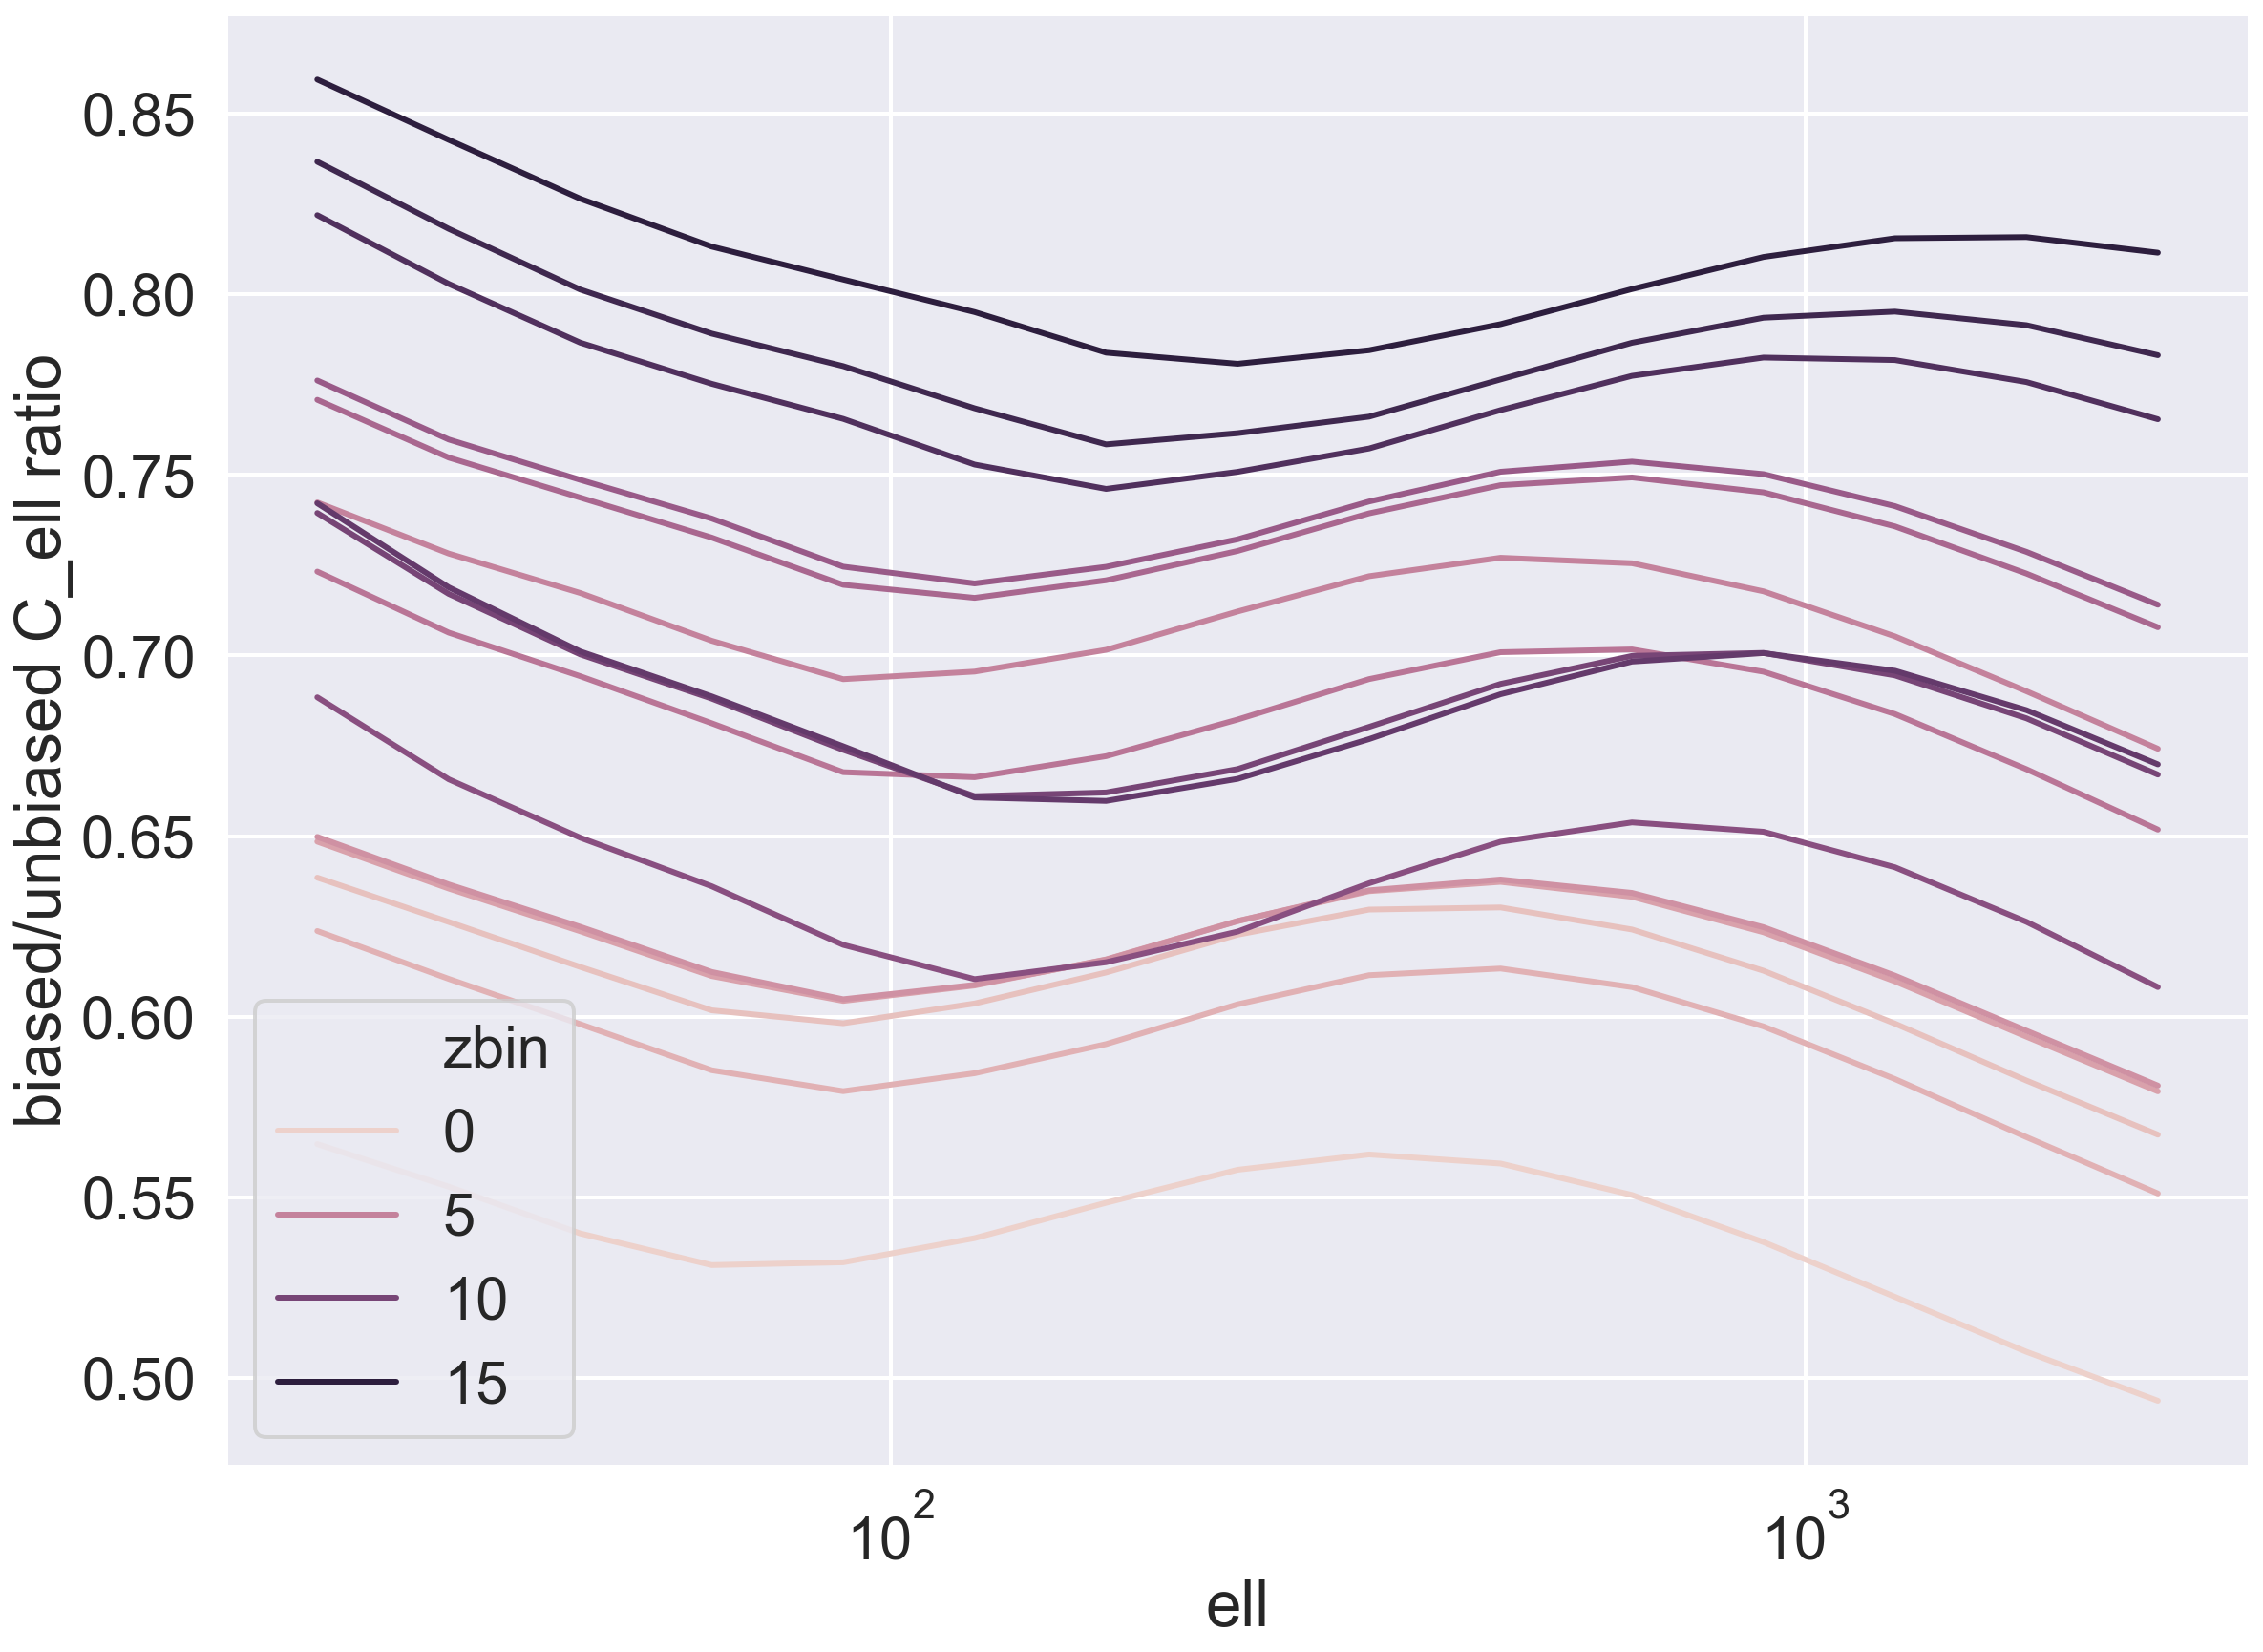

In [145]:
sns.lineplot(x=ccl_cls['ell'], y=biased_ccls['C_ell']/ccl_cls['C_ell'], hue=ccl_cls['zbin'])
#plt.yscale('log')
#plt.ylim((1e-12, 1e-7))

plt.xscale('log')
plt.ylabel('biased/unbiased C_ell ratio')

In [74]:
derivs[1]

array([-3.33433796e-10, -2.62190811e-10, -1.95403082e-10, -1.40588779e-10,
       -9.50828512e-11, -6.04468504e-11, -3.83590633e-11, -2.43133405e-11,
       -1.57867455e-11, -1.05236565e-11, -7.12698017e-12, -4.80516453e-12,
       -3.15632589e-12, -1.98459636e-12, -1.18096383e-12])

In [11]:
def get_bias_z_pdf_comp(para, diff_cl, lvals):
    deriv_para = derivs_sig[para]
    bias = sum(diff_cl[idx].dot(
        invcov_list[idx].dot(deriv_para[idx])
    ) for idx in range(len(lvals)))
    return bias


In [122]:
param_order = ['omega_m', 'sigma_8', 'n_s', 'w_0', 'w_a', 'omega_b', 'h'] + ['zbias'+str(i) for i in range(1, 6)] + ['zvariance']
param_labels = [r'$\Omega_m$', r'$\sigma_8$', r'$n_s$', r'$w_0$', r'$w_a$', r'$\Omega_b$', r'$h$']+[r'$z_{bias}$'+str(i) for i in range(1, 6)] +[r'$\std{z}$']
fisher = np.zeros((len(param_order[:7]),len(param_order[:7])))
for i, var1 in enumerate(param_order[:7]):
    for j, var2 in enumerate(param_order[:7]):
        res = [derivs_sig[var1][l].T @ invcov_srd[l] @ derivs_sig[var2][l] for l in range(len(derivs_sig[var1]))]
        fisher[i][j] = sum(res)#*400
for i in range(len(priors)):
    fisher[i][i] += priors[param_order[i]]

In [70]:
np.array(cl_biased)[:, 0]


array([1.75516666e-09, 2.83473262e-09, 3.25295757e-09, 4.57790529e-09,
       5.13795498e-09, 4.78852434e-09, 5.70057273e-09, 8.61488037e-09,
       9.93966034e-09, 7.07913029e-09, 1.16808950e-08, 1.40814901e-08,
       2.31720675e-08, 3.13428089e-08, 4.90136475e-08])

In [108]:
diff_cl = np.column_stack((np.array(cl_biased)[:, 0], np.array(cl_biased)[:, 1:] - np.array(cl_unbiased)[:, 1:]))
bias_vec = []
for i, param in enumerate(param_order[:7]):
    bias_vec.append(get_bias_z_pdf_comp(param, diff_cl, ell))
bias_vec = np.array(bias_vec)
para_bias = np.linalg.inv(fisher).dot(bias_vec) 
para_bias = {param_order[i]: para_bias[i] for i in range(7)}

In [92]:
fisher_unbiased = deepcopy(fisher)

In [109]:
para_bias

{'omega_m': -0.01852239935839517,
 'sigma_8': 0.022056620291395546,
 'n_s': -0.026442480367214638,
 'w_0': -0.09626409039021322,
 'w_a': 0.2681450875534299,
 'omega_b': 0.00033048465874702115,
 'h': 0.055530718625226516}

In [34]:
srd_shearshear_fisher = np.array([[1.346767e+06, 1.115743e+06, 1.604359e+05, -5.159733e+04, -1.621419e+04, -4.865683e+05, 1.202273e+05, 1.457177e+02, -2.189837e+03, -4.142296e+02, -4.481271e+02]
,[1.115743e+06, 9.931077e+05, 9.619206e+04, -4.388272e+04, -1.494812e+04, -3.429537e+05, 8.412479e+04, 3.127841e+02, -2.311151e+03, 1.063426e+01, -3.128710e+02]
,[1.604359e+05, 9.619206e+04, 7.647811e+04, 1.606765e+02, 3.122483e+01, -1.244695e+05, 3.357666e+04, -1.140258e+02, 4.038671e+02, -1.761550e+02, -5.034816e+01]
,[-5.159733e+04, -4.388272e+04, 1.606765e+02, 3.156995e+03, 8.781821e+02, 9.804907e+03, -2.143529e+03, -1.906347e+01, 1.914662e+02, 1.650257e+01, 2.266673e+01]
,[-1.621419e+04, -1.494812e+04, 3.122483e+01, 8.781821e+02, 2.855925e+02, 3.301676e+03, -7.309810e+02, -8.352213e+00, 5.384541e+01, -3.509932e+00, 5.486725e+00]
,[-4.865683e+05, -3.429537e+05, -1.244695e+05, 9.804907e+03, 3.301676e+03, 4.398465e+05, -8.335799e+04, 1.254247e+02, 2.583460e+02, 4.567478e+02, 2.431458e+02]
,[1.202273e+05, 8.412479e+04, 3.357666e+04, -2.143529e+03, -7.309810e+02, -8.335799e+04, 2.106183e+04, -3.508912e+01, -2.452002e+01, -1.100394e+02, -5.582595e+01]
,[1.457177e+02, 3.127841e+02, -1.140258e+02, -1.906347e+01, -8.352213e+00, 1.254247e+02, -3.508912e+01, 2.153790e+00, -5.846510e+00, 2.884551e+00, 6.519372e-01]
,[-2.189837e+03, -2.311151e+03, 4.038671e+02, 1.914662e+02, 5.384541e+01, 2.583460e+02, -2.452002e+01, -5.846510e+00, 5.537583e+01, 2.538507e+00, 3.668472e+00]
,[-4.142296e+02, 1.063426e+01, -1.761550e+02, 1.650257e+01, -3.509932e+00, 4.567478e+02, -1.100394e+02, 2.884551e+00, 2.538507e+00, 1.022493e+01, 3.241709e+00]
,[-4.481271e+02, -3.128710e+02, -5.034816e+01, 2.266673e+01, 5.486725e+00, 2.431458e+02, -5.582595e+01, 6.519372e-01, 3.668472e+00, 3.241709e+00, 1.151374e+01]])


In [129]:
FoM(marginalize(srd_shearshear_fisher, 3,4))

34.62020655998075

In [36]:
FoM(marginalize(fisher, 3,4))

77.07622070572002

(0.3156, 0.831)
changing fid
(0.2970776006416048, 0.8530566202913955)


(0.23931398151757227, 0.3548412197656374)

(0.795293001167363, 0.910820239415428)

Text(0.5, 0, '$\\Omega_m$')

Text(0, 0.5, '$\\sigma_8$')

<Figure size 1368x1008 with 0 Axes>

(-1, 0)
changing fid
(-1.0962640903902132, 0.2681450875534299)


(-2.6782753335677167, 0.4857471527872903)

(-1.3138661556240736, 1.8501563307309334)

Text(0.5, 0, '$w_0$')

Text(0, 0.5, '$w_a$')

<Figure size 1368x1008 with 0 Axes>

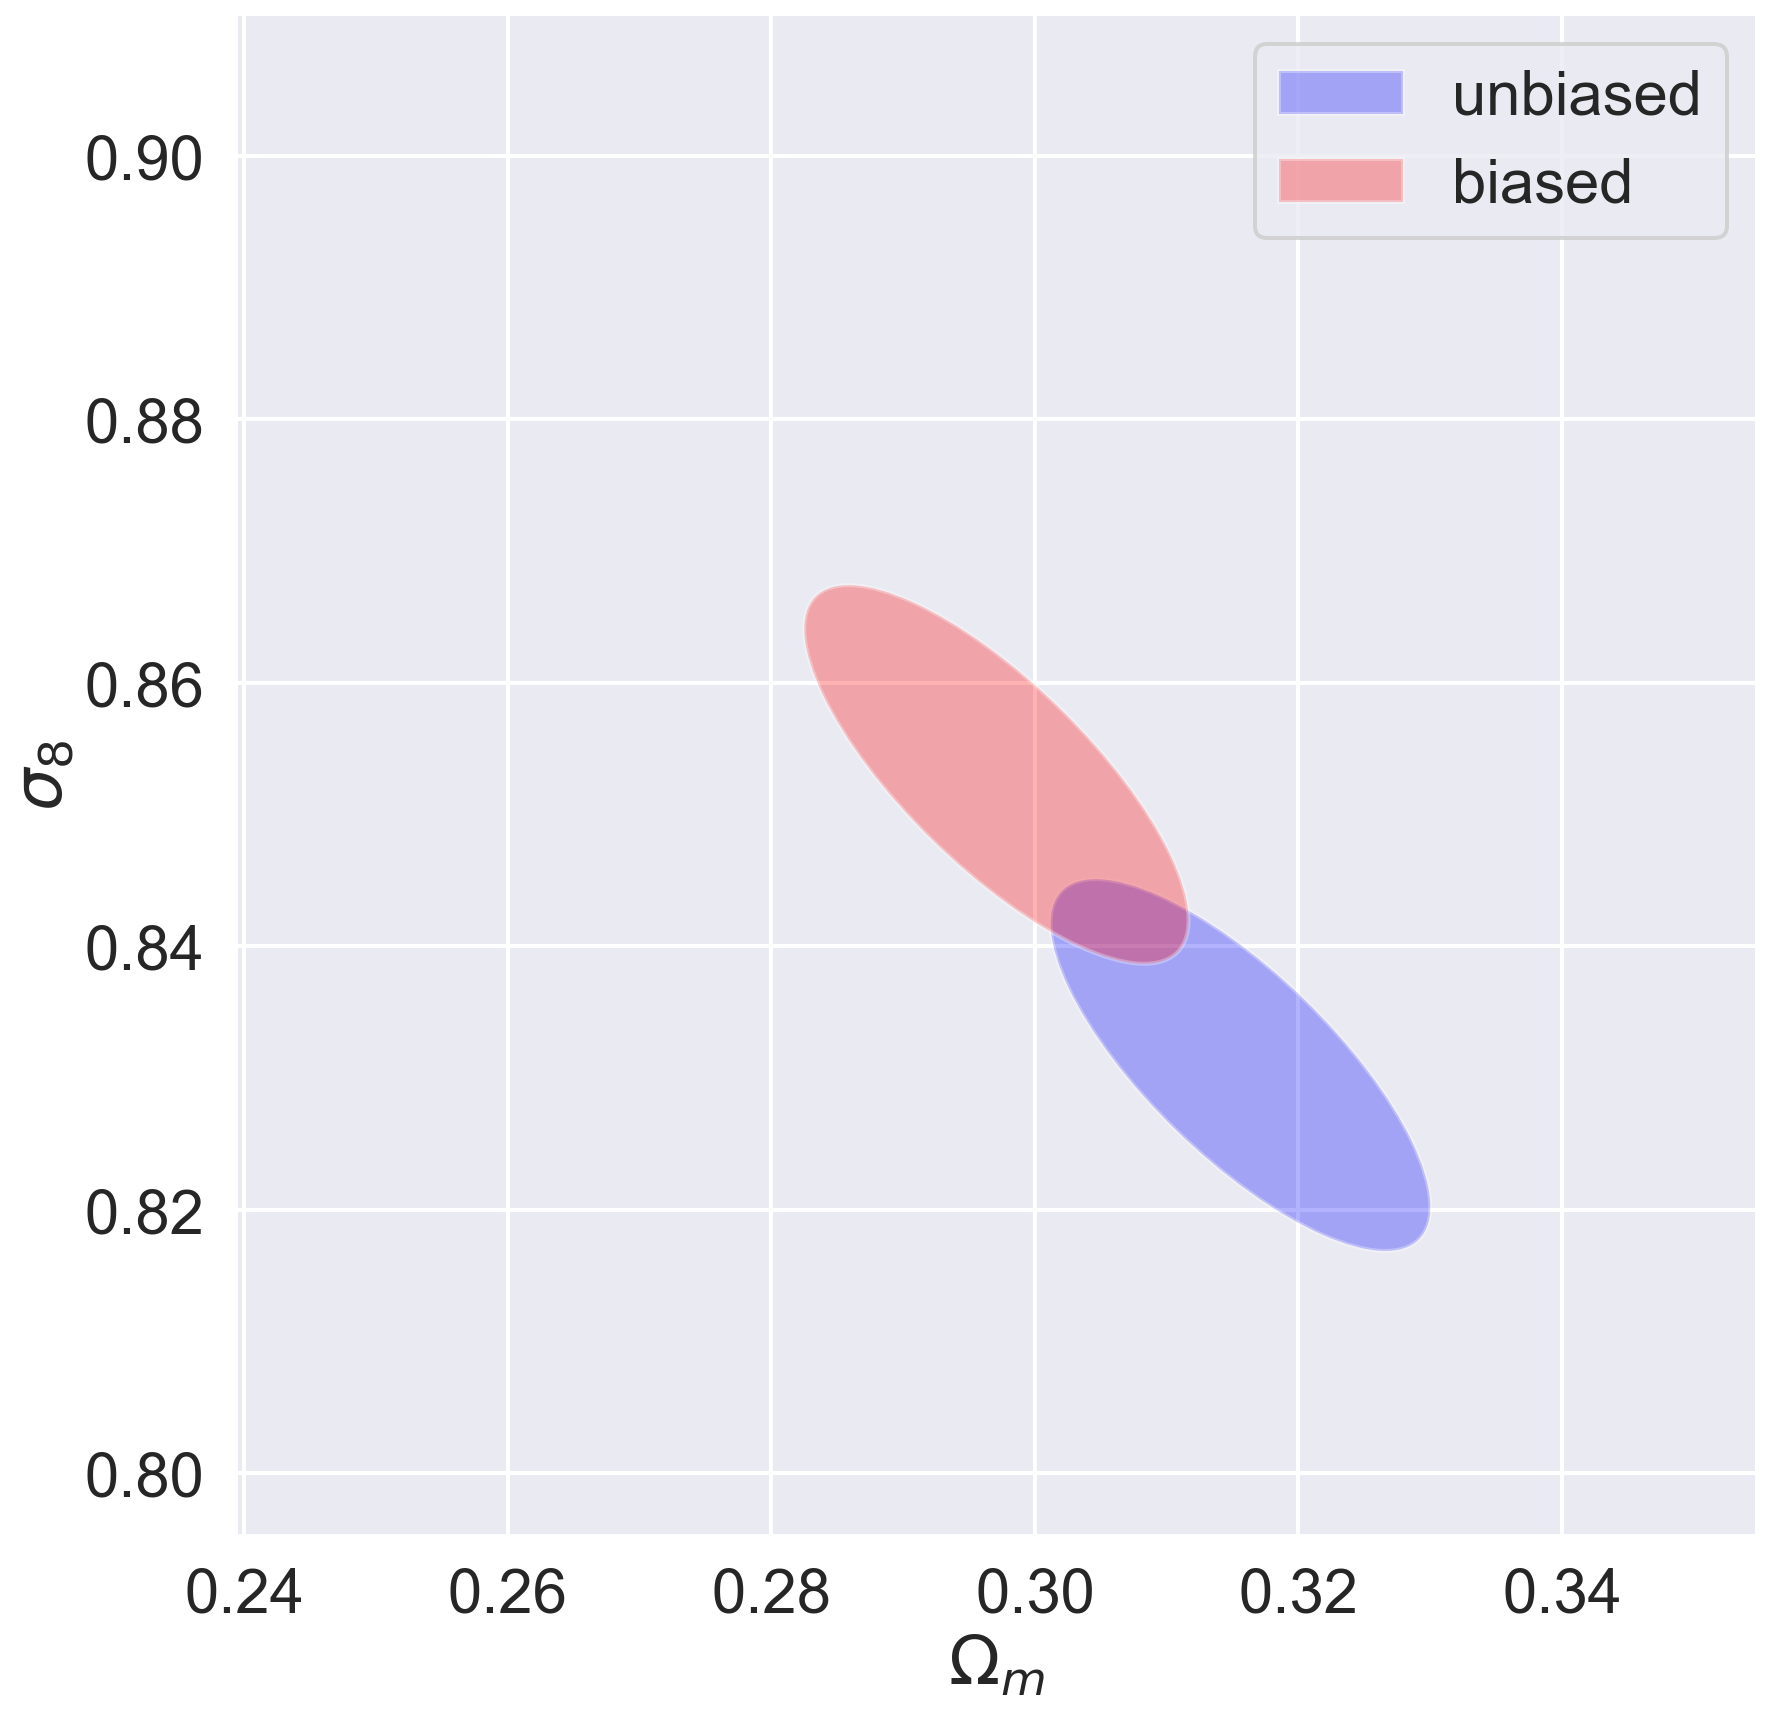

<Figure size 1368x1008 with 0 Axes>

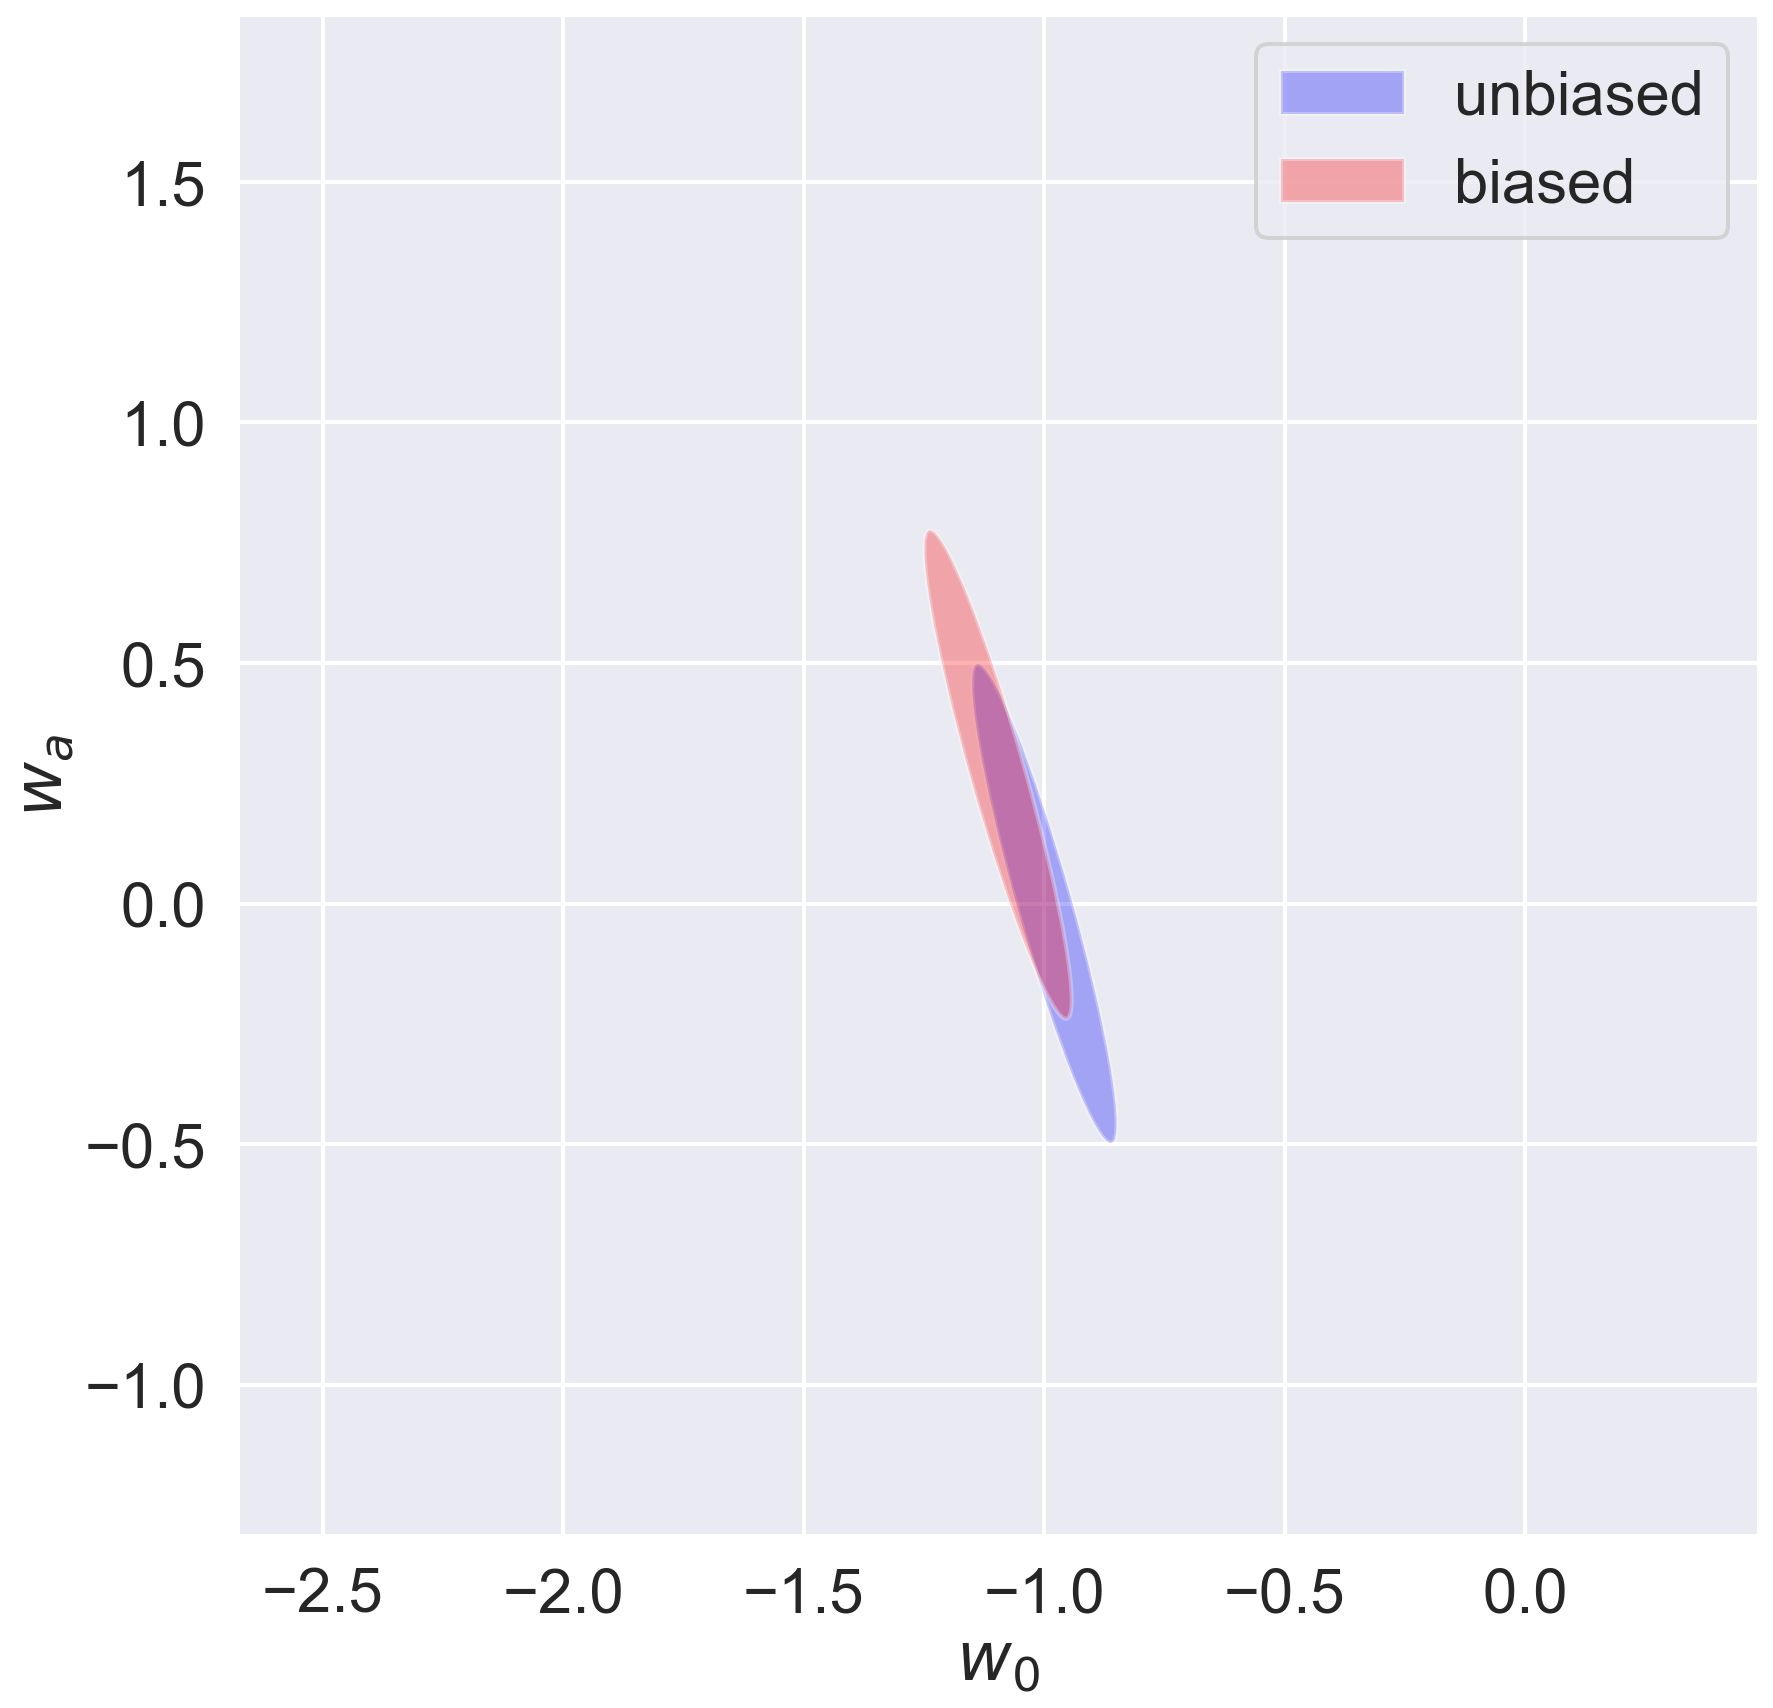

<Figure size 1368x1008 with 0 Axes>

In [130]:

colors = ['blue', 'red']
for params in [['omega_m', 'sigma_8'],
               ['w_0', 'w_a']]:
    labels = ['unbiased', 'biased']
    biases = [para_bias[params[0]], para_bias[params[1]]]
    fid = (vals[params[0]], vals[params[1]])
    es = []
    for i, matrix in enumerate([fisher_unbiased, fisher]):
        if i==1:
            print('changing fid')
            fid = (fid[0]+biases[0], fid[1]+biases[1])
        e, (xlim, ylim) = plot_contours(marginalize(matrix, param_order.index(params[0]), param_order.index(params[1])),
                          sigmas=1,
                          fid=fid)
        e.set_facecolor(colors[i])
        e.set_label(labels[i])
        e.set_alpha(0.3)
        es.append(e)
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

    for i, e in enumerate(es):
        ax.add_artist(e)

    plt.xlim((xlim))
    plt.ylim((ylim))
    plt.legend(handles=es)
    plt.xlabel(param_labels[param_order.index(params[0])])
    plt.ylabel(param_labels[param_order.index(params[1])])
    plt.figure()


In [ ]:
def lnprob(theta):
    
    z = np.linspace(0., 3., 200)
    i_lim = 26. # Limiting i-band magnitude
    z0 = 0.0417*i_lim - 0.744

    ell = np.arange(2, 1812)

    Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
    pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
    dNdz = Ngal * pz # Number density distribution
    for i in range(len(theta)):
        p = ccl.Parameters(Omega_c=theta[0], Omega_b=0.045, h=0.67, n_s=0.96,  A_s=theta[1])
        cosmo = ccl.Cosmology(p, transfer_function='boltzmann')

        tracer1 = ccl.ClTracer(cosmo,tracer_type='lensing',n=[z,dNdz])
        tracer2 = ccl.ClTracer(cosmo,tracer_type='lensing',n=dNdz,z=z)
        theory = ccl.angular_cl(cosmo, tracer1, tracer2, ell)
        diff = data-theory
    #print np.dot(diff,np.dot(icov,diff))/2.0
    return -np.dot(diff,np.dot(icov,diff))/2.0



# We'll sample a 10-dimensional Gaussian...
ndim = 2

nwalkers = 8

# Choose an initial set of positions for the walkers.
# p0 = [np.random.rand(ndim) for i in xrange(nwalkers)]
# p0 = emcee.utils.sample_ball(np.ones(ndim)*0.27,np.ones(ndim)*0.01,size=nwalkers)
# p1 = emcee.utils.sample_ball(np.ones(ndim)*2.1e-9,np.ones(ndim)*1.E-10,size=nwalkers)
# p00 = (p0,p1)
p00 = [np.array([0.27,2.1e-9])*np.ones(ndim)+np.array([0.02,1.e-10]) * numpy.random.rand() for i in range(nwalkers)] 
# Initialize the sampler with the chosen specs.
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)

# Run 5000 steps as a burn-in.
pos, prob, state = sampler.run_mcmc(p00, 25)

# Reset the chain to remove the burn-in samples.
sampler.reset()

# Starting from the final position in the burn-in chain, sample for 100000
# steps.
sampler.run_mcmc(pos, 25, rstate0=state)

# Print out the mean acceptance fraction. In general, acceptance_fraction
# has an entry for each walker so, in this case, it is a 50-dimensional
# vector.
#print "Mean acceptance fraction:", np.mean(sampler.acceptance_fraction)

# Estimate the integrated autocorrelation time for the time series in each
# parameter.
#print "Autocorrelation time:", sampler.get_autocorr_time()

#plt.hist(sampler.flatchain[:,0], 10)



In [5]:
!ls

CCL_round_trip.ipynb
Cahn_1996_The eighteen arbitrary parameters of the standard model in your everyday life.pdf
CosmoCov
Fisher_cosmo_Y10_shear_shear.npy
LSST_DESC_SRD.pdf
Untitled2.ipynb
Y10_shear_shear_inv.txt
__pycache__
binning.ipynb
ell-values.txt
fisher.ipynb
fisher.py
nzdist.txt


In [7]:
ell = pd.read_csv('ell-values.txt', names=['ell'])
ell = list(ell.to_dict()['ell'].values())
cosmo = ccl.Cosmology(Omega_c=0.2666, 
                       Omega_b=0.049, 
                       h=0.6727, 
                       sigma8=0.831, 
                       n_s=0.9645, 
                       transfer_function='eisenstein_hu')

galaxy_bias = [1.376695e+00,
               1.451179e+00,
               1.528404e+00,
               1.607983e+00,
               1.689579e+00,
               1.772899e+00,
               1.857700e+00,
               1.943754e+00,
               2.030887e+00,
               2.118943e+00]
galaxy_bias = 1.05/ccl.growth_factor(cosmo, 1/(1+np.array(sorted(list((dNdz_dict_lens.keys()))))))
z = np.linspace(0, 4, 121)


ccl_pp = pd.DataFrame()
zbin = 0
j = 0

for key in dNdz_dict_lens.keys():
    pos = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z, dNdz_dict_lens[key]), bias = (sorted(list((dNdz_dict_lens.keys()))), galaxy_bias))
    pp = ccl.angular_cl(cosmo, pos, pos, ell)
    
    newdf = pd.DataFrame({'zbin': [int(k) for k in j*np.ones(len(pp))],
                          'ell': ell,
                          'C_ell': pp})
    ccl_pp = pd.concat((ccl_pp, newdf))
    j += 1
        

ccl_pp = ccl_pp.reset_index()

NameError: name 'dNdz_dict_lens' is not defined

In [9]:
Fisher??